# I thought we're done. No we are not.

Feature extraction part 2!

Of course, we import stuff again and then pickle in

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import datetime as dt


sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [18]:
mbti = pd.read_pickle('mbti_ver1.pickle')
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, Океан Ельзи - С...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

        ...       bracket_count  dots_count  n_char n_word  mbti_ref_most  \
0       ...                   0          14    3242    581           ENFP   
1       ...                   0          19    6281   1210           ENTP   
2       ...                   0          13    4882    880           INTJ   
3       ...                   1          26    5997   1111           ESFJ   
4       ...                   0          21    5560   1010           ENTJ   

  n_action  n_caps n_caps_char  word_cap_ratio  char_cap_ratio  
0        0       0           0        0.000000        0.000000  
1        2       5          18        0.004132        0.002866  
2        0       1           4        0.001136        0.000819  
3        0       6          19        0.005401        0.003168  
4        0       6          37        0.005941        0.006655  

[5 rows x 29 columns]

In [19]:
#Get median for number of characters/words per post in each row

mbti['med_char'] = mbti['words_only'].apply(lambda x: np.median([len(i) for i in x]))
mbti['med_word'] = mbti['words_only'].apply(lambda x: np.median([len(i.split()) for i in x]))
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, Океан Ельзи - С...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

     ...    n_char  n_word  mbti_ref_most n_action  n_caps n_caps_char  \
0    ...      3242     581           ENFP        0       0           0   
1    ...      6281    1210           ENTP        2       5          18   
2    ...      4882     880           INTJ        0       1           4   
3    ...      5997    1111           ESFJ        0       6          19   
4    ...      5560    1010           ENTJ        0       6          37   

   word_cap_ratio char_cap_ratio  med_char  med_word  
0        0.000000       0.000000      49.5       9.5  
1        0.004132       0.002866     137.0      29.0  
2        0.001136       0.000819      85.5      15.0  
3        0.005401       0.003168     109.0      21.5  
4        0.005941       0.006655      92.0      18.5  

[5 rows x 31 columns]

In [20]:
#Spice things up a little by splitting to individual types
mbti['is_E'] = mbti['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
mbti['is_S'] = mbti['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
mbti['is_T'] = mbti['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
mbti['is_J'] = mbti['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

#Yes this is the direction I am gonna go.

In [21]:
mbti['word_char_ratio'] = mbti['med_char'] / mbti['med_word']

In [22]:
mbti.columns

Index([u'type', u'words_only', u'image', u'video_link', u'otherlink',
       u'n_video', u'n_links', u'n_image', u'n_otherlink', u'video_title',
       u'emoticons', u'emoticon_count', u'mention_count', u'hashtag',
       u'hashtag_count', u'mbti_ref', u'mbti_ref_count', u'ennea',
       u'ennea_count', u'bracket_count', u'dots_count', u'n_char', u'n_word',
       u'mbti_ref_most', u'n_action', u'n_caps', u'n_caps_char',
       u'word_cap_ratio', u'char_cap_ratio', u'med_char', u'med_word', u'is_E',
       u'is_S', u'is_T', u'is_J', u'word_char_ratio'],
      dtype='object')

In [23]:
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, Океан Ельзи - С...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

        ...        n_caps_char  word_cap_ratio  char_cap_ratio med_char  \
0       ...                  0        0.000000        0.000000     49.5   
1       ...                 18        0.004132        0.002866    137.0   
2       ...                  4        0.001136        0.000819     85.5   
3       ...                 19        0.005401        0.003168    109.0   
4       ...                 37        0.005941        0.006655     92.0   

   med_word is_E  is_S is_T  is_J  word_char_ratio  
0       9.5    0     0    0     1         5.210526  
1      29.0    1     0    1     0         4.724138  
2      15.0    0     0    1     0         5.700000  
3      21.5    0     0    1     1         5.069767  
4      18.5    1     0    1     1         4.972973  

[5 rows x 36 columns]

In [24]:
#Look at number by descending count per type
mbti[['type','emoticon_count']].sort_values('emoticon_count', ascending=False).head(10)
#But then again this can be skewed towards higher participation, so...

type  emoticon_count
5746  INFP              47
3264  ENFJ              45
645   INTJ              36
4347  ENFP              36
5795  INFP              36
1365  ENFP              36
4183  ENFP              35
2725  ENFP              34
5700  INTJ              34
1603  INFJ              33

In [25]:
#We look at averages below
#By eyeballing we can see that feelers tend to use more emoticons on average than thinkers with the exception of ISTJ
#The rest are more uhh uniform
mbti.groupby('type')['emoticon_count'].apply(np.mean).sort_values(ascending=False)

type
ESFP    3.229167
ENFP    2.997037
ISTJ    2.921951
ENFJ    2.400000
ISFP    2.383764
INFP    2.337336
ESTP    2.325843
INFJ    2.291156
ISFJ    2.120482
ENTP    2.071533
INTJ    2.044913
ESFJ    1.809524
ISTP    1.605341
ENTJ    1.597403
INTP    1.437883
ESTJ    1.384615
Name: emoticon_count, dtype: float64

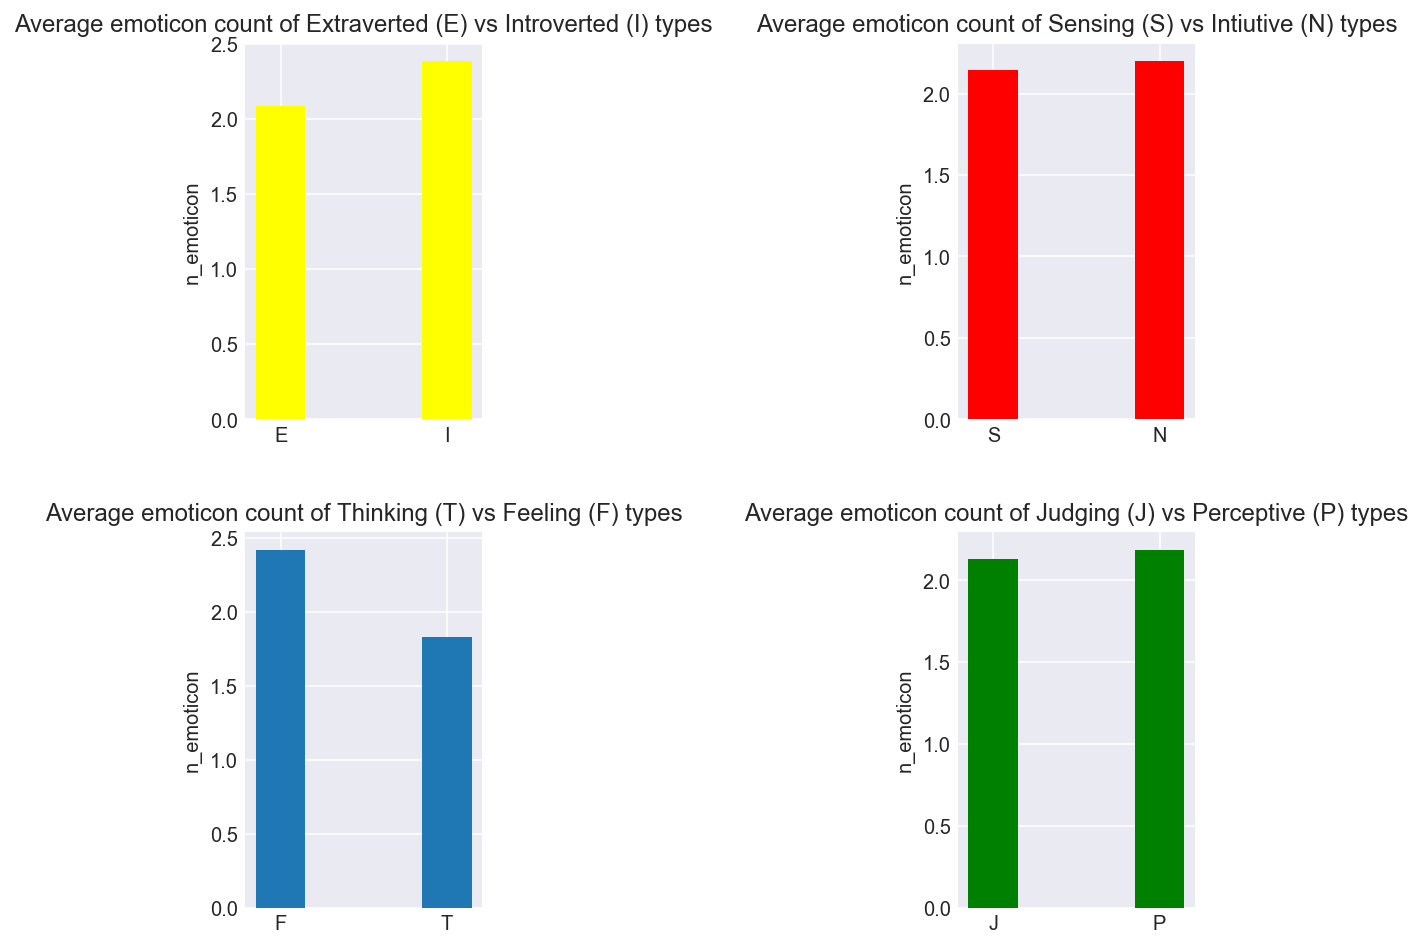

In [26]:
#If we look at 'is_T' instead (1 = T, 0 = F)
plt.figure(figsize=(6,6))
plt.subplot(221)
E = mbti.groupby('is_E')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(E.index, E, width=0.3, tick_label=['I','E'], color='yellow')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Extraverted (E) vs Introverted (I) types")

plt.subplot(222)
S = mbti.groupby('is_S')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(S.index, S, width=0.3, tick_label=['N','S'], color='red')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Sensing (S) vs Intiutive (N) types")

plt.subplot(223)
T = mbti.groupby('is_T')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(T.index, T, width=0.3, tick_label=['F','T'])
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Thinking (T) vs Feeling (F) types")

plt.subplot(224)
J = mbti.groupby('is_J')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(J.index, J, width=0.3, tick_label=['P','J'], color='green')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Judging (J) vs Perceptive (P) types")

plt.subplots_adjust(left=0, bottom=1, right=1.1, top=2, wspace=2, hspace=0.3)

In [27]:
#Create function heh
def compareplot(what):
    plt.figure(figsize=(6,6))
    plt.subplot(221)
    E = mbti.groupby('is_E')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(E.index, E, width=0.3, tick_label=['I','E'], color='yellow')
    plt.ylabel(what)
    plt.title("Average "+what+" of Extraverted (E) vs Introverted (I) types")

    plt.subplot(222)
    S = mbti.groupby('is_S')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(S.index, S, width=0.3, tick_label=['N','S'], color='red')
    plt.ylabel(what)
    plt.title("Average "+what+" of Sensing (S) vs Intiutive (N) types")

    plt.subplot(223)
    T = mbti.groupby('is_T')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(T.index, T, width=0.3, tick_label=['F','T'])
    plt.ylabel(what)
    plt.title("Average "+what+" of Thinking (T) vs Feeling (F) types")

    plt.subplot(224)
    J = mbti.groupby('is_J')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(J.index, J, width=0.3, tick_label=['P','J'], color='green')
    plt.ylabel(what)
    plt.title("Average "+what+" of Judging (J) vs Perceptive (P) types")

    plt.subplots_adjust(left=0, bottom=1, right=1.1, top=2, wspace=2, hspace=0.3)

In [28]:
mbti.columns

Index([u'type', u'words_only', u'image', u'video_link', u'otherlink',
       u'n_video', u'n_links', u'n_image', u'n_otherlink', u'video_title',
       u'emoticons', u'emoticon_count', u'mention_count', u'hashtag',
       u'hashtag_count', u'mbti_ref', u'mbti_ref_count', u'ennea',
       u'ennea_count', u'bracket_count', u'dots_count', u'n_char', u'n_word',
       u'mbti_ref_most', u'n_action', u'n_caps', u'n_caps_char',
       u'word_cap_ratio', u'char_cap_ratio', u'med_char', u'med_word', u'is_E',
       u'is_S', u'is_T', u'is_J', u'word_char_ratio'],
      dtype='object')

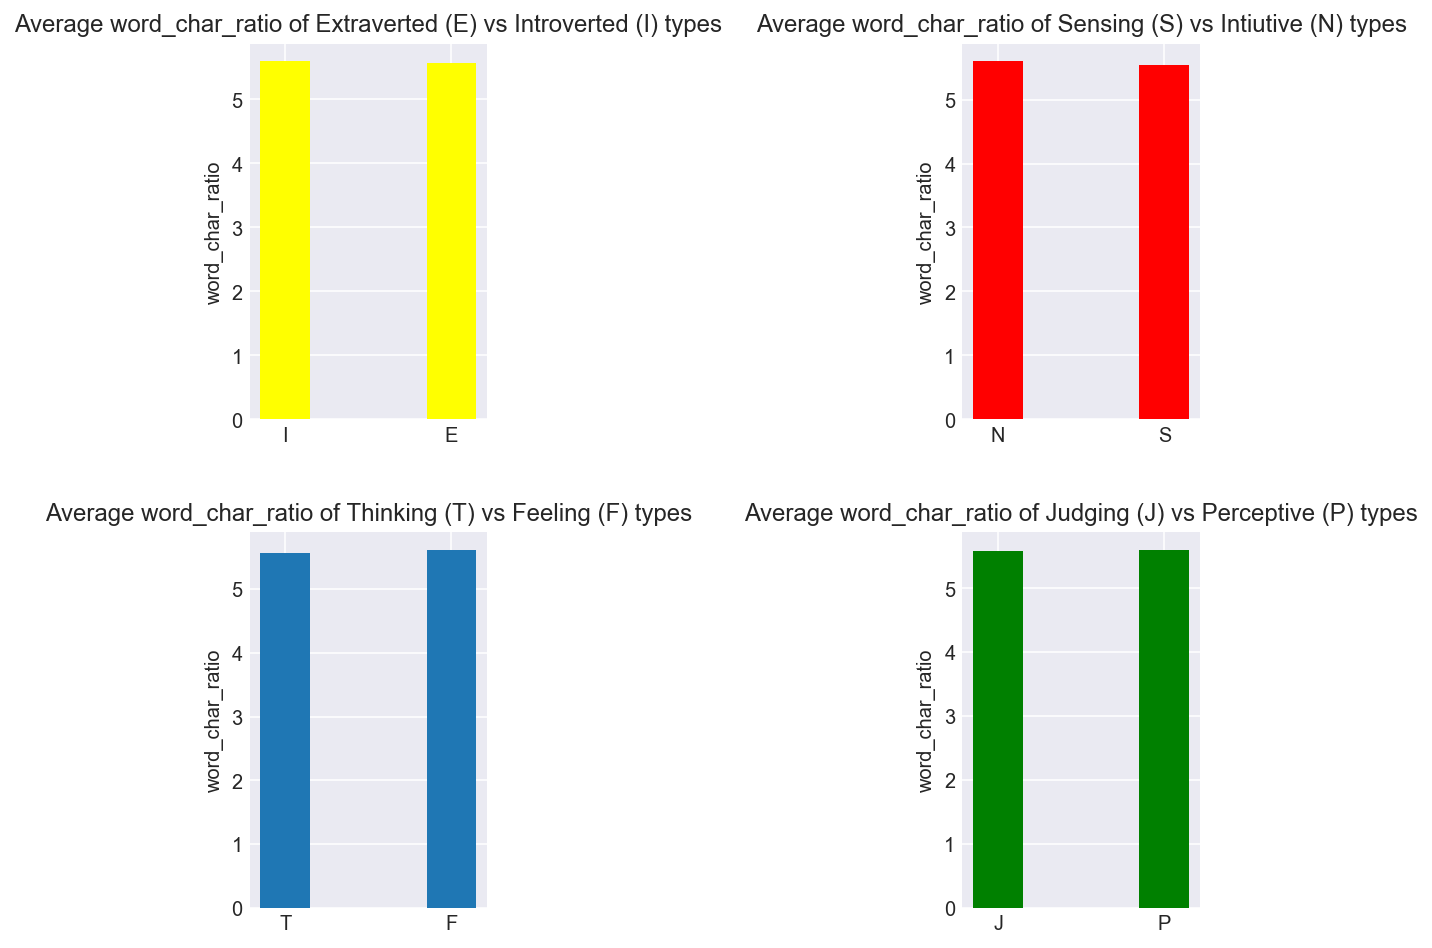

In [29]:
compareplot('word_char_ratio')

In [30]:
colli = ['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word','is_E','is_S','is_T','is_J']
mbti_num = mbti[colli]
mbti_num.head()

n_video  n_links  n_image  emoticon_count  mention_count  hashtag_count  \
0       17       24        7               3              0              0   
1        1       10        9               0              0              0   
2        3        5        0               0              0              0   
3        2        2        0               0              0              0   
4        3        6        3               1              2              0   

   mbti_ref_count  ennea_count  bracket_count  dots_count  ...   n_caps  \
0               7            0              0          14  ...        0   
1              11            1              0          19  ...        5   
2               4            0              0          13  ...        1   
3              12            0              1          26  ...        6   
4               4            0              0          21  ...        6   

   n_caps_char  word_cap_ratio  char_cap_ratio  med_char  med_word  is_E  \
0            0        0.000000        0.000000      49.5       9.5     0   
1           18        0.004132        0.002866     137.0      29.0     1   
2            4        0.001136        0.000819      85.5      15.0     0   
3           19        0.005401        0.003168     109.0      21.5     0   
4           37        0.005941        0.006655      92.0      18.5     1   

   is_S  is_T  is_J  
0     0     0     1  
1     0     1     0  
2     0     1     0  
3     0     1     1  
4     0     1     1  

[5 rows x 23 columns]

In [31]:
from statsmodels.formula.api import logit
logs = logit(formula='is_E ~ '+' + '.join(mbti_num.drop(['is_E','is_S','is_T','is_J'], axis=1).columns), data=mbti_num).fit()
logs.summary()

Optimization terminated successfully.
         Current function value: 0.513613
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_E   No. Observations:                 8675
Model:                          Logit   Df Residuals:                     8655
Method:                           MLE   Df Model:                           19
Date:                Tue, 20 Feb 2018   Pseudo R-squ.:                 0.04851
Time:                        09:50:27   Log-Likelihood:                -4455.6
converged:                       True   LL-Null:                       -4682.7
                                        LLR p-value:                 2.067e-84
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9406      0.171     -5.514      0.000      -1.275      -0.606
n_video           -0.0967      0.046     -2.085      0.037      -0.188      -0.006
n_links            0.0385      0.045      0.854      0.393      -0.050       0.127
n_image           -0.0447      0.047     -0.948      0.343      -0.137       0.048
emoticon_count     0.0145      0.006      2.295      0.022       0.002       0.027
mention_count      0.0876      0.029      2.984      0.003       0.030       0.145
hashtag_count      0.0043      0.073      0.059      0.953      -0.139       0.147
mbti_ref_count     0.0449      0.004     11.389      0.000       0.037       0.053
ennea_count        0.0967      0.019      5.028      0.000       0.059       0.134
bracket_count      0.0506      0.041      1.235      0.217      -0.030       0.131
dots_count         0.0041      0.007      0.619      0.536      -0.009       0.017
n_char            -0.0008      0.000     -4.548      0.000      -0.001      -0.000
n_word             0.0032      0.001      3.613      0.000       0.001       0.005
n_action           0.0724      0.020      3.622      0.000       0.033       0.112
n_caps             0.1586      0.049      3.241      0.001       0.063       0.255
n_caps_char       -0.0119      0.011     -1.114      0.265      -0.033       0.009
word_cap_ratio  -175.0226     51.771     -3.381      0.001    -276.492     -73.553
char_cap_ratio   155.4674     62.537      2.486      0.013      32.897     278.037
med_char           0.0026      0.004      0.661      0.508      -0.005       0.010
med_word          -0.0129      0.024     -0.540      0.589      -0.060       0.034
==================================================================================
"""

In [32]:
formu = 'is_E ~ n_video + emoticon_count + mention_count + mbti_ref_count + ennea_count + n_char + n_word + n_action + n_caps + word_cap_ratio + char_cap_ratio - 1'
logs = logit(formula=formu, data=mbti_num).fit()
logs.summary()

Optimization terminated successfully.
         Current function value: 0.516526
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_E   No. Observations:                 8675
Model:                          Logit   Df Residuals:                     8664
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Feb 2018   Pseudo R-squ.:                 0.04311
Time:                        09:50:27   Log-Likelihood:                -4480.9
converged:                       True   LL-Null:                       -4682.7
                                        LLR p-value:                 1.481e-80
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
n_video           -0.0778      0.009     -8.854      0.000      -0.095      -0.061
emoticon_count     0.0082      0.006      1.303      0.193      -0.004       0.021
mention_count      0.0975      0.029      3.322      0.001       0.040       0.155
mbti_ref_count     0.0434      0.004     11.052      0.000       0.036       0.051
ennea_count        0.0876      0.019      4.546      0.000       0.050       0.125
n_char            -0.0007      0.000     -6.002      0.000      -0.001      -0.000
n_word             0.0025      0.001      3.776      0.000       0.001       0.004
n_action           0.0606      0.020      3.059      0.002       0.022       0.099
n_caps             0.1761      0.019      9.210      0.000       0.139       0.214
word_cap_ratio  -203.0728     26.755     -7.590      0.000    -255.511    -150.634
char_cap_ratio    87.4588     21.147      4.136      0.000      46.011     128.907
==================================================================================
"""

In [33]:
' + '.join(mbti_num.drop(['is_E','is_S','is_T','is_J'], axis=1).columns)

'n_video + n_links + n_image + emoticon_count + mention_count + hashtag_count + mbti_ref_count + ennea_count + bracket_count + dots_count + n_char + n_word + n_action + n_caps + n_caps_char + word_cap_ratio + char_cap_ratio + med_char + med_word'

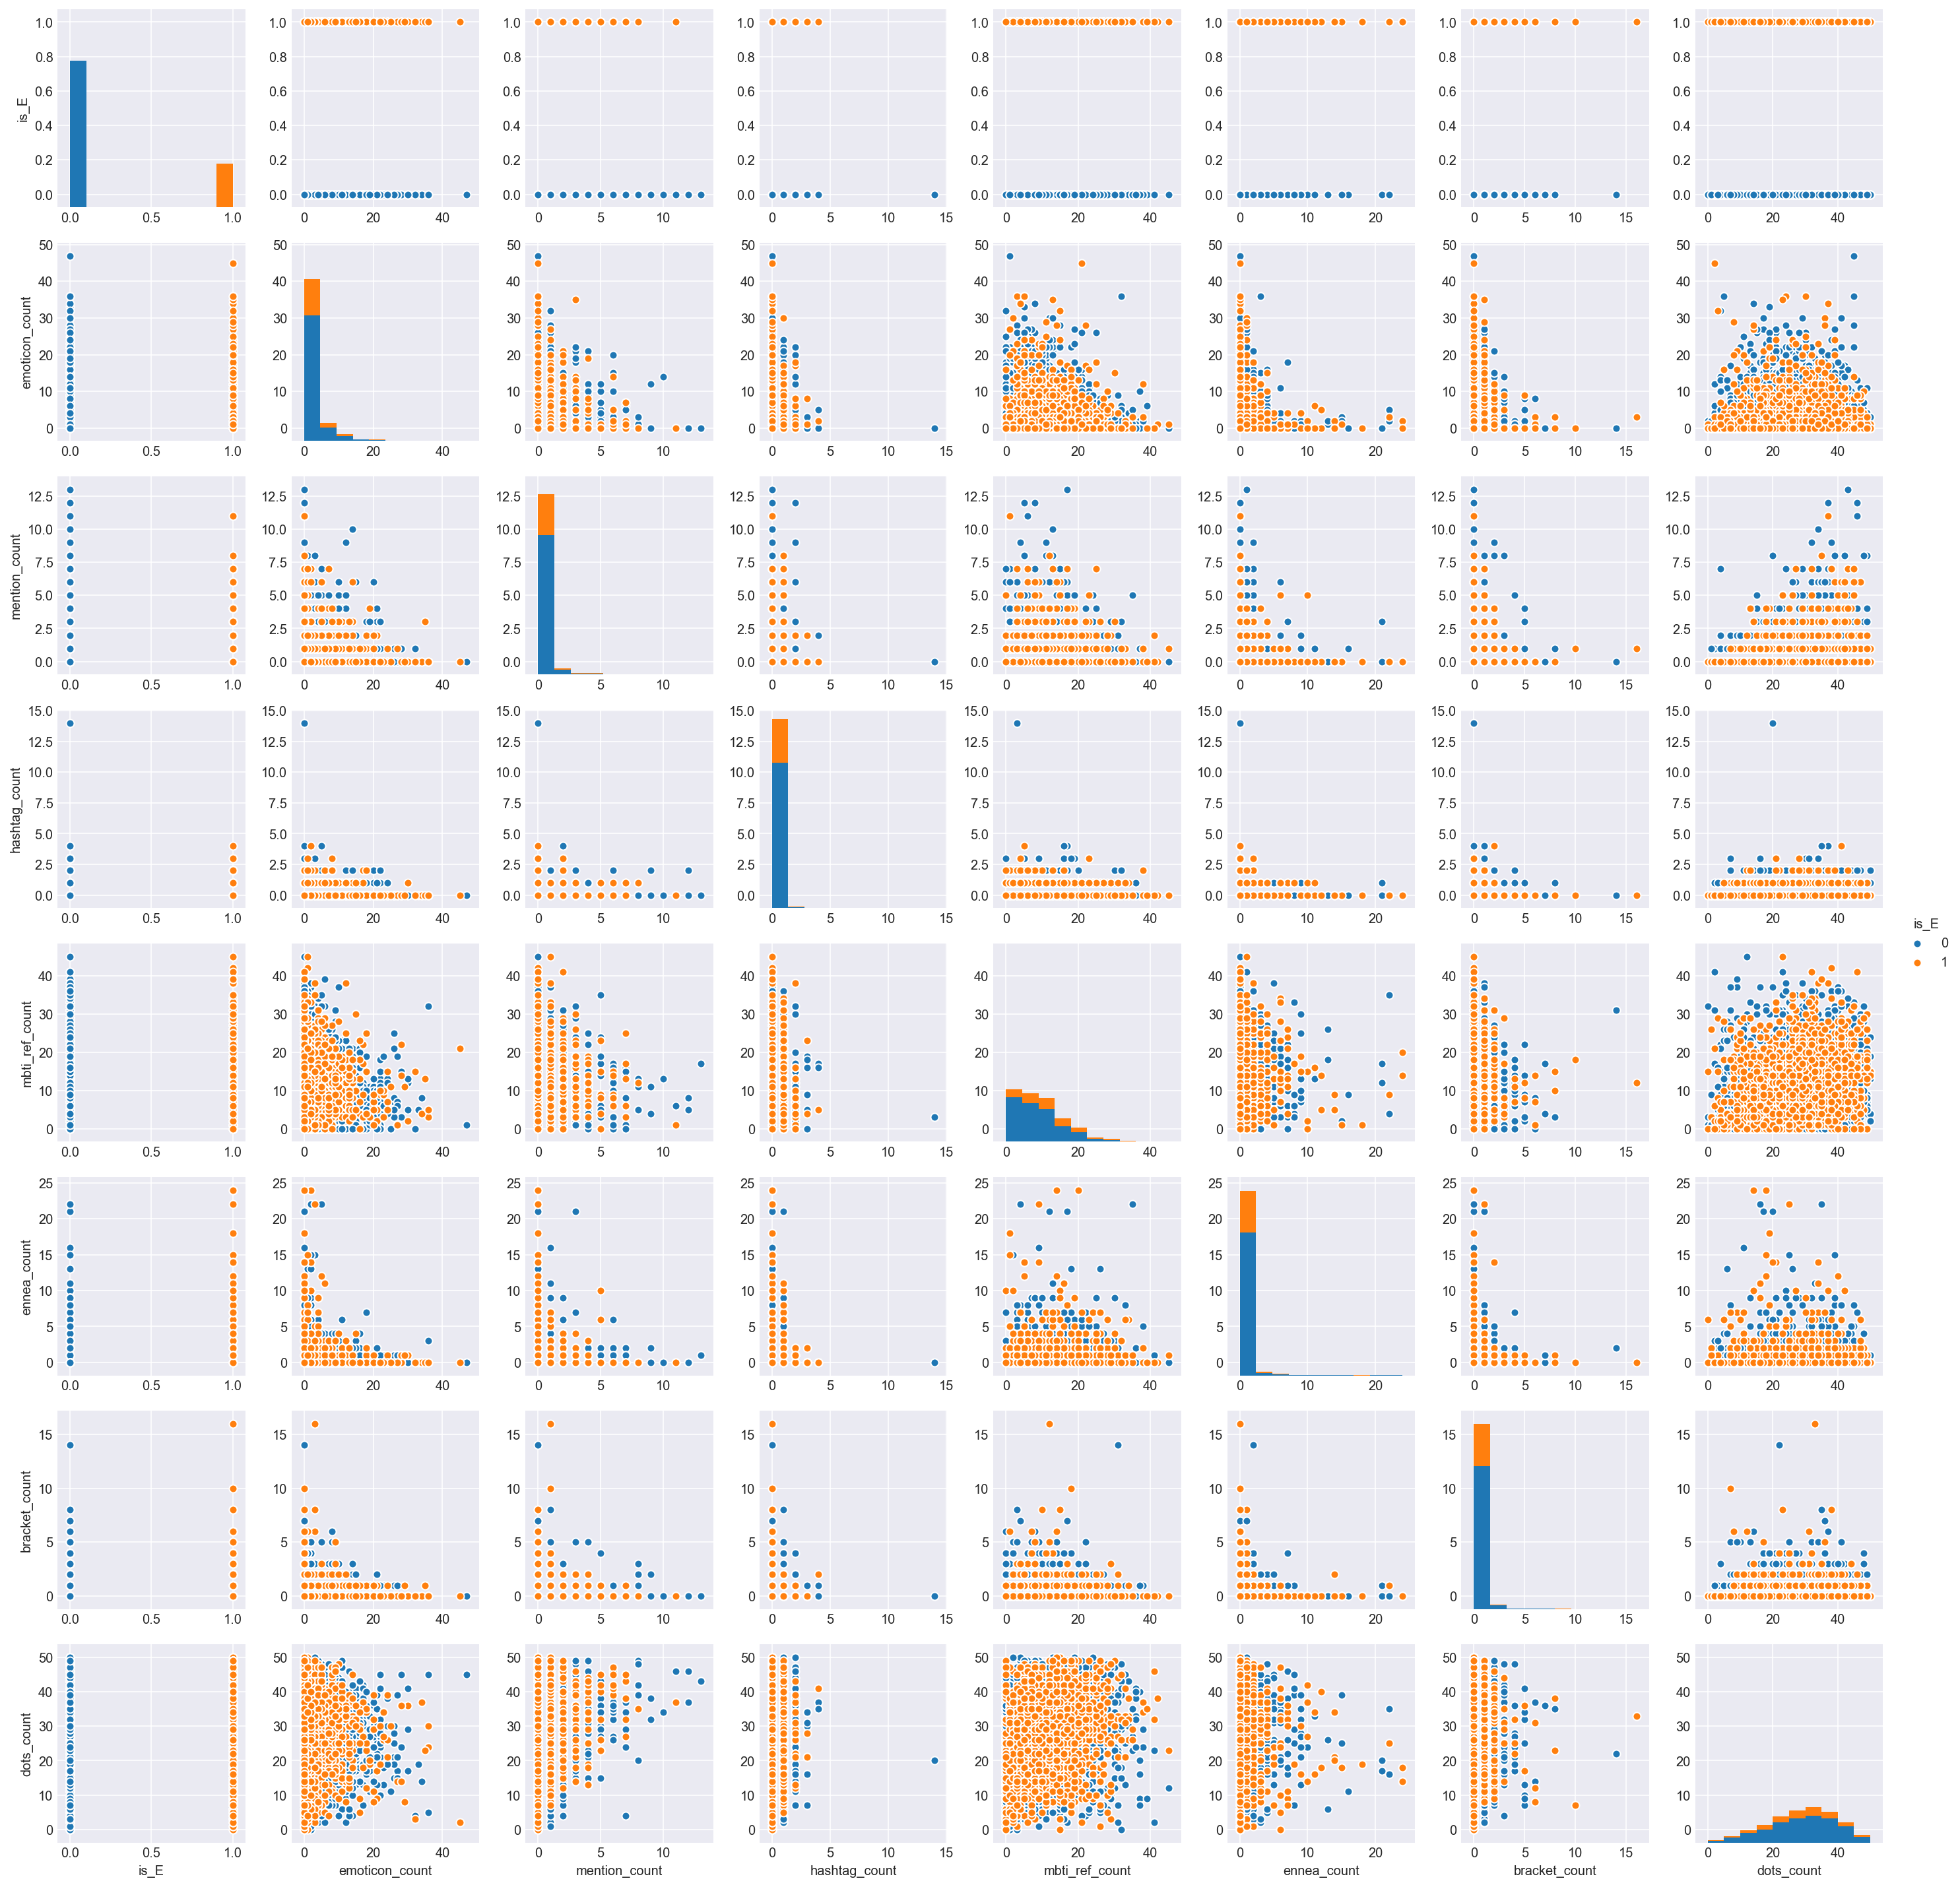

In [34]:
sns.pairplot(mbti_num[['is_E','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count']], hue='is_E')

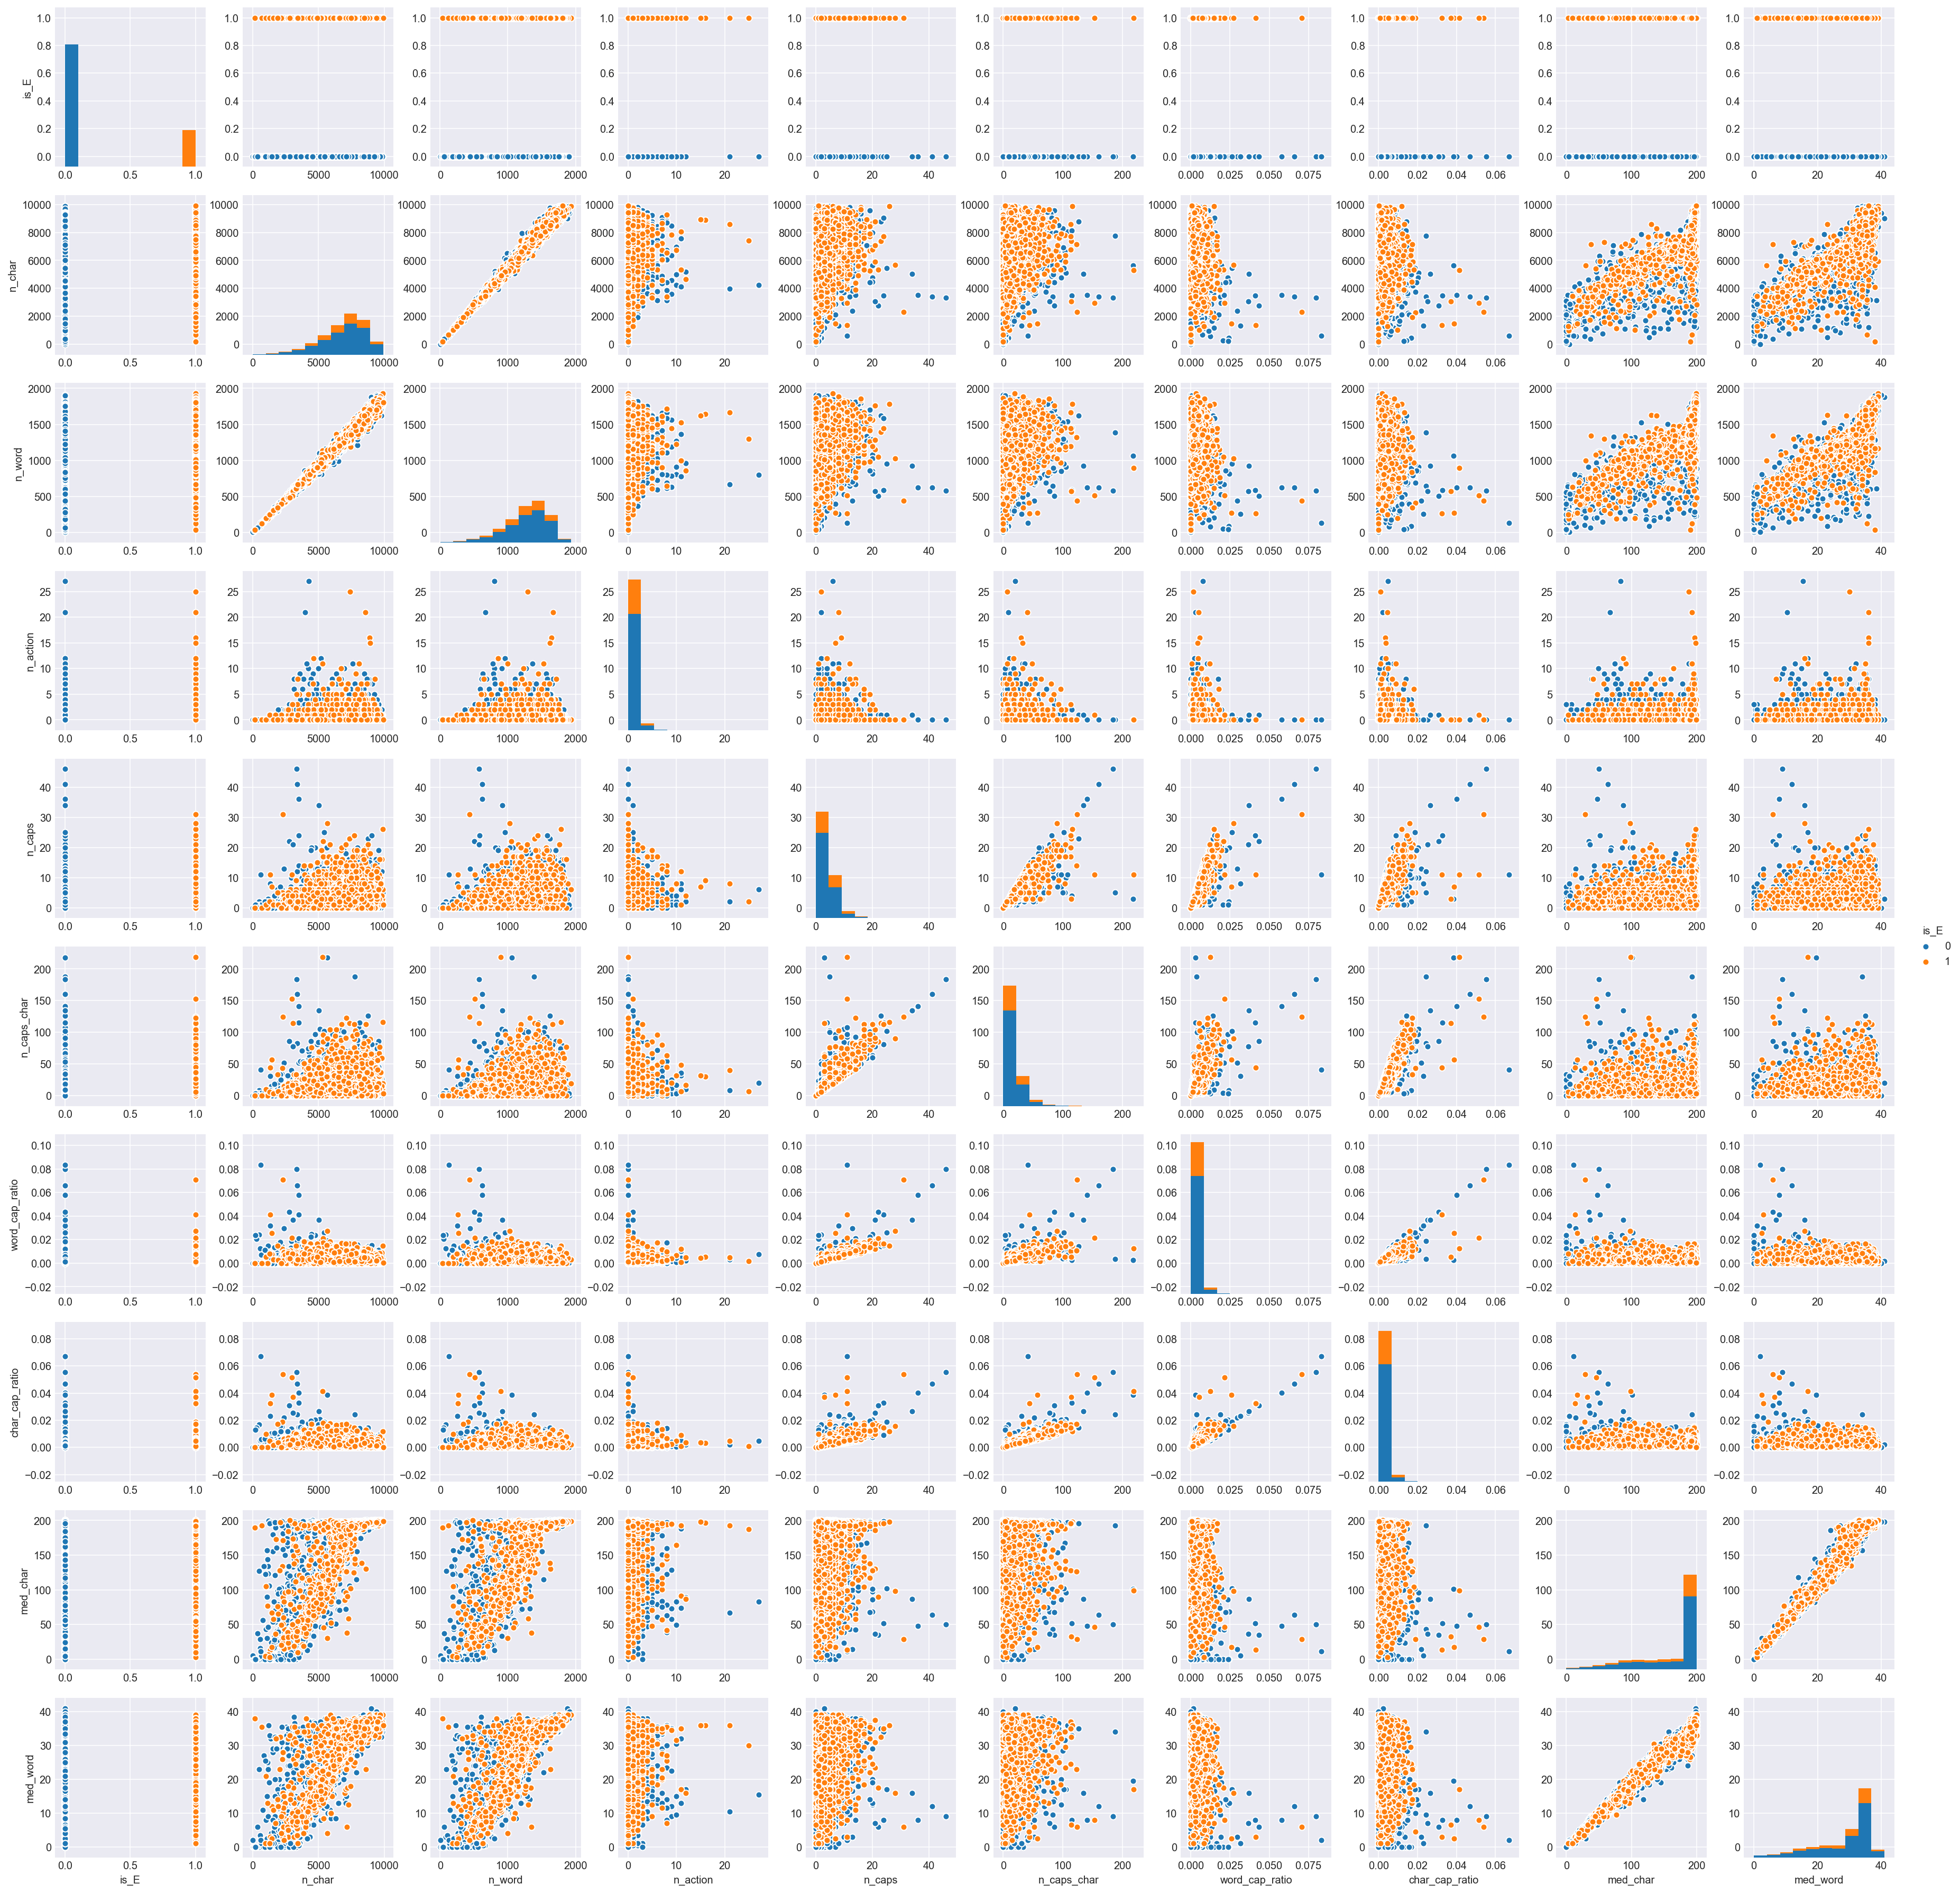

In [35]:
sns.pairplot(mbti_num[['is_E','n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']], hue='is_E')

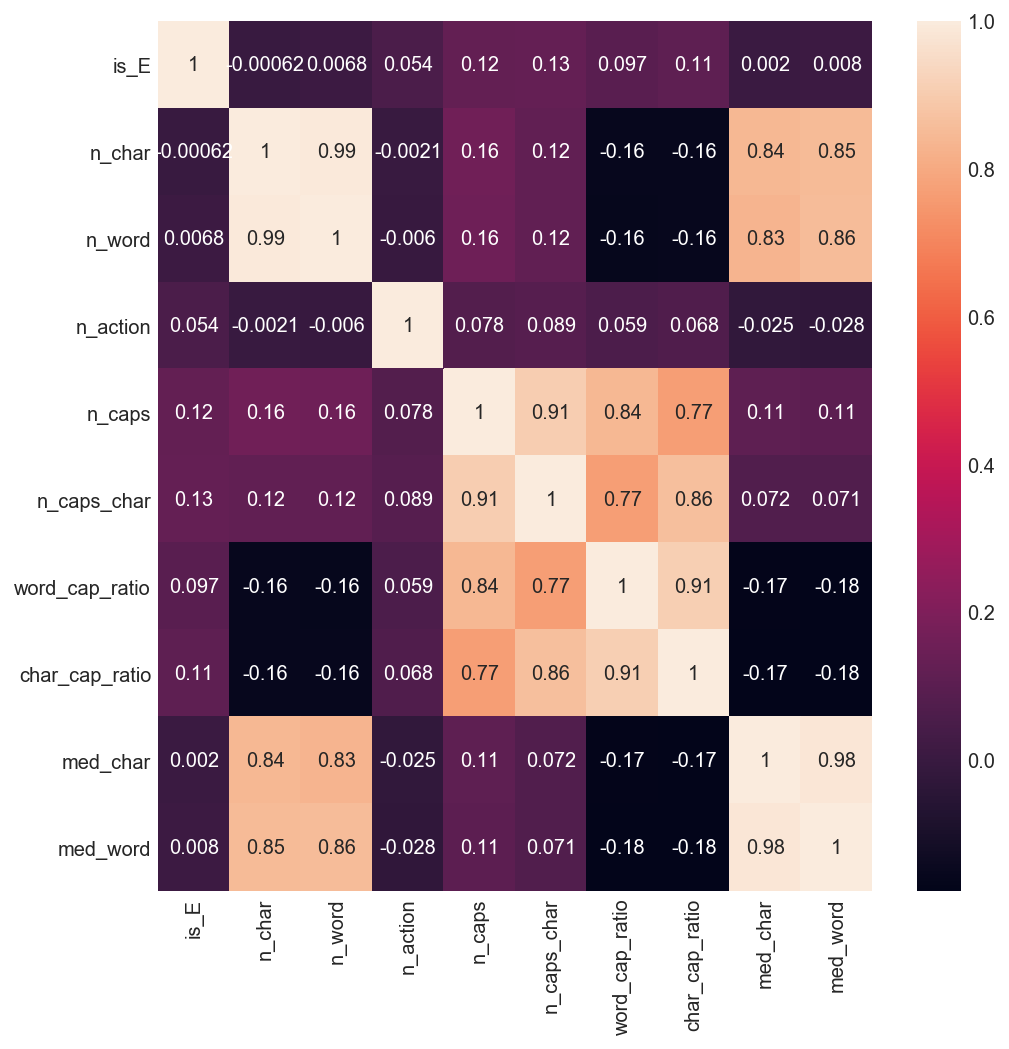

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(mbti_num[['is_E','n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']].corr(), annot=True)

In [37]:
y = mbti_num['is_E']
X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']]

I would like to first try out TPOT here (Later I will perform some magic but hey)

See how the performance will be like

In [38]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

y = mbti_num['is_E']
X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='roc_auc')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_E_try.py')

C:\Users\User\Anaconda2\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: 0.637990449778


Generation 2 - Current best internal CV score: 0.650559552241


Generation 3 - Current best internal CV score: 0.650798807518


Generation 4 - Current best internal CV score: 0.650798807518


Generation 5 - Current best internal CV score: 0.650798807518



Best pipeline: LogisticRegression(FastICA(input_matrix, tol=0.15), C=5.0, dual=False, penalty=l2)
0.652073033708


True

In [39]:
# y = mbti_num['is_S']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_S_try.py')

In [40]:
# y = mbti_num['is_T']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_T_try.py')

In [41]:
# y = mbti_num['is_J']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_J_try.py')

### Let's do POS!

Wait what is POS

Oh im glad you asked

POS is not Point of Sale arh! It means Parts of Speech. What I am going to do here is to extract out the type of words within a bunch of words and stuff to identify noun, adjective, punctuation etc. 

In [42]:
import nltk
from nltk.tokenize import word_tokenize

#Takes a long time to run!
mbti['tagged_words'] = mbti['words_only'].apply(
    lambda x: [nltk.pos_tag(word_tokenize(line.decode('utf-8', errors='replace'))) for line in x])
mbti['tagged_words'][0]

[[],
 [],
 [(u'enfp', 'NN'),
  (u'and', 'CC'),
  (u'intj', 'JJ'),
  (u'moments', 'NNS'),
  (u'sportscenter', 'MD'),
  (u'not', 'RB'),
  (u'top', 'VB'),
  (u'ten', 'NN'),
  (u'plays', 'NNS'),
  (u'pranks', 'NNS')],
 [(u'What', 'WP'),
  (u'has', 'VBZ'),
  (u'been', 'VBN'),
  (u'the', 'DT'),
  (u'most', 'RBS'),
  (u'life-changing', 'JJ'),
  (u'experience', 'NN'),
  (u'in', 'IN'),
  (u'your', 'PRP$'),
  (u'life', 'NN'),
  (u'?', '.')],
 [(u'On', 'IN'),
  (u'repeat', 'NN'),
  (u'for', 'IN'),
  (u'most', 'JJS'),
  (u'of', 'IN'),
  (u'today', 'NN'),
  (u'.', '.')],
 [(u'May', 'NNP'),
  (u'the', 'DT'),
  (u'PerC', 'NNP'),
  (u'Experience', 'NNP'),
  (u'immerse', 'NN'),
  (u'you', 'PRP'),
  (u'.', '.')],
 [(u'The', 'DT'),
  (u'last', 'JJ'),
  (u'thing', 'NN'),
  (u'my', 'PRP$'),
  (u'INFJ', 'NNP'),
  (u'friend', 'NN'),
  (u'posted', 'VBD'),
  (u'on', 'IN'),
  (u'his', 'PRP$'),
  (u'facebook', 'NN'),
  (u'before', 'IN'),
  (u'committing', 'VBG'),
  (u'suicide', 'PDT'),
  (u'the', 'DT'),
  (u'nex

In [43]:
#From the 1st X rows, look at the type of words in each tag
#Also takes a long time! I used a for loop -.-

from pprint import pprint
wordcatdict={}
for pig in mbti['tagged_words']:
    for line in pig:
        for x in line:
            if x[1] in wordcatdict.keys():         #Check for existing tag
                if x[0] in wordcatdict[x[1]]:      #Check for existing word
                    continue
                else:
                    wordcatdict[x[1]].append(x[0]) #Add 2nd or more word
            else:
                wordcatdict[x[1]] = [x[0]]         #Add new tag with new word as list
            
pprint(wordcatdict)
#Its not perfect, but hey
#Remember the purpose - it is not to exactly identify the right kind of words, but to extract features
#So its ok!

#Lemme iterate this
#I actually do not care much about the integrity of the features
#Most importantly is that it can consistently perform as a good model

{'#': [u'#'],
 '$': [u'<',
       u'$',
       u'enneagram',
       u'XD',
       u'Psalm',
       u'h',
       u'Type',
       u'Heather',
       u'xD',
       u'thank',
       u'trilogy',
       u'Yusuke',
       u'laughs',
       u'*rages*',
       u'cheap',
       u'weigh',
       u"'if",
       u'-Tablo',
       u'+',
       u'[',
       u'|',
       u'Akt',
       u'>',
       u'Afterwards',
       u'@',
       u'Girl',
       u'Hebrews',
       u'Run',
       u'outward',
       u'Yep',
       u'Warmth',
       u'Punniez',
       u'=D',
       u'=',
       u'nope',
       u'/',
       u'Round',
       u'lol',
       u'XSFX',
       u'Amsterdam',
       u'..',
       u'O',
       u's',
       u'~',
       u'Age',
       u'hygiene',
       u'mid',
       u'c',
       u'Walrus',
       u'Aged',
       u'type',
       u'INFJ',
       u'max',
       u'/or',
       u'~occasionally~',
       u'//complete//',
       u'Amnesiac',
       u'INTJ',
       u'INFP',
       u'xSFJ',
       u'mn

        u'youtube',
        u'..',
        u'OH',
        u'Nowadays',
        u"'cute",
        u'yep',
        u'Yep',
        u'maybe',
        u"'..in",
        u'Ex',
        u'*ahem*',
        u'odd',
        u'Oceanographer',
        u'Yh',
        u'sometimes',
        u'Anyways',
        u'Ne',
        u'XD',
        u"'Vibes",
        u'-to',
        u'*trigger*',
        u'Ohh',
        u'm',
        u'ON',
        u'_And',
        u'Post',
        u"'budwiser",
        u'Yogi',
        u'OT',
        u'enfp',
        u'entp',
        u'Always',
        u'Shame',
        u'-Owl',
        u'estp',
        u'bother',
        u'HUFFLEPUFF',
        u'Owls',
        u'Yea',
        u'OFC',
        u'Nextgen',
        u'Weather',
        u'oh',
        u'OHMYGOD',
        u'OR',
        u'lol',
        u'-blinks-',
        u'N',
        u'^',
        u'Aside',
        u'NO',
        u'peak',
        u'enfj',
        u'O_0',
        u'|',
        u'yours',
        u"'J",
        u

        u'9w1',
        u'18y/o',
        u'28',
        u'@',
        u'1:14',
        u'65,000',
        u'45',
        u'1.',
        u'alone',
        u'4000',
        u'1.0',
        u'84157',
        u'83989',
        u'83984',
        u'83983',
        u'83919',
        u'83492',
        u'110',
        u'2008',
        u'GT-N7100',
        u'8-10',
        u'12th',
        u'60',
        u'59',
        u'57',
        u'80',
        u'53',
        u'77',
        u'68',
        u'522121',
        u'522129',
        u'522137',
        u'293162',
        u'293146',
        u'130',
        u'14.',
        u'103k',
        u'613',
        u'55773',
        u'55774',
        u'11,715',
        u'151616',
        u'251617',
        u'50666',
        u'5x',
        u'27',
        u'1:1',
        u'529594',
        u'202410',
        u'4/5',
        u'100k',
        u'510826',
        u'ONE',
        u'500',
        u'3rd',
        u'67356',
        u'54',
        u'64114',
        u'600

        u'413',
        u'3pnt1415926535897932384',
        u'F-aux',
        u'451330',
        u'72.2',
        u'80.6',
        u'38.9',
        u'58.3',
        u'83.3',
        u'47.2',
        u'1980s',
        u'2000s',
        u'6A',
        u'7/6/1995',
        u'7A',
        u'713730',
        u'706770',
        u'706018',
        u'687402',
        u'2e',
        u'137',
        u'200',
        u'1998',
        u'5.1',
        u'239786',
        u'4779047791',
        u'15th',
        u'360413604036042',
        u'346923469334694',
        u'3297732978329793298032981',
        u'3254932550325513255232553',
        u'3253332534325363253732538',
        u'32497',
        u'31701',
        u'300cc',
        u'60s',
        u'700',
        u'484314',
        u'Someone',
        u'553722',
        u'553730',
        u'946',
        u'274346274346',
        u'5wX',
        u'273154',
        u'2:57',
        u'271170',
        u'134913',
        u'134337',
        u'134345',
     

        u'2200',
        u'76538',
        u'76539',
        u'76540',
        u'75159',
        u'36045',
        u'34599',
        u'34506Meet',
        u'34426',
        u'49962',
        u'42507',
        u'42508',
        u'8DD',
        u'1319',
        u'1320',
        u'1321',
        u'-19',
        u'5.5/6',
        u'Furuba9000',
        u'40K',
        u'400K',
        u'10K',
        u'69889',
        u'44755',
        u'600ish',
        u'20,000',
        u'50,000',
        u'1500',
        u'2pm',
        u'249234249242',
        u'Sophomore',
        u'324793',
        u'zombie',
        u"'Badass'-wise",
        u'659586',
        u'464874',
        u'79.17',
        u'20.83',
        u'72.73',
        u'27.27',
        u'70.97',
        u'2000/2005/2008',
        u'160cm',
        u'50kg',
        u"5'3",
        u'110lbs',
        u'388698',
        u'384449',
        u'2+2=4',
        u'93026',
        u'93011',
        u'4135',
        u'9291',
        u'199626',
 

        u'40C',
        u'5:44',
        u'339850',
        u'630226',
        u'629762',
        u'1.Complain',
        u'3.Eat',
        u'4.Magically',
        u'11:08',
        u'0:00',
        u'79309',
        u'67664',
        u'25.2',
        u'30.2',
        u'2084',
        u'1:10',
        u'63.75',
        u'37.5',
        u'21285',
        u'19274',
        u'1988',
        u'8,5',
        u'47298',
        u'5m',
        u'1,57m',
        u'4w3/3w4',
        u'6pm',
        u'20.5',
        u'1939',
        u'99.999999',
        u'7399',
        u'7400',
        u'10Quality',
        u'6Physical',
        u'3Receiving',
        u'0Acts',
        u'//i975.photobucket.com/albums/ae240/WhereIsNovember/ENTP',
        u'20Motivational',
        u'20Posters/intpsuck.jpg~original',
        u"'em",
        u'4767045',
        u'1up',
        u'71st',
        u'55k/yr',
        u'68.75',
        u'56.25',
        u'119274',
        u'118465',
        u'584',
        u'44701',
    

        u'01111001',
        u'00100001',
        u'01010100',
        u'01110111',
        u'6c',
        u'6d',
        u'6b',
        u'4e',
        u'01001001',
        u'01100100',
        u'00101100',
        u'00100111',
        u'3488034879',
        u'32350',
        u'12+/hour',
        u'75K',
        u'712034',
        u'538361',
        u'538369',
        u'515842',
        u'1.5mm',
        u'1300',
        u'7030',
        u'19ish',
        u'543594',
        u'26C',
        u'1420/1600',
        u'1.9.2',
        u'3.99.0.3',
        u'3.0.0',
        u'6+8',
        u'425362',
        u'388218',
        u'380098',
        u'74852',
        u'13/14',
        u'10=35',
        u'\xb2',
        u'45.55',
        u'54.45',
        u'53.66',
        u'46.34',
        u'427954',
        u'100s',
        u'12:30',
        u'22523666',
        u'419978',
        u'12+hours',
        u'6am',
        u'6.00',
        u'3.2',
        u'36.1',
        u'19.4',
        u'642985',
 

        u'20lbs',
        u'2PM',
        u'372458',
        u'211794',
        u'14-15',
        u'2012/2/11',
        u'87025',
        u'705874',
        u'56793156',
        u'696754',
        u'696401',
        u'536738',
        u'536762',
        u'536770',
        u'4:30ish',
        u'2.Repeating',
        u'3.Why',
        u'4.Why',
        u'*anti-joke',
        u'1.IQ',
        u'2.A',
        u'3.Hidden',
        u'4.Religious',
        u'5.Sometimes',
        u'6.True',
        u'300k',
        u'33280',
        u'9.Pond',
        u'243858',
        u'90660',
        u'90662',
        u'583',
        u'19/36',
        u'9-2-5',
        u'780-850',
        u'12/12/2013',
        u'17:47',
        u'18:30',
        u'48537',
        u'2801783',
        u'4th/diminished',
        u"'80s",
        u'231722',
        u'Foo',
        u'1:38',
        u'3/14/15',
        u'245',
        u'718674',
        u'7w8s',
        u'508914',
        u'148',
        u'288282',
        u'7

        u'337569',
        u'319634',
        u'16.5',
        u'418',
        u'2.75',
        u'58.06',
        u'41.94',
        u'57898',
        u'422',
        u'203',
        u'0.71',
        u'87829',
        u'65032',
        u'1hour',
        u'F/T-',
        u'80s/90s',
        u'York-ESTJ',
        u'Fry',
        u'5/4',
        u'349210',
        u'9-INFP',
        u'47.6',
        u'44.6',
        u'30.5',
        u'27.1',
        u'20.2',
        u'MBTI',
        u'3-Colin',
        u'3-Fred',
        u'4-Hermione',
        u'9780062507211',
        u'Kind',
        u'1.What',
        u'343537',
        u'343545',
        u'343553',
        u'343561',
        u'343569',
        u'343489',
        u'343497',
        u'343505',
        u'343513',
        u'343521',
        u'11/11/11',
        u'14,660',
        u'22873690',
        u'67495',
        u"'Give",
        u'62747Do',
        u'3000nd',
        u'+20',
        u'10.92',
        u'9.08',
        u'8.61',
      

        u'79961',
        u'5.Nature',
        u'6.Book',
        u'8U',
        u'8|',
        u'-80',
        u'41.67',
        u'31.25',
        u'709266',
        u'654690',
        u"'single",
        u'4slashes',
        u'229',
        u'552026',
        u'552034',
        u'552042',
        u'552050',
        u'440162440178',
        u'255506',
        u'9483894839948409484194842',
        u'48906489074890848909',
        u'46496',
        u'46500',
        u'46497',
        u'100256256',
        u'10,9',
        u'53RV35',
        u'7O',
        u'0UR',
        u'4M4Z1NG',
        u'7H1NG5',
        u'1MPR3551V3',
        u'1N',
        u'7H3',
        u'749374203',
        u'54.2',
        u'487730',
        u'481',
        u'381642',
        u'381634',
        u'11:30am',
        u'7-13',
        u"'an",
        u"'alone",
        u'Tombstone',
        u'6/8/4',
        u'90354',
        u'85912',
        u'62683',
        u'26/36',
        u'100hz',
        u'107hz',
      

        u'110ug',
        u'517330',
        u'475122',
        u'431770',
        u'167234',
        u'167202',
        u'200,000',
        u'115626',
        u'92008',
        u'79073',
        u'43553Hes',
        u'120lbs',
        u'252194',
        u'252202',
        u'27*16',
        u'1.81m',
        u'555',
        u'1950x1980x2200',
        u'99490',
        u'716450',
        u"'victory",
        u"'10,000",
        u'612522',
        u'286202',
        u'8ness',
        u'70yo',
        u'1662854',
        u'652170',
        u'652178',
        u'28hrs',
        u'375730',
        u'375706',
        u'12:34:56',
        u'228954',
        u'-4',
        u'-33',
        u'222130',
        u'212490',
        u'202618',
        u'202570',
        u'2222',
        u'22:10',
        u'24:50',
        u'502114',
        u'646826',
        u'646778',
        u'646786',
        u'646802',
        u"'Music",
        u'163538',
        u'530d',
        u'50k',
        u'58618',
      

        u'13yr',
        u'5months',
        u'45911',
        u'4*5*8',
        u'12/12',
        u"'one",
        u'32473',
        u'5054N',
        u'99+',
        u'81436',
        u'ENTJ',
        u'37178',
        u'637186',
        u'637178',
        u'635378',
        u'633786',
        u'617865',
        u'606698',
        u'606706',
        u'606714',
        u'600018',
        u'600026',
        u'600034',
        u'599978',
        u'599986',
        u'595322',
        u'595314',
        u'595330',
        u'591242',
        u'591250',
        u'591258',
        u'591266',
        u'660449',
        u'10000x',
        u'358/583/835',
        u'87316',
        u'702922',
        u'668393',
        u'668401',
        u'42915',
        u'42917',
        u'42918',
        u'42913',
        u'42912',
        u'42387',
        u'39347',
        u'00Hikaru00',
        u'1948',
        u'19/20ish',
        u'9-6-4',
        u'9-4-6',
        u'567346',
        u'58443',
        u"

        u'393874',
        u'4chan/pol/',
        u'359162',
        u'1500s',
        u'1:42am',
        u'664329',
        u'15:49',
        u'42:5u202c',
        u'13-15',
        u'83546',
        u'83082',
        u'4b0082'u'700706',
        u'697866',
        u'73854',
        u'32619',
        u'32431',
        u'323643236332362',
        u'I-100',
        u'462138',
        u'462130',
        u'461874',
        u'461866',
        u'461826',
        u'461818',
        u'461810',
        u'461802',
        u'461778',
        u'461666',
        u'461658',
        u'460874',
        u'455289',
        u'443114',
        u'443106',
        u'443098',
        u'443090',
        u'347866',
        u'262626',
        u'10.1.2',
        u'10.12.6',
        u'52:25',
        u'12:45',
        u'14:10',
        u'14:45',
        u'9.52k',
        u'53:00',
        u'15:25',
        u'14:20',
        u'9.5k',
        u'55:55',
        u'45:25',
        u'54:55',
        u'55:55*',
        

        u'1.49',
        u'1.74',
        u'.A',
        u'358704',
        u'16:04',
        u'19:02',
        u'639018',
        u'90884',
        u'6w7cp',
        u'1-1',
        u'712738',
        u'712106',
        u'712114',
        u'712122',
        u'712130',
        u'712138',
        u'25gb',
        u'672682',
        u'669273669281',
        u'668161668169',
        u'667945',
        u'109/200',
        u'107/200',
        u"'24",
        u"'Aura",
        u'58.97',
        u'41.03',
        u'54.05',
        u'45.95',
        u'136201',
        u'115610',
        u'53.33',
        u'46.67',
        u'50~60',
        u'63771',
        u'63769',
        u'3469103',
        u'3466807',
        u'1893',
        u'63097',
        u'63058',
        u'3430478',
        u'39.',
        u'637554',
        u'808',
        u'809',
        u'5:31',
        u'242219',
        u'115266',
        u'94390',
        u'1/City',
        u'117298',
        u'1on1',
        u'19754',
      

        u'Mid',
        u'manou200b',
        u'Thanks',
        u'minimum',
        u'nylon',
        u'kid',
        u'estp',
        u'lookin',
        u'Facebook',
        u'extravert+',
        u'extravert',
        u'propaganda',
        u'mmmm',
        u'pepsi',
        u"''The",
        u'mabye',
        u'itx92s',
        u'mind',
        u'xNFP',
        u'need',
        u'-Our',
        u'vad',
        u'voracious..',
        u'mercy',
        u'runny',
        u'emoji848',
        u'motherfuckin',
        u'duh',
        u'x96',
        u'essay',
        u'vie',
        u':/',
        u'Gracias',
        u'menchi',
        u'korokke',
        u'v.',
        u'mixed',
        u'vegan',
        u'Yes',
        u'Yay',
        u'mower',
        u'dem',
        u'pav\xe9s',
        u"y'en",
        u'observe',
        u'*cough*',
        u'veryyy',
        u'*grabs',
        u'knew',
        u'og',
        u'*hug*',
        u'.climaxed',
        u'envy',
        u'keep',
     

        u"'misanthropic",
        u'maybe',
        u'*Weapon',
        u'whichever',
        u'touch',
        u'Ormazd',
        u'thereal',
        u'Childlike',
        u'teeth',
        u'Boy',
        u'bluekitdon',
        u'..though',
        u'bless',
        u'assess',
        u'personal/from',
        u'-Get',
        u'ofsome',
        u'ouside',
        u'~Two',
        u'amuses',
        u'Protagoras',
        u'Forum',
        u'batman',
        u'isthat',
        u'luckyfun2014',
        u'psychsike',
        u'Bronafide',
        u'bough',
        u'Warehouse',
        u'[',
        u'worthwhile',
        u'-who',
        u'Wherever',
        u'worthless',
        u'Flip',
        u"'Like",
        u'tot',
        u'Bago',
        u"'caus",
        u'.While',
        u'nerdy',
        u'..among',
        u'f**k',
        u'Whoever',
        u'naked',
        u'better',
        u'AT',
        u'-profound',
        u'oohhh',
        u'accent*',
        u'Augh',
        u

        u"'Dislike",
        u"'Gross",
        u'ndeed',
        u'on.Without',
        u'on..etc.So',
        u'mistake.Eventhough',
        u'Whatabout',
        u'about\u2026',
        u'Bump..',
        u'grind',
        u'extroverted..',
        u'accepts',
        u'downcast',
        u"'complete",
        u'Unleash',
        u'believe',
        u'anthem..if',
        u"'cute",
        u'organic',
        u'board\u2014whatever',
        u'superlib',
        u'tp',
        u'NF',
        u'adopt',
        u'trashes',
        u"'ok",
        u"'over",
        u'UFOS',
        u'pile',
        u'nickelback..',
        u'pedal',
        u'press',
        u'screw',
        u'WontlyTheMoonBear',
        u'Anyways',
        u'ninjas',
        u'gettingacross',
        u'too..maybe',
        u'though..that',
        u'Overhead',
        u'obviously',
        u'Buuuuuut',
        u'and..',
        u'Old',
        u'Unloads',
        u'IQ',
        u'opinions',
        u'tags',
        u'

        u'and/or',
        u'interesting.You',
        u'infinite',
        u'pierced',
        u'unnecessary',
        u'about..',
        u'ethical',
        u'uncomfortable',
        u'fact..',
        u'foolish',
        u'cute',
        u'istj',
        u'friend',
        u'recopying',
        u'lol..',
        u'noticed',
        u'Irresistable',
        u'fictional',
        u'made-up',
        u'incredible',
        u'sango',
        u'platonic',
        u'lasting',
        u'aggressive/angry',
        u'up..',
        u'Easy',
        u'grade',
        u'ummm',
        u'amusing',
        u'horror',
        u'unexpected',
        u'numerous',
        u'axe',
        u'dependable',
        u'..',
        u'um',
        u'COOL',
        u'-high',
        u'tipsy/felt',
        u'hot',
        u'sure..',
        u'annd',
        u'ongoing',
        u'submissive',
        u'incomplete',
        u'notice',
        u'listen',
        u'invisible',
        u'nude',
        u'wear',
 

        u'stereotype',
        u'chrome',
        u'bubble',
        u'bodacious',
        u'black-private',
        u'handed',
        u'rick',
        u'intps',
        u'exceptional',
        u'thankful',
        u'1-1+1-1+1',
        u'0+1-1+1-1',
        u's=',
        u'impressed',
        u"don't-tell-me-what-to-do",
        u'i-already-know-it-you-dont-have-to-tell-me-that',
        u'y',
        u'x-y',
        u'geometrical',
        u'satisfying',
        u"'friend",
        u'thriller/sci-fi',
        u'pseudo',
        u"'great",
        u'preppy',
        u'felt',
        u'initiated',
        u'akward',
        u'friendship',
        u'outward',
        u'lingering',
        u'all-time',
        u'humble',
        u'hometown',
        u'smothered',
        u'andere',
        u'peak',
        u'delicate',
        u'withdrawn',
        u'avatar',
        u'invalid',
        u'fanciful',
        u'figurative',
        u'disorganized',
        u'Traditional',
        u'in-la

        u'-Intuitive',
        u'bureaucratic',
        u'tight',
        u'kawaii',
        u'ditsy',
        u'psych',
        u'support',
        u'alone.-',
        u'tried',
        u'finding',
        u'stop',
        u'calming',
        u'someones',
        u'moot',
        u'opposing',
        u'frankly',
        u'thrown',
        u'pseudo-intellectual',
        u'insufferable',
        u"'Do",
        u'small-talk',
        u'outspoken',
        u'beneficial',
        u'irksome..',
        u'conversational',
        u'see..',
        u'adversarial',
        u'Fair-weather',
        u'Solid',
        u"'illogical/unintelligent",
        u'unfunny',
        u'juvenile',
        u"'comic",
        u'under-appreciated',
        u'seclusive',
        u'social-related',
        u'aforementioned',
        u'heartless',
        u'experiment',
        u'=',
        u'log2',
        u'prescribed',
        u'sooner',
        u'finite',
        u'expected',
        u'rocket',
        u'n

        u'Love-hate',
        u'3-year-old',
        u'sulky',
        u'lego',
        u'leaves-turning-orange',
        u'poetry',
        u'approachable',
        u'unnoticeable',
        u'judging',
        u'nature-wise',
        u'mad/sad',
        u'sit-down',
        u'pattern',
        u'veeeery',
        u"c'mon",
        u'bitchy/tired/unapproachable',
        u'decide',
        u'dialect',
        u'portal',
        u'thrilled',
        u'homicidal',
        u'over-drafted',
        u'*Big',
        u'well-adjusted',
        u'callous',
        u'minimum',
        u'ridiculed',
        u'boob',
        u'silberlied',
        u'downhill',
        u'licensed',
        u'INTPs',
        u'trained',
        u'prose',
        u'choir',
        u'Utilitarian/Kantian/Christian',
        u'inane',
        u'synesthesia',
        u'experimental',
        u"'normal",
        u'forgiving',
        u'untidy',
        u"dogma's/false",
        u"'smart",
        u"'impossible",
        

        u'grouped',
        u'**',
        u'tempting',
        u'ex-girlfriend',
        u'risk-taking',
        u'aeronautical',
        u'overprotective',
        u'overly-feelsy',
        u'self-proclaimed',
        u'vedic',
        u'bombastic',
        u'at/extensive',
        u'Serbian',
        u'Bosnian',
        u'satisfactory',
        u'~80',
        u'13-14',
        u'14-16',
        u'physicalish',
        u'seafood',
        ,
        u'insulted',
        u'neighbour',
        u'love-interest',
        u'tormented',
        u'unethical',
        u'cut-out',
        u'half-sleeve',
        u'orientals',
        u'disillusioned',
        u'Akira',
        u'Horrible',
        u'damaged',
        u'androgenous',
        u'pervasive',
        u'co-dependent',
        u'receiving',
        u'perfectioned',
        u'itx92s',
        u'double-take',
        u'consciousful',
        u'strive',
        u'jumpy',
        u'masterful',
        u'eloquent',
        u'threshold',


        u'laughing-since',
        u'Factual',
        u'way-',
        u'gundam',
        u'asian',
        u'things-for',
        u'voted',
        u'Multivariable',
        u'xNTx',
        u'7-9',
        u'non-problematic',
        u'stumble',
        u'suiting',
        u'Language',
        u'astronomy',
        u'feelin',
        u'normalcy',
        u'4th-5th',
        u'cocky',
        u'aspectual',
        u'gung-ho',
        u'dimmed',
        u'hide',
        u're-initializing',
        u'ginormous',
        u'phisological',
        u'absolutist',
        u'fear-mongering',
        u'chakra',
        u'unhapiness',
        u'hapiness',
        u'third-eye',
        u'brain-power',
        u'processing',
        u'non-maximized',
        u'involve',
        u'unfavorable',
        u'polymarous',
        u'epigenetical',
        u'r/K',
        u'malleable',
        u'genetical',
        u'met',
        u'inhabitet',
        u'wooden',
        u'intelligable',
        u'Silen

        u'well-intentioned',
        u'creepiest',
        u'*comfortable*',
        u'spidey',
        u'frightened',
        u'Neurotic',
        u'dominant-balanced',
        u'secondary-less',
        u'social-dom',
        u'freakishly',
        u'WEIRD',
        u'..*evil',
        u'goodbye',
        u'..my',
        u'harrowing',
        u'shite',
        u'one-way',
        u'self-absorbed',
        u'HAPPY',
        u'Urban',
        u'awe',
        u'avocado',
        u'foreseeable',
        u'unforeseeable',
        u'gorno/mental',
        u'sleeve',
        u'hoodie',
        u'greatfull',
        u'unskilled',
        u'indian',
        u'patient-doctor',
        u'sensitive/depressed/INFP',
        u'warmth',
        u'electronic/indie',
        u'crystal',
        u'hungry/exhausted/anxious',
        u'rhymey',
        u'videos/stories/personal',
        u'-english',
        u'-Spanish',
        u'Staind-So',
        u'latin',
        u'profiecient',
        u'Scientif

        u'incompatiable',
        u"'significant",
        u'stress-free',
        u'behold',
        u'Non-existent',
        u'Reflective',
        u'head',
        u'pre-toasted',
        u'delish',
        u'clear-as-glass',
        u'telerr',
        u'peple',
        u'12-yr-old',
        u'running',
        u'nicer',
        u'*high',
        u'nauseating',
        u'Aquarian',
        u'rowingineden',
        u'blessed',
        u'spit',
        u"'first",
        u'bugs',
        u'falseness',
        u'loooooooooong',
        u'v.v',
        u"'-",
        u'fast..',
        u'defused',
        u'weekly/daily',
        u'oven',
        u'trustworthy/a',
        u'non-living',
        u'nap',
        u"your'e",
        u'Despotic',
        u'simpler',
        u'Socialist',
        u'locka',
        u'fatty',
        u'nod',
        u'Jar-Jar',
        u'pseudo-hug',
        u'pseudo-kiss',
        u'sugar-heavy',
        u'nihilist',
        u'worldly',
        u'constitute',


        u'all-I',
        u'seriousness',
        u'-Satirical',
        u'18-24',
        u'fully-developed/unhealthy',
        u'die-',
        u'striped',
        u'loving/close',
        u'balanced/fulfilling',
        u'siamese',
        u'seated',
        u'infantalized/angelfied',
        u'niceness',
        u'skydiving',
        u'9w1-6w5-4w5',
        u'bothersome',
        u'helloquizzy',
        u'non-native',
        u'Fi-Se',
        u'Se-Fi',
        u'people-pleasing',
        u'encountered',
        u'removable',
        u'neat-freak',
        u'Hypocritical',
        u'half-bad',
        u'1-mile',
        u'Incessant',
        u'lutheran',
        u'once-in-a-lifetime',
        u'unsatisfying',
        u'month-to-month',
        u'over*',
        u'quicken',
        u'fantasy-ish',
        u'egyptian',
        u'unconfident',
        u'determine',
        u'neck-beard',
        u'strong/cold',
        u'shape-shifted',
        u'laughing',
        u'kids',
        u'

        u'pirate-killing',
        u'team-taught',
        u'2-D',
        u'airsoft',
        u'dubai-style',
        u'airstrip/fly-in',
        u'adoptive',
        u'Vin',
        u'blasted',
        u'over',
        u'persecuted',
        u'incredibly',
        u'door',
        u'4ish',
        u'3ish',
        u'floppy',
        u'thoughts/',
        u'uuugh',
        u'blushing/',
        u'******double',
        u'point',
        u'ome',
        u'few-',
        u'Quality',
        u'Second-',
        u'polish',
        u'quicly',
        u'upset/very',
        u"'mental",
        u'unattached',
        u'detective',
        u'enviromental',
        u"'sexual",
        u'Charlin',
        u'companioship',
        u'not-touching',
        u'Gryffindor-11',
        u'Slytherin-11',
        u'Ravenclaw-10',
        u'*gulp*',
        u'unhinged',
        u'unreachable',
        u'aux-Si',
        u'well-disposed',
        u'suspiscious',
        u'defensible',
        u'pottermore

        u'sx/so/sp',
        u'existential/',
        u'ride-or-die',
        u'adventure-seeking',
        u'unprecedented',
        u'provided',
        u'aroused',
        u'Speaking',
        u'meet-up',
        u'.she',
        u'bookish',
        u'messed',
        u'immature/unhealthy',
        u'priggish',
        u'meaaaaaaaaaaaaaaaannnnnnnn',
        u'franc',
        u'smtimes',
        u'fume',
        u'crayzay',
        u'Safe',
        u'23-Ton',
        u'5.3-Million-Brick',
        u'low-ish',
        u'que',
        u'self-contest',
        u'era',
        u'male-minded',
        u'lap',
        u'p***y.',
        u'brown-nosing',
        u'miss-typed',
        u'Depressed',
        u'ineffectual',
        u'interrupted',
        u'downfall',
        u"'scientific",
        u'litttle',
        u'usuallys',
        u'february',
        u'2000-2008',
        u'ughhh',
        u'76-1',
        u'aim',
        u'counter-strike',
        u'Binary',
        u'exist',
      

        u'openness',
        u'existed',
        u'kinesthenic',
        u'grub',
        u'screeching',
        u'foolin',
        u'.do',
        u'straped',
        u'catfish',
        u'deap',
        u'advant-garde',
        u'woooooven',
        u'*very*',
        u'IxFPs',
        u'writing/music/creative',
        u'INFP-friendly',
        u'Unreliable',
        u'skin/on',
        u'pre-test',
        u'nebula',
        u'christians..',
        u'pre-plan..',
        u'undersranding',
        u'Sean',
        u'stay-at',
        u'dick-ish',
        u'impulsiveness',
        u'up-bringing',
        u'firey',
        u'*angry',
        u'monemi',
        u'2-dimensional',
        u'sub-concious',
        u'pussy',
        u'reactive/receptive',
        u'befitting',
        u'Se-lead',
        u'Je-lead',
        u'Pe-lead',
        u'facilitate',
        u'therapy',
        u'formed',
        u'goths',
        u'interim',
        u'resurrected',
        u'atrophied',
        u

        u'line-style',
        u'prog-metal',
        u'tech-death',
        u'Vital',
        u'yelled',
        u'\u05d1\u05ea',
        u'\u05e9\u05d9\u05d0\u05d7\u05d6',
        u'*loving*',
        u'non-internal',
        u'short-story',
        u'Actualized',
        u'process-oriented',
        u'non-dogmatic',
        u'nascent',
        u'incompetent/',
        u'self-congratulatory',
        u'hyperactive/',
        u'Summers-',
        u'happy/',
        u'combo',
        u'hospitals/',
        u'inaugural',
        u'universality',
        u'movie/song',
        u'itll',
        u'spontainious',
        u'Pre-Revolution',
        u'micro-managing',
        u'vexing',
        u'not-so-awesome',
        u'240-somethings',
        u'shameless',
        u'Persistent',
        u'Ne-ENTP',
        u'lowered',
        u'manipulation',
        u'unfazed',
        u'armageddon',
        u'removed*',
        u'try-to-be-funny/random',
        u'actually-is-funny',
        u'u200bYou

        u'self-obsessed',
        u'eel',
        u'INCIDENTAL',
        u'non-conformity',
        u'mouthed',
        u'utilizzare',
        u'back-burner',
        u'Si-Te-Fi-Ne',
        u'Si-Fe-Ti-Ne',
        u'Ti-Se-Ni-Fe',
        u'Se-Ti-Fe-Ni',
        u"'clean",
        u'associative',
        u'Off-hand',
        u'neighborhood',
        u'non-INTP',
        u'self-understanding',
        u'*STJ',
        u'ego-stroking',
        u'samey',
        u'cheating',
        u'sliding',
        u"'84",
        u'rule-following',
        u'not-so-hidden',
        u'close-knit',
        u'Great-tasting',
        u'Brilliant',
        u'blue-skied',
        u'talk-related',
        u'water-y',
        u'INFP-T',
        u'fatter',
        u'Band-Aid',
        u'deviousness',
        u'moldable',
        u'blanking*',
        u'overreactive',
        u'cute/nice',
        u'were-cuttlefish',
        u'Indescribable',
        u'tvtropes.org',
        u'preferably',
        u'Spend',
  

        u'tried-and-true',
        u'internet-capable',
        u're-enact',
        u'strange/idealized',
        u'Yellowstone',
        ,
        u'noticed..',
        u'body/mind/soul',
        u'couldn',
        u'WTF/frustration',
        u'fact/logic',
        u'GOD',
        u'/images-of-alcohol-and-drug-abuse/',
        u'www.reuters.com/article/idUSL3026841220070430',
        u'dyfunctional',
        u'Brief',
        u'occasions-I',
        u'unimportant/trivial',
        u'suks',
        u'femine',
        u'primative/infantile',
        u'agendas',
        u'java',
        u'fun..',
        u'psychodynamic',
        u'poker-faced',
        u'psychoanalytic',
        u'uber-masculine',
        u"'Conscious",
        u'r/nosleep',
        u'Violent',
        u'far-right',
        u'put-together',
        u'major-required',
        u'ed',
        u'non-intensive',
        u'rascal',
        u'appalling',
        u'glow-in-the-dark',
        u'Erotic',
        u'feel-ful',
   

        u'mofo',
        u'ccan',
        u'logic=I',
        u'social/political',
        u'colliquial',
        u'answer-',
        u'control-',
        u'hope-',
        u'social/relationship',
        u'stare/spontaneous',
        u'wavelength-',
        u'process-',
        u'uncured',
        u'symbols/abstract',
        u'prude',
        u'dank',
        u'pornhub',
        u'it/seemed',
        u'shocking',
        u'adele-',
        u'gayest',
        u'forehead*',
        u'says-',
        u'car-',
        u'new-',
        u'whack-ass',
        u'myself-',
        u'MUST',
        u'hey-',
        u'ESTP/ISTP-',
        u'E/I-',
        u'patience',
        u'Self-fulfilling',
        u'introspecting',
        u'apologies',
        u'lifeeee',
        u'Synchronous',
        u'un-human',
        u'obvious/unnecessary/irrelevant',
        u'resentment',
        u'eminem',
        u'hard-hitting',
        u'same.The',
        u'bravado',
        u'stuff-if',
        u'self-actu

        u'friendships',
        u'non-SJ',
        u"'SO",
        u'///tmp/moz-screenshot-4.jpg',
        u'lesser-known',
        u'amber-yellow',
        u'Alone',
        u'2-ish',
        u'fictional/imaginary',
        u'MOooOOooOoOOnious',
        u'psysical',
        u'antibacterial',
        u'awe-inspiring',
        u'Narrow-mindedness',
        u'conspiratorial',
        u'screwdriver-woman',
        u'COLD',
        u'Discworld-related',
        u'Typological',
        u'ass-kissing',
        u'Lose',
        u'copy/pasted',
        u'Sarah-',
        u'natural-',
        u'arts-',
        u'*INFP*',
        u'advice-',
        u'in..',
        u'too-much',
        u'bubbly/enthusiastic',
        u'1w2-3w2-7w8',
        u'*Any*',
        u'no-rules-enneagram',
        u'1-fixer',
        u'Se-land',
        u'type-realted',
        u'maaaaany',
        u'*Pat',
        u'ehh',
        u'Tedious',
        u'attributable',
        u'six-foot',
        u'Proper',
        u'Edg

        u'Kerbal',
        u'Set',
        u'-Lazy',
        u'-Ignorant',
        u'-Hypocritical',
        u'-Argumentive',
        u'biomech',
        u'one-in-a-million',
        u'sensed',
        u"'revealed",
        u'biomechanical',
        u'nyan',
        u'bucket',
        u'sub-tropical',
        u'half-heartedly',
        u'redeeming',
        u'shin',
        u'scatty',
        u'protein-high',
        u'maya',
        u'caring..',
        u'flee',
        u'boardline',
        u'Resourceful',
        u'rekt',
        u'napolean',
        u'clark',
        u'gangster',
        u'less-trusted',
        u'curried',
        u'quick-like',
        u'crack-addicted',
        u'college-dropout',
        u'chronological',
        u'utility-type',
        u'testing',
        u'less-than-favorable',
        u'moss-covered',
        u'Trans-Siberian',
        u'far-left',
        u'leak',
        u'amps/metal',
        u'instrument',
        u'warehouse/hardware',
        u'people

        u'this.Just',
        u'figuring',
        u'over-inflated',
        u'people-related',
        u'presented',
        u'caterpillar',
        u'Caterpillar',
        u'water-related',
        u'lubricious',
        u'GT-P3100',
        u'lovesick',
        u'overstressed',
        u'semi-romantic',
        u"we'll-adjusted",
        u'dimly',
        u'closer-fit',
        u'hair-snuggling',
        u'singularly',
        u'barista',
        u'click-bait',
        u'cookie',
        u'racing',
        u'short-haired',
        u'Self-diagnosed',
        u'k-pop',
        u'up-relationships',
        u'wingman',
        u'narcisstic',
        u'silence',
        u'fashion-sense',
        u'metal-fan',
        u'60-69',
        u'50-59',
        u'three-year',
        u'Omega',
        u'objects/decor',
        u'ink',
        u'wimpish',
        u'shackled',
        u"'group",
        u'-Slapstick',
        u'deserved',
        u'morbid/macabre',
        u'sux',
        u'not-so-

        u'seriously*',
        u'bendable',
        u'ungraspable',
        u'trans*',
        u'S/N',
        u'urban-y',
        u"'urban",
        u'androsexual',
        u'transmaculine',
        u'gaybehavior',
        u'crazitaco',
        u'suitcase',
        u'giff',
        u'semi-bully',
        u'nimble',
        u'WAKING',
        u'iconiclastic',
        u'Jammy',
        u'~1200',
        u'aishiteru',
        u'tracky',
        u'\u256f\xb0\u25a1\xb0',
        u'sky-scraper',
        u'two-colour',
        u'energising',
        u'intros',
        u'idea-generating',
        u'*revival',
        u'-supermega',
        u'provider-sensor',
        u'pro-like',
        u'loudish',
        u'unbringing',
        u'pro-active',
        u"'be",
        u'cold/sober-thinking',
        u'blue/introspective',
        u'mr',
        u'people-aware',
        u'Lissa',
        u'Brooke-',
        u'Mouth-',
        u'IEE-1Ne',
        u'Te/Fi',
        u'infested',
        u'funny/r

        u'welp',
        u'fringe-y',
        u'open-mouthed',
        u'artsy-fartsy',
        u'programme',
        u'soldier',
        u'proposing',
        u'Lamarckian',
        u'non-beneficial',
        u'left-wing/egalitarian',
        u'you\xb4re',
        u'wouldn\xb4t',
        u'non-conclusive',
        u'Bravo',
        u'veryyy',
        u'INTP/ENTP/All',
        u'Tibetian',
        u'Stickied',
        u'disasterous',
        u'emtional',
        u'musculine',
        u'bookbutterfly',
        u'talkatives',
        u'sonder',
        u'..mind-silent',
        u'psyhic',
        u'Umm..',
        u'cyberpunk',
        u'skate',
        u'ni-fi',
        u'looped',
        u'disastreous',
        u'max',
        u'styllish',
        u'neighbouring',
        u'rowdy',
        u'nebuly',
        u'Japanese/samurai-themed',
        u'nudity',
        u'graphic-like',
        u'ukiyo-e',
        u'folk-based',
        u'nature-vs-nurture',
        u'Indian-American',
       

        u'handwriting/',
        u'good/deep',
        u'sony',
        u'philosophical/religious',
        u'Worlds',
        u'zaftig',
        u'varnish',
        u'smilish',
        u'eu',
        u'n\xe3o',
        u'juntei',
        u'ao',
        u'intrigou',
        u'bastante',
        u'interessante',
        u'uncancel',
        u'~Dorothy',
        u'~Albert',
        u"'environment-protection-person",
        u'thing..',
        u'know..',
        u'wa-ant',
        u'awww',
        u'introverted/less',
        u'thanking',
        u'*Sarcastic',
        u'limey',
        u'flaubert',
        u"l'autrec",
        u'evidential',
        u'done.just',
        u'ill..',
        u'domie___',
        u'___domie',
        u'WeChat\uff1atreeish',
        u'etel\xe4-pohjanmaan',
        u'south-east',
        u'\xf3rkhis',
        u'-Midnight-',
        u'hotel',
        u'polyamory',
        u'-my-',
        u'blablabla',
        u'not-so-comforting',
        u'order=',
        u

        u'Icy',
        u'stubborness',
        u"'avoid",
        u'non-cynical',
        u'well/was',
        u'stressful/hard',
        u'1-50+',
        u'sixty',
        u'm-m-uh',
        u'enxp',
        u'59-62',
        u'Jealous',
        u'excact',
        u'beautifull',
        u'mantaining',
        u'we\xb4re',
        u'fantasied',
        u'\u0441\u0435',
        u'nutrigrain',
        u'^^^^^^^^My',
        u'eurocentric',
        u'mongolian',
        u'eurocentrist',
        u'Vulnerable',
        u'Joey-',
        u'artist=INFP',
        u'not-trying-to-maintain-a-relationship',
        u'translation-',
        u'aren`t',
        u'renaissance',
        u'warmhearted',
        u'vulerable',
        u'unreasonale',
        u'environment-hussle',
        u'ecological',
        u'Hitler-',
        u'Manson-',
        u'lookalike',
        u'exacerbating',
        u'wartime',
        u'rolaids*',
        u'*pops',
        u'mouth*',
        u'FU-CKING',
        u'actor/

        u'breakable',
        u'numbness',
        u'freezing',
        u'timy',
        u'cray',
        u'morphin',
        u'vulnerability',
        u'non-related',
        u'angora',
        u'Superstitious',
        u'honeybee',
        u'hexagons/honeycomb',
        u'shawls',
        u'Mutable',
        u'soph',
        u'dgaf',
        u'dudebro',
        u'alumni',
        u'meagre',
        u'staid',
        u'reasonable/rational',
        u'Avoidant-Fearful',
        u'Avoidant-Resistant',
        u'Insecure-Avoidant',
        u'feathery-light',
        u'long-eared',
        u'Hagrid',
        u'20-24',
        u're-question',
        u'highly-social',
        u'nonnative',
        u'higher-than-anticipated',
        u'scatter',
        u'chocolate/peanut',
        u'leaking',
        u'operate',
        u'sanari',
        u'unaceptable',
        u'makin',
        u'sendimental',
        u'iPersonic',
        u'below-',
        u'Rat-ish',
        u'64-bit',
        u'uncon

        u'tertiary-Se',
        u'bueno',
        u'musky',
        u'neptune',
        u'*In',
        u'Left-Leaning',
        u'Pro-Government',
        u'Non-Interventionist',
        u'house/atmospheric',
        u'White-',
        u'+25',
        u'USA-',
        u'upper-middle-class',
        u'Hungarian/Czech/Slovakian-American',
        u'XNTP-me',
        u'INTJ-friend1',
        u'INTP-friend2',
        u'ESFJ-friend3',
        u'IXTJ-acquaintance1',
        u'pre-group',
        u'\U0001f60e',
        u'thatkillme',
        u'infinite-loop',
        u'uncontagious',
        u'femislist',
        u'phlegm',
        u'ES-type'u'Alignment',
        u'action-minded',
        u'stable/unemotional',
        u'paaarty',
        u'ponytail',
        u'housewive',
        u'cardiac',
        u'naturalist',
        u'p2',
        u'scientifical',
        u'non-scientifical',
        u'meta-physical',
        u'||',
        u'freethinking',
        u'logos',
        u'physic-books',
 

        u'tricky/problematic',
        u'leveled',
        u'ranch/Victorian',
        u'grassy',
        u'pink-toned',
        u'pestered',
        u'cello',
        u'companys',
        u'butt-ugly',
        u'pulic',
        u'tomayto',
        u'fo-fum',
        u'sumthin',
        u'non-fake',
        u'Jade',
        u'Ironic',
        u'uncompromisable',
        u'partnered',
        u'nerd-based',
        u're-finding',
        u'super-talkative',
        u'enfp`s',
        u'INFJ-ex',
        u'up..maybe',
        u'utgoing',
        u'Auditory-Sequential',
        u'Visual-Spatial',
        u'ENTP-INFJ',
        u'unicornly',
        u'narrowest-minded',
        u'6-2',
        u'advent',
        u'xth',
        u'24-27',
        u'girl/family',
        u'bec',
        u'non-analyzing',
        u'non-genuine',
        u'step',
        u'fashion/behavior',
        u"'certain",
        u'addressed',
        u'wome',
        u'33-50',
        u'Austistic',
        u'3-inch',
  

        u'back-story',
        u'surreal-type',
        u'hot-ish',
        u'proof-based',
        u'comparatively',
        u'non-INTJs',
        u'anabolic',
        u'Hobbesian',
        u'mega-peaceful',
        u'yoiur',
        u'differeny',
        u'-Insert',
        u'unreached',
        u'9-ness',
        u'branded',
        u'Rogerian',
        u'bidirectional',
        u'psyche-',
        u'intellectualizing',
        u'*ACHOO*',
        u'laughter-',
        u'Heifetz-Mendelssohn',
        u"'delusion",
        u'nurturers/caring',
        u'xmas',
        u'under-react',
        u'amethyst',
        u'engrossing',
        u'inconvenienced',
        u'whacked',
        u'detox',
        u'commanding/advice',
        u'campus',
        u'scorn',
        u'Drew',
        u'-7.00',
        u'thrill-loving',
        u'perfect..do',
        u'uff',
        u'orders..even',
        u'bored..',
        u'world..the',
        u"'expert",
        u'overly-logical',
        u'rap-m

        u"'dumb",
        u'fallout-ish',
        u'cutting/harsh',
        u"'egocentric",
        u"''Yeah",
        u'sensitive/serious/idiosyncratic',
        u'fe-ish',
        u'2-7-9',
        u'3-6-9',
        u'3-6-1',
        u'si-dom',
        u'se-secondary',
        u'trope',
        u'mythological/mystic',
        u'g',
        u"it't",
        u'irremediable',
        u'ichigo',
        u'dudes..',
        u'steep..',
        u'great..',
        u'skin..',
        u'less-than-mediocre',
        u'U-80',
        u'frigging',
        u'crack',
        u'title-',
        u'divert',
        u'out/I',
        u'uploaded',
        u'Wide-faced',
        u'Psychopathological',
        u'masturbating',
        u'pre-civil',
        u'trans-gender',
        u'Multifactorial',
        u'multifactorial',
        u'age-based',
        u'relatively-stronger',
        u'indecisive-',
        u'Relationship-wise',
        u'soul-stare',
        u'lie-',
        u'well\u2026a',
        

        u'pro-pornography',
        u'agnostic-atheist',
        u'flaxseed',
        u'chest/heart',
        u'\xfcber-ESFJ',
        u'pigeonhole',
        u'flies-ish',
        u'month-',
        u'inferential',
        u'cleep',
        u'reccurent',
        u'*types*',
        u'*CTRL+A*',
        u'reversed',
        u'orange-blue',
        u'Uhh..',
        ,
        u'soc/sp',
        u'^unhappy',
        u'^happy',
        u'un-ENTP-ish',
        u'Playfulness',
        u'ness/empathy',
        u'Aloofness',
        u'Wit',
        u'Smoothness',
        u'INFJ/ENFJ',
        u'quasi',
        u"'Fi",
        u'addicted/reliant',
        u'podcast',
        u'anti-ideological',
        u'unformatted',
        u'elo-fucking-quent',
        u"'d",
        u'quasi-equilibrium',
        u'medium-low',
        u'theh',
        u'stupid..',
        u'ross',
        u'difficult..',
        u'piercing',
        u'So-Called',
        u'super-lovey',
        u'borderline-INTP',
        

        u'loove',
        u'bodly',
        u'unchained',
        u'stodgy',
        u'Tosin',
        u'dom/aux',
        u'four-type',
        u'nonfactual',
        u'HSP',
        u'shoulder',
        u'semi-fresh',
        u'date-like',
        u"'19",
        u'know-all',
        u'tell-all',
        u'uni/college/post-secondary',
        u'legit-nympho',
        u'poop',
        u'watchful',
        u'seratonin',
        u'ENFJ-dominate',
        u'auto-Immune',
        u'wrench',
        u'Grade',
        u'over-worrying',
        u'lived-in',
        u'necro-thread',
        u'-panic',
        u'-various',
        u'-Physical',
        u'-Carrer',
        u'spontainous',
        u'intothe',
        u'phillosophical',
        u'abstract/dreamlike',
        u'headaches/dizziness',
        u'irrationaly',
        u'-ignorant',
        u'-when',
        u'hank',
        u'INTX',
        u'4-7',
        u'SAMSUNG-SGH-I337',
        u'homework',
        u'unmanagable',
        u'you

        u'ultraportable',
        u'*derails',
        u'cryogenic',
        u'bratty',
        u'22-years-old',
        u'powerful/emotional',
        u'nigh-perfect',
        u'sense/reasonable',
        u'anti-insect',
        u'..important',
        u'Nature',
        u'-Condescending',
        u'underclassman',
        u'old-ish',
        u'*baaaahhhhh',
        u'sowhenyaaaaaahhh',
        u'proclaimed',
        u'brainnnn',
        u'questionnaire',
        u'lacrosse',
        u'Incapable',
        u'coffee..',
        u'sigh*',
        u'enious',
        u"''Apocalyptic",
        u'Agalloch',
        u'INFJ-related',
        u'Ok-ok',
        u'Maybe',
        u'snip',
        u'applicabe',
        u'pseudo-deep',
        u'desinterested',
        u'piggy',
        u'termite',
        u'Yes/No',
        u'-strong',
        u'Warped',
        u'town/the',
        u'*you*',
        u'FX-8350',
        u'support-style',
        u'South-central',
        u'pr\u0259-\u02c8mis-ky\u0

        u'Perfectionistic',
        u'Bad-intentioned',
        u'veery',
        u'3-8-5',
        u"'Nine",
        u'mis-interpret',
        u'dumbed-down',
        u'computer-savvy',
        u'abso-F',
        u'ENFP-girls',
        u'mature/developed',
        u'inter-application',
        u'color-changing',
        u'tot',
        u'high/drunk',
        u'non-demanding',
        u'incosistent',
        u'Engllish',
        u'phlegmatic-melancholic',
        u'phlegmatic-sanguine',
        u'faforite',
        u'phlegmatic-melancholy',
        u'multi-purpose',
        u'honest/do',
        u'threadly-',
        u'gung',
        u'untucked',
        u'me-no',
        u'hIS',
        u'pavlovian',
        u'not-outright-laugh-but-more-than-a-snort',
        u'three+',
        u'purest',
        u'300-600',
        u"'a-",
        u'quick-flowing',
        u'garage/yard',
        u'dodgeball',
        u'aurelief',
        u'un-attaching',
        u'suffering*',
        u'back-ish',


        u'rapid-comment',
        u'crystal-clear',
        u'nunnaly',
        u'book-length',
        u'break-up-make-up',
        u'emus',
        u'fantasy/sci',
        u'chicky',
        u'fuji',
        u'morphine',
        u'dean',
        u'fan-fucking-tastic',
        u'Cannabis',
        u'morethan',
        u'hebcan',
        u'tr',
        u'sincere..',
        u'stronger..',
        u'depression/',
        u'mannny',
        u'unlovable..',
        u'aweosmee',
        u'L_Lawliet',
        u'Obi-wan',
        u'hitting',
        u'Absent-minded',
        u"5'0-5'5",
        u'weirdest',
        u'\xa31.20',
        u'equated',
        u'testostorone-y',
        u'married/committed',
        u'hood/entailment',
        u'it\u2026for',
        u'niss-',
        u'alexandra166-',
        u'-Flagpole',
        u'oblivous',
        u'-cant',
        u'step-family',
        u'EII-1Ne',
        u'Infpish',
        u'anti-sensor',
        u"'respectable",
        u'funkay',
    

        u'positive/neutral',
        u'narratological',
        u'epilepsy-causing',
        u'social/environmental',
        u'people/social',
        u'WASABI',
        u'Wabi-sabi',
        u'shortcut',
        u'action-heavy',
        u'pickier',
        u'anxiety-triggering',
        u'fullass',
        u'Function-based',
        u'self-esteem-lifting',
        u'h-hi~',
        u'control-freak-ish',
        u'-ISTJ',
        u'trendiness',
        u'd-amp',
        u'non-menthol',
        u'collectible',
        u'portland/dallas',
        u'unenviable',
        u'fun/bearable',
        u'trumped-up',
        u'non-fabricated',
        u'extreme/unhealthy',
        u'self-declared',
        u'dom-Ti',
        u'speak-each-others-language',
        u'super-top',
        u'useless/not',
        u'sea-lioning',
        u'sheee',
        u'Critic',
        u'Worldzmine-',
        u'flare-up',
        u':miserable',
        u'sales-related',
        u'kettle',
        u'thugs',
      

        u'ae1905',
        u'self-teaching',
        u'long-distance-relationship-induced-lack-of-D-gutter-mind',
        u'one-track',
        u'tungsten',
        u'carbide',
        u'*sneakily',
        u'*has',
        u'longwinded',
        u'19-24',
        u'temp-banned',
        u'ACCURATE',
        u'anger/resentment',
        u'diversionary',
        u'married..',
        u'Da-da-da',
        u'dun-diddle',
        u'un-diddle',
        u'traitorous',
        u'piss-poor',
        u'butterfly-ish',
        u'gasp',
        u'retarded..',
        u'nightly',
        u'Laissez-faire',
        u'laughter',
        u'ms',
        u'~150-170',
        u'indecesive',
        u'LES',
        u'Finian',
        u"'dirty",
        u'non-edited',
        u'Gruvian',
        u'INTP-song',
        u'15-posts',
        u'ekichi',
        u'Overdrive',
        u'isfp27630',
        u'comstructive',
        u'wig*',
        u'cat-tastic',
        u'brag-worthy',
        u'-International',


         u'..most',
         u'*lowest',
         u'*highest',
         u'horniest',
         u"'me-est",
         u'arrest',
         u"'quest",
         u'logic',
         u'xbox',
         u'calmest',
         u'bigest',
         u'-Biggest',
         u"'closest"],
 'LS': [u'Yea',
        u'3',
        u'Lioness',
        u'xNTP',
        u'ENTP',
        u'31/36',
        u'30/36',
        u'QFT',
        u'YouTube',
        u'43',
        u'344810',
        u'306',
        u'E',
        u'Yep',
        u'0',
        u'8w7',
        u'5/10',
        u'3w4',
        u"'Kay",
        u'32/80',
        u'First',
        u'55337',
        u'EXACTLY',
        u'01',
        u'32',
        u'Third',
        u'xxTPs',
        u'forum',
        u'57',
        u'Ya',
        u'0/4',
        u'rdnetto',
        u'Rebecca.M',
        u'375586',
        u'5w4',
        u'True',
        u'mother',
        u'x93friendsx94',
        u'6/10',
        u'3:52',
        u'3.0',
        u'refugee',
  

        u'romp',
        u'XD',
        u'perfect',
        u'dream',
        u'Ha',
        u'brain',
        u'effort',
        u'understanding',
        u'value',
        u'judgement',
        u'stupidity/laziness',
        u'harder',
        u'cry',
        u'climb',
        u'Beer',
        u'Hardcore',
        u'Liquor',
        u'cran',
        u'water',
        u'Wine',
        u'Anything',
        u'tl',
        u'annoyance',
        u'Just',
        u'interest',
        u'loyalty',
        u'vision',
        u'co-dependency',
        u'debate',
        u'vs',
        u'let',
        u'laughing',
        u'concept',
        u'principle',
        u'tenet',
        u'ideology',
        u'religion',
        u'eating',
        u'dogmas',
        u'plenty',
        u'term',
        u'dichotomy',
        u'interpretation',
        u'solution',
        u'internet',
        u'warrant',
        u'reason',
        u'thumb',
        u'approval',
        u'skin',
        u'racist',
      

        u'format/presentation',
        u'apply',
        u'enjoy',
        u'ridicule',
        u'team',
        u'raise',
        u'Sore',
        u'topless',
        u'chest',
        u'workout',
        u'max',
        u'goal',
        u'supreme',
        u'department',
        u'info',
        u'cardio',
        u'jackass',
        u'option',
        u'buzz',
        u'sunshine',
        u'half-caf',
        u'kinda',
        u'cheesecloth',
        u'haha..',
        u'aggresiveness',
        u'accomplishment',
        u'ideal',
        u'call',
        u'astrology',
        u'numerology',
        u'garbage',
        u'forbid',
        u'Ugh',
        u'tea',
        u'kennel',
        u'assistant',
        u'vet',
        u'unhealthy',
        u'ride',
        u'.but',
        u'AHHHHHH',
        u'PC',
        u'goodenss',
        u'Cock-a-doodle-doo',
        u'LINGERIE',
        u'flirt',
        u'Simple',
        u'color',
        u'ennegram',
        u'rep',
        u'toy'

        u'Hi',
        u'truly',
        u'describe',
        u'figure',
        u'clarification',
        u'safer',
        u'ExFP',
        u'friendless',
        u'reisiger',
        u'appetite',
        u'ensemble',
        u'accompanying',
        u'obstacle',
        u'Care',
        u'courage',
        u'filter',
        u'advisor',
        u'Xnfx',
        u'Valuation',
        u'N/S',
        u'confident',
        u'hypothetical',
        u'personality/behavior',
        u'mistakenforstranger',
        u'meal',
        u'directionless',
        u'intimidation',
        u'performance',
        u'Young',
        u'booyou',
        u'sleeping',
        u'insomnia',
        u'know-it-all',
        u'desolation/emptiness',
        u'trace',
        u'critic9sm',
        u'Form',
        u'bucket',
        u'perC',
        u'functioning',
        u'tarot',
        u'deck',
        u'pleasant',
        u'people-pleaser',
        u'Thank',
        u'academia',
        u'symptom',
    

        u'owner',
        u'Idealism',
        u'developing',
        u'vomit',
        u'methane',
        u'Founder',
        u'virology',
        u'Master',
        u'subforum',
        u'hypothesis',
        u'Tellus',
        u'wired.com',
        u'polarity',
        u'plasma',
        u'gas',
        u'propagation',
        u'density',
        u'Category',
        u'hurricane',
        u'landfall',
        u'shahada',
        u'connectivity',
        u'yesteryear',
        u'aggression',
        u'buy',
        u'molecule',
        u'quantum',
        u'probe',
        u'Business',
        u'Insider',
        u'startup',
        u'sheet',
        u'blogs.discovermagazine.com',
        u'nationalism',
        u'thenation.com',
        u'\u2018',
        u'Definition',
        u'censure',
        u'workplace',
        u'washingtonpost.com',
        u'spencer',
        u'neonazis',
        u'charlottesville',
        u'enemy',
        u'ww2',
        u'fanboys',
        u'wholepayc

        u'outlier',
        u'Ni-Fe',
        u'ERMAHGERD',
        u'arwen',
        u'airplane',
        u'mazda',
        u'Oxycodone',
        u'overcaution',
        u'Dude',
        u'indeedy',
        u'haywire',
        u'groundless',
        u'boor',
        u'sabotaging',
        u'gift-giving',
        u'Selene',
        u'heartfelt',
        u'thehigher',
        u'-play',
        u'praise',
        u'weathervane',
        u'self-assault',
        u'ridiculousness',
        u'amusing',
        u'kaycee',
        u'assistance',
        u'shite',
        u'bittersweet',
        u'disappointment',
        u'implement',
        u'packing',
        u'slot',
        u'cable',
        u'router',
        u'wifi',
        u'of/try',
        u'lite',
        u'outline',
        u'component',
        u'mommy',
        u'cleaner',
        u'dupioni',
        u'caress',
        u'u200bdrool',
        u'know',
        u'green',
        u'crayon',
        u'aiba99',
        u'programme',


        u'YESSS',
        u'dokie',
        u'composition',
        u'surgery',
        u'sack',
        u'Unless',
        u'stilettos',
        u'make-up',
        u'Probability',
        u'temperment',
        u'flock',
        u'sensors-',
        u'reformation',
        u'conditioning',
        u'brewery',
        u'coffeeshop',
        u'vineyard',
        u'investor',
        u'Adventure',
        u'blueberry',
        u'f',
        u'brainwashing',
        u'pseudo-science',
        u'neurotransmitter',
        u'SJ',
        u'-Traffic/Transportation',
        u'cell',
        u'demeanor',
        u'viewpoint',
        u'christian',
        u'parachute',
        u'mysteriousness',
        u'interjection',
        u'greed',
        u'greatness',
        u'isn',
        u'autograph',
        u'Orderliness',
        u'consensus',
        u'person/group',
        u'fixation',
        u'subjectivity',
        u'race/gender/sexuality',
        u'indulge',
        u'segregation',
   

        u'haul',
        u'sly..well',
        u'telephone',
        u'pole',
        u'engine',
        u'mpg',
        u'cuss',
        u'insomniac',
        u'.so',
        u'invitation',
        u'riding',
        u'theirs',
        u'pond.lol',
        u'personality-wise',
        u'plush',
        u'darkest',
        u'autumn',
        u'fog',
        u'Nausica\xe4',
        u'repeating',
        u'cyst',
        u'cave',
        u'Intelligence',
        u'bear',
        u'cubs',
        u'cocky',
        u'flaky',
        u'seizure',
        u'Radiohead',
        u'xkcd',
        u'Efficient',
        u'hammock',
        u'porch',
        u'interviewing',
        u'client/counselor',
        u'irritating',
        u'Xena',
        u'mongering',
        u'belligerent',
        u'dogma',
        u'counseling',
        u'geography',
        u'geology',
        u'daydreamy',
        u'ethereal',
        u'dramas',
        u'minimalist',
        u'investing',
        u'informing',
  

        u'pinpoint',
        u'Revolution',
        u'celeb',
        u'underachiever',
        u'-When',
        u'checkpoint',
        u'diversion',
        u'sampler',
        u'tyranny',
        u'=/',
        u'point..',
        u'expense..',
        u'hypochondriac',
        u'.No',
        u'laser',
        u'epoxy',
        u'griptape',
        u'skateboards..',
        u'millionaire',
        u'testament',
        u'screenshot',
        u'obligatory',
        u'bother',
        u'gist',
        u'typewise',
        u'classroom',
        u'hiphop',
        u'salsa',
        u'relieving',
        u"'result",
        u'sore',
        u'charged',
        u'fox',
        u'Acerbusvenator',
        u'rocking',
        u'caution',
        u'irritation',
        u'Homework',
        u'stilton',
        u'gooood',
        u'imperfection',
        u'coast',
        u'rbt',
        u'profusion',
        u'rectangle/hourglass',
        u'thingy',
        u'hourglass',
        u'recording'

        u'inside.I',
        u'it.It',
        u'relationship.Oh',
        u'conselor.I',
        u'idea.It',
        u'day.He',
        u'sign.So',
        u'suuure.haha',
        u'information.It',
        u'figures.I',
        u'hoo-ray',
        u'ooooh',
        u'hehehehehehehe',
        u'tripping',
        u'impulse',
        u'x93hintsx94',
        u'dealt',
        u'assault',
        u'stem',
        u'budding',
        u'flatmate',
        u'moment..',
        u'Tine',
        u'eback',
        u'self-doubt',
        u'saintcirone',
        u'overreaction',
        u'talk..',
        u'then..',
        u'typology..',
        u'constellation',
        u'Um..',
        u'relationships..',
        u'enneagramm',
        u'lava',
        u'variant',
        u'house-',
        u'artistry',
        u'swinton',
        u'oldman',
        u'gimli',
        u'cussock',
        u'farmiga',
        u'lightheartedness',
        u'Enthusiastic/A',
        u'boing',
        u'together',


        u'ask.fm/theneedledrop',
        u'Te-dom',
        u'self-congratulatory',
        u'goer',
        u'momma',
        u'P.',
        u'him/herself',
        u'loving2011',
        u'ready',
        u'well-it',
        u'self-teach',
        u'mbti/enfj',
        u'complication',
        u'siren',
        u'readingontheroof',
        u'NO',
        u'esfjs',
        u'telepathy/telekinesis',
        u'fr',
        u'sway',
        u'*NFP',
        u'trance*',
        u'commonality',
        u'hella',
        u'pippin',
        u'idgaf',
        u'XP',
        u'handy',
        u'Society',
        u'worthwhile',
        u'Poetry',
        u'underdog',
        u'unknown',
        u'alias',
        u'age..',
        u'easier',
        u'individual..',
        u'heroin',
        u'junky',
        u'dropper',
        u'john',
        u'menu..',
        u'kink..',
        u'story..',
        u'toilet..',
        u'leaves..',
        u'only..',
        u'regression',
        u'overloo

        u'snowfall',
        u'Indigo',
        u'sobbing',
        u'budgeting',
        u'hesitation',
        u'Scholar',
        u'biodiversity',
        u'dino',
        u'vs.',
        u'.GO',
        u'rebellion',
        u'PlushWitch',
        u'suburbia',
        u'cemetary',
        u'therefore',
        u'currywurst',
        u'sarlacc',
        u'menagerie',
        u'savoury',
        u'sx-dom',
        u'theorising',
        u'gender-specificity',
        u'anima',
        u'sticking',
        u'ey',
        u'heartshapedbox',
        u'Otherwise',
        u'*blink',
        u'blink',
        u'brownie',
        u'**disclaimer',
        u'proquest',
        u'jstor..',
        u'yogimon',
        u'Biography',
        u'hmu',
        u'motivation-for-life',
        u'precaution',
        u'waylaid',
        u'ditch',
        u'blankreflection',
        u'severity',
        u'numbtopain',
        u'GOAL',
        u'^-^',
        u'SecondFirstMan',
        u'stargirl',
    

        u'invasion',
        u'along-',
        u'Wooow',
        u'digitalbum',
        u'conviction',
        u'series0',
        u'distillation',
        u'assume',
        u'quoque',
        u'-discussion-',
        u'cilice',
        u'uptight',
        u'cochucka',
        u'harping',
        u'pedophile',
        u'.cochucka',
        u'Utilitarianism',
        u'adjust',
        u'.the',
        u'-everywhere-',
        u'obeisant',
        u'jaggy',
        u'microscope',
        u'chromosome',
        u'.welcome',
        u'IMDb',
        u'landmark',
        u'personalality',
        u'yopu',
        u'..199634',
        u'.199618',
        u'guitarrabbi',
        u'Nihon',
        u'koto',
        u'apologize',
        u'pirog',
        u'znayu',
        u'nemetskiy',
        u'Generator',
        u'Profile',
        u'Strategy',
        u'Theme',
        u'allot',
        u'Emptiness',
        u'watermelon',
        u'rift',
        u'Flirt',
        u'hide',
        u'ban

        u'underwear',
        u'reservation',
        u'lense',
        u'ableism',
        u'right/left',
        u'pragmatis',
        u'rehabilitation',
        u'Average',
        u'adolesence',
        u'campaigning',
        u'governance',
        u'mirroring',
        u'millennial',
        u'generality',
        u'Pragmatism',
        u'Baggio',
        u'depending',
        u'conduit',
        u'world/society',
        u'republic',
        u'gradation',
        u'escalation',
        u'odinthor',
        u'paywall',
        u'manly',
        u'doctrinal',
        u'tapestry',
        u'experience/observation',
        u'counterpoint',
        u'xxTP',
        u'hippopotomonstrosesquipedaliophobia',
        u'coccin',
        u'Euthanasia',
        u'constructing',
        u'pearlgirl87',
        u'maem',
        u'mbaruh',
        u'elleinsane',
        u'Nyroom',
        u'hoping',
        u'Message',
        u'billionaire',
        u'replica',
        u'torque',
        u'co

        u'licking',
        u'for-ever',
        u'busy',
        u'slideshow',
        u'chive',
        u'v.v',
        u'pyro',
        u'defiantly',
        u'manatee',
        u'uuuuuuuuuuuuuuuuuuuuuuum',
        u'friend-zone',
        u'kungfu',
        u'wantingtobealoneness',
        u'gurrlll',
        u'leech',
        u'monorail',
        u'responibility',
        u'jog',
        u'Evangelion',
        u"your'e",
        u'ghibli',
        u'transphobia',
        u'dragonhead66',
        u'scapegoat',
        u'facepalm',
        u'iq',
        u'heyy',
        u'leet',
        u'ethic',
        u'boyyyy',
        u'fizace',
        u'Terror',
        u'Exorcist',
        u'Moderation',
        u'ii',
        u'disarray',
        u'grieving',
        u'labyrinth',
        u'publisher',
        u'cuddle',
        u'fine-tuning',
        u'over-analyzing',
        u'laugh-thread',
        u'invading',
        u'Mind',
        u'asceticism',
        u'hospitality',
        u't

        u'Synergy',
        u'SYNERGY',
        u'detritus',
        u'hibachi',
        u'Cereal',
        u'raisin',
        u'Range',
        u'swirl',
        u'duster',
        u'fuzzy-Ness',
        u'snarkiness',
        u'zealot',
        u'spiritual/whatever',
        u'.derail',
        u'ideation',
        u'completey',
        u'.oo',
        u'interplay',
        u'Ohhhh',
        u'toooo',
        u'idealize',
        u'^This^',
        u'wagon',
        u'veteran',
        u'hoped',
        u'linebacker',
        u'earwig',
        u'negotiator/director',
        u'mates/childhood',
        u'sowwie',
        u'logan',
        u'yaa',
        u'girls*',
        u'game*',
        u'bwahahaha',
        u'conversational',
        u'explode',
        u'research/anything',
        u'rematch',
        u'school~',
        u't.v.',
        u'acknowledge',
        u'eaterx97I',
        u'fuhrer',
        u'comatose',
        u'~2',
        u'skeptical',
        u'layout/format/co

        u'folklore',
        u'stubbiness',
        u'inherit',
        u'self-promotion',
        u'bullseye',
        u'pattern-recognization',
        u'il',
        u'persist',
        u"'disparity",
        u'age-range',
        u'cleans-up',
        u'side-bar',
        u'menality',
        u'success/failure',
        u'-function',
        u'-state',
        u'pysiological',
        u'emotional-expression',
        u'violent/criminal',
        u'consistenty',
        u'negatve-atheism',
        u'indivudality',
        u'traditionalist',
        u'Soundness',
        u'-passion',
        u'locality',
        u'Transportation',
        u'Incoherent',
        u'ea',
        u'triangle-choke',
        u'cranium',
        u'||',
        u'*They',
        u'exhibitionist',
        u'..he',
        u'JK',
        u'disciplining',
        u'honeymoon',
        u'question/problem',
        u'incessant',
        u'-purse',
        u'ecig',
        u'-manilla',
        u'hiccup',
        u

        u'drudgery',
        u'swaying*',
        u'twenty-one',
        u'camshaft',
        u'demographic',
        u'daddy-o',
        u'rainbow-paint',
        u'ripeness',
        u'rain-hiking',
        u'Timer',
        u'.They',
        u'genisis',
        u'AAAAAAAAAAAAAAAAAAHAHAHHAHHAHAHAHAHAHAAHAAHAHAHAHHAAAHHA',
        u'slate-',
        u'keepin',
        u'undone',
        u'crushes-',
        u'sort.I',
        u'affectioate',
        u'sefi',
        u'players..',
        u'ESTP..',
        u'addiction..',
        u'relationships/dating',
        u'deeper..',
        u'words..',
        u'sequenceofsound',
        u'diaphragm',
        u'loudspeaker',
        u'depressant',
        u'psychotic',
        u'chauvinism',
        u'w/e',
        u're-enactment',
        u'synesthetic',
        u'synethesia',
        u'reeks',
        u'diego',
        u'cleaver',
        u'rofl',
        u'zosio',
        u'microcosm',
        u'non-efficiency',
        u'x10',
        u'n

        u'Jeff',
        u'Emma',
        u'Gold',
        u'Red/Ruby',
        u'Merida',
        u'Elinor',
        u'sw6w5',
        u'-9w8',
        u'-3w2',
        u'sw2w1',
        u'Chuggaaconroy',
        u'Pcull',
        u'Woody',
        u'Spencer',
        u'llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll',
        u'enmity',
        u'^____^',
        u'condom/other',
        u'depression/motivation',
        u'dosage',
        u'marmite',
        u'tracksuit',
        u'crappiest',
        u'auto-insult',
        u'consoiracy',
        u'photshop',
        u'carpenter',
        u'Awareness',
        u'contraction',
        u'elwctricity',
        u'Laughter',
        u'Jung',
        u'snapping',
        u'ribcage',
        u'Fe-user',
        u'dock',
        u'sat',
        u'romance/intimate',
        u'glimmer',
        u'groundedness',
        u'Flight',
        u'gmail.com',
        u'

        u'Conch',
        u'person/property',
        u'heady..',
        u'*blinK*',
        u'tooo',
        u'grey/silver',
        u'red/white/neon',
        u'toucher',
        u'yal',
        u'diarrhoea',
        u'ornery',
        u'Neighborhood',
        u'encroaching',
        u'dermal',
        u'Utrecht',
        u'subcontractor',
        u't.',
        u'yeahhh',
        u'cudos',
        u'ovulation',
        u'.human',
        u'xyz',
        u'handrail',
        u'moist',
        u'beggar',
        u'career/jobs',
        u'Dauntless',
        u'impressionism',
        u'psychosteel',
        u'sheesh',
        u'ghostie',
        u'Sociopath',
        u'cartel',
        u'vocab',
        u'isolationist',
        u'swimmin',
        u'Racist',
        u'sitcom',
        u'shirtless',
        u'this.xD',
        u'\xa3',
        u'guys/girls',
        u'Yayyyy',
        u'c6',
        u'g6',
        u'tally',
        u'mother/daughter',
        u'scene/monologue/characte

        u'hypocritical',
        u'Shadow',
        u'spaceyness',
        u'yearn',
        u'jojo',
        u'jasonm',
        u'cathartic',
        u'offputting',
        u'counselor/current',
        u'fluidity',
        u'elite',
        u'higher-functioning',
        u'sucka',
        u'bias/mistyping',
        u'bean/pineapple/jalapeno',
        u'enchiladas',
        u'speaker/interviewee',
        u'cellist',
        u'boring/unpleasant',
        u'hug-fest',
        u'knock-off',
        u'bed*',
        u'installation',
        u'bella',
        u'POLL',
        u'REFER',
        u'girlfriend/boyfriend',
        u'seep',
        u'CURSES',
        u'escaping',
        u'lazyness/indecision',
        u'fuzzball',
        u'whatever-the-hell-I-am',
        u'settlement',
        u'marrage',
        u'wad',
        u'vulgarity',
        u'livelihood',
        u'Salt-N-Peppa',
        u'lingerie',
        u'^well',
        u'leana',
        u'nobodys',
        u'hugs*',
        

        u'intewebs',
        u'horribleness',
        u'ummmmmmmmm',
        u'immaculate',
        u'AHA',
        u'.why',
        u'Ive',
        u'danse',
        u'tchaikovsky',
        u'mshe',
        u'adversary',
        u'nearby.i',
        u'samurais',
        u'windy',
        u'onto',
        u'puritanism',
        u'prevent',
        u're-evaluating',
        u're-re-evaluating',
        u'trust-credit',
        u'however-',
        u'inclination/preference',
        u'window*',
        u'fanboyism/mass-hysteria',
        u'servitude',
        u'deniability',
        u'sheaple',
        u'pseudo-intellectualism',
        u'provenance',
        u'Cremator',
        u'talkin',
        u'asexual',
        u'prybar',
        u'misread',
        u'reread',
        u'monochrome',
        u'Ruby',
        u'Rin',
        u'Caster',
        u'Lancer',
        u'special..',
        u'cointact',
        u'awesomest',
        u'cute..',
        u'Dragonforce',
        u'pobrecita',


        u'Asia',
        u'Misophonia',
        u'misleading',
        u'gnosticism',
        u'practice/recording',
        u'dispairing',
        u'..like',
        u'car-length',
        u'amnesty',
        u'commuication',
        u'independance',
        u'anythingb',
        u'in-between-awkwardness',
        u'preciver',
        u'dissipate',
        u'shudder',
        u'Tankian',
        u'Reference',
        u'Starsailor',
        u'cooksucker',
        u'schumer',
        u'trevor',
        u'guitarist/singer',
        u'latching',
        u'shun',
        u'myy',
        u'running-back',
        u'ESPN',
        u'sarahbelle68',
        u'Cotillion',
        u'all~',
        u'Pro-Choice',
        u'cordeliathelion',
        u'FreezingDead',
        u'stereotype/less',
        u'contender',
        u'sophism',
        u'pseudo',
        u'Twister',
        u'livessssssssssss',
        u'grove',
        u'multitask',
        u'peasant',
        u'multimillion',
        u'dou

        u'interest/my',
        u'remailer',
        u'in/out',
        u'fatman',
        u'ptooey',
        u'ruination',
        u'Psst',
        u'defectiveness',
        u'epstein',
        u'start-up',
        u'Reply',
        u"'insecurity",
        u'husband/boyfriend',
        u'oooooohh',
        u'nudist',
        u'preventing',
        u'abrupt',
        u'snooker',
        u'Holism',
        u'foosball',
        u'metta',
        u'goal-setting',
        u'paragraph***',
        u'reliving',
        u'play-by-play',
        u'writing/instant',
        u'top-university',
        u'debating-divide',
        u'ex-GF',
        u'perspective-switching',
        u'premonition',
        u'Succinct',
        u'coca',
        u'timewave',
        u'seatbelt',
        u'quil',
        u'centre-right',
        u'whole..',
        u'party..',
        u'booriiiing',
        u'novell',
        u'enterpreneurship',
        u'IMHO',
        u'DEXTER',
        u'hurtle',
        u'ESF*',


        u'power/',
        u'index=270',
        u'heterosexual/',
        u'bisexual/',
        u'deadlines/',
        u'mind/',
        u'soooooooo',
        u'raptitude.com',
        u'console/pc',
        u'othersx92',
        u'insufficient',
        u'cycling/mountain',
        u'traveling/road',
        u'antique',
        u'car/anime',
        u'*Do',
        u'little*',
        u'*How',
        u'then*..',
        u'O___________O',
        u'.Chip',
        u'.35897',
        u'.Yeah',
        u'*Curiosity',
        u'him*',
        u'touge',
        u'Heeyyyoooo',
        u'.Right',
        u'onfusion',
        u'magority',
        u'axiety',
        u'soley',
        u'author/writer',
        u'aftershock',
        u'Pnin',
        u'Ender',
        u'Underwood',
        u'mit',
        u'Invitation',
        u'vi',
        u'mostly..and',
        u'Blackbeard',
        u'..At',
        u'Paragon',
        u'somehow..haha',
        u'cycle..but',
        u'language..and',
  

        u'XXXJ',
        u'showoff',
        u'viking',
        u'it.335626',
        u'ladybug',
        u'right/same',
        u'darude11',
        u'good-looking',
        u'Survivor',
        u'boob-job',
        u'distractability',
        u'dumping',
        u'doucher',
        u'irate',
        u'standpoint..',
        u'did/should',
        u'smooch',
        u'Hug',
        u'potentiality',
        u'smart-ass',
        u'hodgepodge',
        u'tshirts/sweats',
        u'notoriety',
        u'behavior/discipline',
        u'paternal',
        u'Javert',
        u'squeaky',
        u'erebh',
        u'erebu',
        u'*drama*',
        u'ahsdkfhks',
        u'BIRTHDAY',
        u'*superspecialbirthdaystardance*',
        u'=___=',
        u'thaaat',
        u'tests/exams',
        u'BoJack',
        u'ni\xb7hil\xb7ism',
        u'\u02c8n\u012b\u0259\u02ccliz\u0259m',
        u'intimacy/closeness/etc',
        u'follow-through',
        u'Cece',
        u'Coach',
        u'prog

        u'tsk..I',
        u'limmerance..',
        u'restlesness',
        u'..be',
        u'Operation',
        u'cheek..young',
        u'webz',
        u"stuff'..",
        u'cruel.Never',
        u'em..No',
        u'nib',
        u'wound..have',
        u'wooley',
        u'expedient',
        u'wright',
        u'respectability',
        u'paintbrush',
        u'Powder',
        u'happy/sad',
        u'SPELLING',
        u'-which',
        u'aux-Se',
        u'oooOO00ooo',
        u'dom-Te',
        u'Ent',
        u'anthropomorphism',
        u'super-duo',
        u'working/business',
        u'scheduling',
        u"'who",
        u'Repression',
        u'xFxJ',
        u'entomologist',
        u'floss',
        u'slab',
        u'mouthful',
        u'introverted',
        u'drag/fall',
        u'-book',
        u'minute..',
        u'self-analyzing',
        u'nerving',
        u'Grosssssssssssssssss',
        u'efx',
        u'THX',
        u'down-fall',
        u'AMUSING',

        u'life/schedule/attention',
        u'\xa1Que',
        u'chingon',
        u'GIFTING',
        u'gifter',
        u'infpfantasy',
        u'asco',
        u'hunh',
        u'pester',
        u'convergence',
        u'backstabbing',
        u'backstab',
        u'Pablo',
        u'douzo',
        u'yoroshiku',
        u'www',
        u'quirky/dark',
        u'boudoir',
        u'antelope',
        u'rounder',
        u'shortcut',
        u'ISXJ-ness',
        u'INFP-ity',
        u'Left/Libertarian',
        u'Quaker',
        u'universalist',
        u'Healer',
        u'ascetic',
        u'campground',
        u'cuddliness',
        u'interest/approval',
        u'-Kip',
        u'freddy',
        u'boardgame',
        u'racquetball',
        u't=n',
        u'f=y',
        u'gameboy',
        u'civ',
        u'Notice',
        u'introspectiveness',
        u'e3',
        u'role/class/specialty',
        u'cutco',
        u'-well',
        u'..Baby',
        u'-Geneology',
  

        u'intenseness',
        u'clockmaker',
        u'howwww',
        u'eudaemonia',
        u'maxim',
        u"'need",
        u'labarinth',
        u'minotaur',
        u'clipboard',
        u'citronella',
        u'disparagement',
        u'attacker',
        u'attackee',
        u'OscarHollywood',
        u'twisty',
        u'exhilarating',
        u'Carrion',
        u'compactor',
        u'decoy',
        u'pollywaffle',
        u'quote+',
        u'INTent',
        u'ammunition',
        u'close-talker',
        u'eLISP',
        u'automatic',
        u'Jewel',
        u'ratpoison',
        u'cult/religion',
        u'writer/business',
        u'analyst/whatever',
        u'Slashdot',
        u'slashdot',
        u'Earthship',
        u'spyware',
        u'padfeet',
        u'Saki',
        u'*doesnt',
        u'-freakin',
        u'bff/nemesis',
        u'SVU',
        u'alibi',
        u'hell/',
        u'knowledge/fun',
        u'Adhd',
        u'tablist',
        u'patt

        u'hahahaaa',
        u'HelloQuizzy.com',
        u'friend/enemy',
        u'Bwahahaha',
        u'wootwoot',
        u'bane/joy',
        u'frack',
        u'intellligence',
        u'foodist',
        u'teenagedom',
        u'backflip',
        u'errum',
        u'period/introductions/getting',
        u'-D-Day',
        u'reaction/body',
        u'^^^^^Ethanol',
        u'esp.',
        u'horsie',
        u'munificence',
        u'horsey',
        u'Run',
        u'gettingbackontrack',
        u'mcmansion',
        u'Cleptocracy',
        u'the.soph.ia',
        u'stumble',
        u'arft',
        u'vena',
        u'ar',
        u'toot',
        u'cryer',
        u'blue-rasperry',
        u'v=GAQ2mfPcpZs',
        u'windsail',
        u'flipped',
        u'shower/bath',
        u'injury.She',
        u'realist/idealist',
        u'extreme..',
        u'brutalization',
        u'Calm=boring',
        u'steroid',
        u'inquirer',
        u'girls/LGBT',
        u'goning',
 

        u'Videographer-ing',
        u'appliance/furniture',
        u'Imperfection',
        u'lip-gloss',
        u'straightener',
        u'curler',
        u'hairspray',
        u'mr.darcy',
        u'wounder',
        u'conclude',
        u'jima',
        u'ryan',
        u'josie',
        u'month.i',
        u'cream..',
        u'www.randompornhere.com',
        u'films..',
        u'utopia..',
        u'mutual..',
        u'Codependency',
        u'idealisation',
        u'way..the',
        u'writing..',
        u'Closure',
        u'technicolor',
        u'..Can',
        u'perspective..of',
        u'~I',
        u'shoulderbladesss',
        u'jet-pack',
        u'jet-fuel',
        u'-Gandalf',
        u'food/other',
        u'Crystal',
        u'spectrometer',
        u',but',
        u'Sidereal',
        u'Astrology',
        u'sextile',
        u'joyrjw',
        u'chararter',
        u'offsmack',
        u'perrsonality',
        u'YEARS',
        u'machining',
        u'

        u'society.Each',
        u'opinion.In',
        u'students.In',
        u'personality/identity',
        u'discovery/knowledge',
        u'self-ideology',
        u'push/pull',
        u'intense/passionate',
        u'/cry',
        u'sux',
        u'buspar',
        u'handling/shippig',
        u'meta-opinion**',
        u'theist/atheist/agnost',
        u'eczema',
        u'hitsa',
        u'ayyy',
        u'starfire',
        u'Faery',
        u'age/point',
        u'nothing..',
        u'dementor',
        u'sour',
        u'messager',
        u'tight/itchy/firm',
        u'Extrovertism',
        u'cemeteries.All',
        u'weakness.It',
        u'Zoologist',
        u'today.Try',
        u'detachment.I',
        u'effects.Though',
        u'unhappy.And',
        u'etc.I',
        u'xcU|E|I',
        u'.Am',
        u'school.We',
        u"'point",
        u'routine.Fuck',
        u'mostly.If',
        u'raincoat',
        u'aptness',
        u'sacrilege',
        u'direct

        u'think-thank',
        u'Gender-Identity',
        u'categorize',
        u"'Transgender",
        u'overlay',
        u'war-zone',
        u"'Play",
        u'soul-child',
        u'semester-by-semester',
        u'opinion/hearsay',
        u'cordless',
        u'poinsettia',
        u'traintrack',
        u'\u0645\u06af\u0631\u062f',
        u"'recharge",
        u'restructuring',
        u'All-image',
        u'lineups',
        u'sterotyping',
        u'Luanne',
        u'hannachi',
        u'anti-sex',
        u'crossbow',
        u'reaaaal',
        u'idea/theory',
        u'empirism/experience',
        u'stalemate',
        u'medievel',
        u'stutter-stutter',
        u'PeterTheGreater',
        u'NingenExp',
        u'VivianeScrooge',
        u'university/college',
        u'Arrow',
        u'Skepticism',
        u'open-mndedness',
        u'administrators/founders/etc',
        u'self-experience',
        u'zooming',
        u'**and',
        u'mechanics..',
    

        u'doppelganger/evil',
        u'*pandora',
        u'dressy',
        u'Reclusion',
        u'-Abraham',
        u'Mashidar',
        u'fromISFP',
        u'Pressyourluck',
        u'Orthopod',
        u'somewone',
        u'critieria',
        u'GRC|Security',
        u'look*',
        u'slaughter',
        u'vaginitis',
        u'hehehehhehe',
        u'Vinyl',
        u'Ti-type',
        u'chasingFAIRYTALES',
        u'Utini',
        u'aaraby',
        u'tipps',
        u'blackswan',
        u'kasperd',
        u'fridge*',
        u'Seven-wing-Eight',
        u'sceptre',
        u'lenght',
        u'goofiness',
        u'funfact',
        u'cold-front',
        u'*applause*',
        u'..My',
        u'clipboard*',
        u'automerge',
        u'HAH',
        u'*Title',
        u'canceling',
        u'awareness/complacency',
        u'miki83',
        u'soo..',
        u'thruster',
        u'legalist',
        u'aphinion',
        u'Cassidy',
        u'cucking',
        u'

        u'Article',
        u'pseudo-stache',
        u'cutout',
        u'agamemnon',
        u'Newt',
        u'analytical-ness',
        u'dom/tert',
        u'high-ground',
        u'school/community',
        u'*laugh*',
        u'hnnh',
        u'datacenter',
        u'Enneagram-wise',
        u'mumpsy',
        u'istx',
        u'Thrice',
        u'redraw',
        u'maltese101',
        u'ramida-r',
        u'Tidak',
        u'kasih',
        u'googlenet',
        u'friends/spouse/family',
        u'Noooooooooooooooooooo',
        u'..yum',
        u"'diagnosis",
        u"'lot",
        u'progeny',
        u'sayeth',
        u'Thou',
        u'disrupter',
        u'flagellation',
        u'kingofderpz',
        u'hero/protagonist',
        u'woooot',
        u"Qu'importe",
        u'ha\xefssent',
        u'pourvu',
        u'/u/trollabot',
        u'\u0361o',
        u'hamfdthnw',
        u'answer/summary',
        u'violin/piano',
        u'quote=agokcen',
        u'forth/inf

        u'Vermont',
        u'breezy/cloudy',
        u'blueish',
        u'intestines\u2026',
        u'ambrosia',
        u'pseudo-',
        u'ex-fiance',
        u'flirting/time',
        u'well-put',
        u'jerkiness',
        u"friends'/love",
        u'car/house',
        u"'hipster",
        u'gaps',
        u'summerhouse',
        u'direness',
        u'circulatory',
        u'questioner',
        u'smile/nod',
        u'exhortation',
        u'clownlike',
        u're-state',
        u'bloodworm',
        u'convoys',
        u'facepalm.jpg',
        u'shemagh',
        u'-echo-',
        u'Ferry',
        u'cellphone..',
        u'flashplayer',
        u'scuff',
        u'dutifulness',
        u"'doer",
        u'hagwon',
        u'T.',
        u'jPod',
        u'room-mate',
        u'abstract..',
        u'License',
        u'dodge',
        u'instigate',
        u'Assessment',
        u'hairdryer',
        u'Advance',
        u'O.O',
        u'interest/hobby',
        u'

        u'aannnd',
        u'infj..',
        u'metallic',
        u'ISTP/INFJ',
        u'pickiest',
        u'Wh1zkey',
        u'Pop',
        u'*chocgasm*',
        u'mirrorrrr',
        u'^3^',
        u'peoplesayimanahole',
        u'he..',
        u'educate/education',
        u'8-5pm',
        u'Drink',
        u'distributor',
        u'LOR',
        u'theChive.com',
        u'thunderstone',
        u'ehmmm',
        u'justanentpgirl',
        u'jiffy',
        u'coquetry',
        u'roll*',
        u'CAR',
        u'*crowd',
        u'happiness*',
        u'schmarmless',
        u'funniness',
        u'replete',
        u'Blocklos',
        u'tessitura',
        u'Suho',
        u'hH',
        u'numbering',
        u'MARRIAGE',
        u'American/Black',
        u'Flash',
        u'x+1',
        u'rar',
        u'rapping',
        u'warning/infraction/etc',
        u'boron',
        u'supremacist',
        u'glassware',
        u'filtration',
        u'arcade/pinball',
       

        u'Shira',
        u'phrasing\u2014by',
        u'-Grover',
        u'-Tyson',
        u'-Chiron',
        u'Pre-analysis',
        u'preexistIN__g',
        u'passion/obsession',
        u'systems\u2014so',
        u'E_FJ',
        u'E_TJ',
        u'_NF_',
        u'insecurist',
        u'NTPness',
        u'friendship/romance',
        u'syllogism',
        u'refrigeration',
        u'nil',
        u'Lecture',
        u'co-founer',
        u'planet/done',
        u'speedpaint',
        u'bookbinding',
        u'hobby/craft',
        u'pensas',
        u'konstrui',
        u'lingvoj',
        u'povas',
        u'esti',
        u'arto',
        u'spammy',
        u'nothingness*',
        u'Errrr',
        u'hogeiaiodaiogdsaoijhiofgashgiodhaiofhgklasjgfjisdfiohg',
        u'kine',
        u'boy/',
        u'clafouti',
        u'hope/yearning',
        u'clingy/desperate',
        u'dog..',
        u'lowbeat',
        u'poem..',
        u'rhymewhatever',
        u'world/life',
  

        u'personnalty',
        u'sp\xe9cul\xe9',
        u'serait',
        u'traceur',
        u'QI',
        u'Psht',
        u'negatives/immature',
        u'energizer',
        u'class-leader',
        u'leadership/organization',
        u'raindrop',
        u'whaaat',
        u'mover',
        u'shaker',
        u'I/ENFP/J',
        u'E/I',
        u'-Food',
        u'ding*',
        u'translucence',
        u'not-procrastination',
        u"'collocation",
        u'Willingness',
        u'Household',
        u'pnemonia',
        u'phoniness',
        u'Staycation',
        u'mompreneur',
        u'manopause',
        u'stonger',
        u"'protocol",
        u"'loop",
        u'participating',
        u'skills/experience',
        u'breadcrumbs',
        u'deuce',
        u'demographs',
        u'captivation/enchantment',
        u'gerd',
        u'teddy654339',
        u'amputee/paraplegic/wheel',
        u'Humor',
        u'test/get',
        u'results/Read',
        u'shalom'

        u'turn-on',
        u"s\u0101-p\u0113-\u014d-s\u0115k-sh\xfc-\u0103l'\u012d-t\u0113",
        u'iD',
        u'.MENTIO',
        u'NED',
        u'else:0',
        u'smoother',
        u'biofeedback',
        u'readout',
        u'Deepness',
        u'fata',
        u'downturn',
        u"m'avez",
        u'consacr\xe9',
        u'chenile',
        u'Adieu',
        u'blacklist',
        u'Receptionist',
        u'pacem',
        u'bellum',
        u'waldfeld',
        u'bronzecrow',
        u'InwardOh',
        u'forgive',
        u'GoodOldDreamer',
        u'T-T',
        u'Thanks-',
        u'.pepper',
        u'advice..so',
        u'councelor',
        u'toliet..',
        u'major.',
        u'shin*',
        u'febreze*',
        u'high*',
        u'cesar',
        u'millan',
        u'Flower',
        u'cheers..',
        u'knapsack*',
        u'helllo',
        u'drowl',
        u'rachel',
        u'*sweating',
        u'racing*',
        u'repport',
        u'one.lol',


        u'comprihendimus',
        u'modis',
        u'multis',
        u'sumus',
        u'partibus',
        u'aliis',
        u'Self-Pity',
        u'bough',
        u'backtrack',
        u'Banker/Innovator',
        u'~8hrs.',
        u'Felix',
        u'Cheerilee',
        u'SITCOMS',
        u'Farrah',
        u'gurrrl',
        u'lookie',
        u'gaeilge',
        u'beagnach',
        u'l\xedofa',
        u'agam',
        u'..Giggity',
        u'chaoi',
        u'ina',
        u'bhfuil',
        u'sibh',
        u'suimuil',
        u'chomhgairdeachais',
        u'c\xe1is',
        u'Bullet',
        u'*Cut*',
        u'here-and-then',
        u'trapezoid',
        u'deductive',
        u'kilometer',
        u'ditty',
        u'Mwhahaha',
        u'Zzzzz',
        u'Mwhahahhaha',
        u'Mwhahahaha',
        u'converstation',
        u'uncompassionate',
        u'thougthprocess',
        u'time-travelling',
        u'other*',
        u'historymyth',
        u'MOAHAHAHHAHA',
 

        u'Cassian',
        u'Mal',
        u'activist/The',
        u'R2D2',
        u'Frequency',
        u'hott',
        u'volldost',
        u'echte',
        u'dayum',
        u'whaat..',
        u'*ignoring*',
        u'hotshot',
        u'Screencap',
        u'primate',
        u"'head",
        u'-evolution',
        u'waster',
        u'*supershinesunglasses*',
        u'BWAHAHAHAHHAHA',
        u'everythinngg',
        u'nahhh',
        u'adrift',
        u'fidgeter',
        u'leaver',
        u'burgandy',
        u'catchall',
        u'meh..no',
        u'deepish',
        u':Smilies3',
        u'tbpfhwy',
        u'vaganr',
        u'nooooooooooo',
        u'privatization',
        u'\U0001f634',
        u'triumvirat',
        u'Trotskyist',
        u'woke',
        u'Ideology',
        u'spectre',
        u'rehydration',
        u'muddier',
        u'ratherx85',
        u'people\u2026',
        u'loser..',
        u'heart\u2026.I',
        u'kido',
        u'did..',
    

        u'catch-all',
        u'kissy',
        u'euphria',
        u'sphykma',
        u'DSLR',
        u'gluing',
        u'love*',
        u'study/education/work',
        u'necessarility',
        u'/what',
        u'persoonlijkheidstype',
        u'x93Bemiddelaarx94',
        u'Re-charging',
        u'peenis',
        u'drunkish',
        u'nammeee',
        u'twwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww',
        u'yesssssssssssssssssssssssssssssssssssssssssss',
        u'aclohol',
        u'remaksrs',
        u'spirty',
        u'remak',
        u'drop-out',
        u'mochas',
        u'postlab',
        u'dorming',
        u'overconfident',
        u"'hetero",
        u'song/s',
        u'REALLY',
        u'mollusk',
        u'..yeah',
        u'jerkette',
        u'definingearlyeeriece',
        u'lmao______',
        u'_________________',
        u'irratating',
        u'equivalant',
        u'marigold',
        u'kratom',
        u'lisa',
        u'stackemup',
        u'viewcount',
  

        u'goldentryst',
        u'enthnicity',
        u'trade/construction',
        u'looks/image',
        u'gentleness\u02dd',
        u'time\u02dd',
        u'\u02ddexcitement\u02dd',
        u'technicolour',
        u'paisley',
        u'mumble',
        u'cmooon',
        u'huuuuge',
        u'v=Rt6hIh2wuJ0',
        u'thinketh',
        u'pym50',
        u'irritate',
        u'foreveralone.jpg',
        u'blizpix',
        u'world..oil',
        u'we-infps-',
        u'BUBBLEBOOOOOOOOOOOOY',
        u'opp',
        u'beca..use',
        u'-fullll',
        u'besteessst',
        u'julyyy',
        u'gaaaarllll',
        u'WOOOWW',
        u'fatso',
        u'fists*',
        u'OMYGooooooooooood',
        u'wordsss',
        u'IKEA',
        u'unsunee',
        u'^^right',
        u'enjoiii',
        u'*SHAKES',
        u'puhleez',
        u'shaataap',
        u'chatterx85',
        u'chattingx85',
        u'Inefficiency',
        u'pur\xb7er',
        u'self-assertiveness',
   

        u'birthname',
        u'trait/description',
        u'cafeastrology.com',
        u'form/style',
        u'design/logo',
        u'Illustrator',
        u'image.x94',
        u'ox',
        u'erpaderp',
        u'negh',
        u't-rex',
        u'bigfoot',
        u'robobigfoot',
        u'REVIVING',
        u'mmmmmwwwwwwwwaaaaaahaaaahhaaaaaa',
        u'yeeeeeeeeaah',
        u'thread.thank',
        u'buttminster',
        u'fattowitz',
        u'LUCKY',
        u'YEEEEEEEEEEEEEEEEEEAH',
        u'Chocoball',
        u'admmit',
        u'Agghhh',
        u'Birdcage',
        u'voluntaryist',
        u'Missing.In.Action',
        u'wonderin',
        u'glassdoor',
        u'programmer/software',
        u'sci/programming',
        u'EXECUTIVE',
        u'SPOILERS',
        u'mybut',
        u'step-brother',
        u'\u21e9',
        u'multi-quoting',
        u'befor',
        u'waitlist',
        u'friend-INFP',
        u'relationship/marriage-',
        u'lostara.yil',
    

        u"'Yeah",
        u'departement',
        u'sustainability',
        u'vla',
        u'Greet',
        u'Creat',
        u'Matte',
        u'job/career/work',
        u'reassessing',
        u'end-all-be-all',
        u'..hmmmmmmm',
        u'WOOHOO',
        u'self-shame',
        u'free-thinking',
        u'happy-go-lucky',
        u'to-the-point',
        u'harmlessness',
        u'avoiding',
        u'coexisting',
        u'smacked*',
        u'steoreotype',
        u'pro-abortion',
        u'artist/soldier/space',
        u'marine/whatever',
        u'physicalist',
        u'judiciary',
        u'diversifying',
        u'Jesus-as-a-historical-figure',
        u'kindergartener',
        u'taste/texture',
        u'Celestia',
        u'Immorality',
        u'girl.Because',
        u'stepa',
        u'mithology',
        u'nuckelavee',
        u'Keys2Cognition',
        u'androgynus',
        u'me-ENFJ',
        u'AHAHAAH',
        u'sugarloaf',
        u'words.While',
      

        u'futa',
        u'Excellency',
        u'mbarub',
        u'F**K',
        u'Gutentag',
        u'hiyaa',
        u'depresion',
        u'hostessing',
        u'fajita',
        u'fesitval',
        u'exprience',
        u'paragraphe',
        u'-Struggle',
        u'INFP/INTJ',
        u'manscaping',
        u'theglassmenagerie',
        u'amino',
        u'counter-reaction',
        u'ericajoy',
        u'matriculation',
        u'WowZ',
        u'mis-read',
        u'pinks/fuchsia',
        u'aquas',
        u'*lol*',
        u'noo',
        u'Meiyo',
        u'zenme',
        u'shuo',
        u'sparky',
        u'Oyster',
        u'him.But',
        u'-Viktor',
        u'salivating',
        u'Motivation-wise',
        u'Express',
        u'creater',
        u'^////^',
        u'stache',
        u'ThinkingProcess',
        u"'moodiness",
        u'TruthSeeker',
        u'scatman',
        u'ewok',
        u'aaaaaaw',
        u'dialoge',
        u'Hopscotch',
        u'func

        u'^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^',
        u'=d',
        u'BLASPHEMER',
        u'euphamism',
        u'essentialy',
        u'Ahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahahaahhahaha',
        u'pompadour',
        u'.INFP',
        u'dolled-up',
        u"'one",
        u'cadre',
        u'primal/paleo',
        u'presence.',
        u'evader',
        u'.How',
        u'ENFP-',
        u'person-to-person',
        u'talkative..',
        u"'centre",
        u'someone/feel',
        u'outofplace',
        u'friend-acquaintance',
        u'louis',
        u'many..',
        u'-Because',
        u'coquette',
        u'flatery',
        u'afinitty',
        u'mhhhhhhhhh',
        u'set.Do',
        u'TerminalDancer',
        u'family-wise',
        u'inhouse',
        u'online/phone',
        u'commonly',
        u'sweet/nice',
        u'hesitationx85',
        u'*Feeling',
        u'x85I',


        u'squashing',
        u'rutabaga',
        u'-productivity',
        u'Heck-',
        u'running..',
        u'motherofdragonslover',
        u'sr22',
        u'goood',
        u'vulunteer',
        u'joey',
        u'laff',
        u'synyster',
        u'skill/problem',
        u'temporal',
        u'*attacks*',
        u'birdcage',
        u'somewhere/with',
        u'Cuteness',
        u'technophobe',
        u'homo-',
        u'all-girls-school',
        u'puree',
        u'^very',
        u'lexica',
        u'feelings-driven',
        u'Tchaikovsky',
        u'Mendelssohn',
        u'quiz..',
        u'ndeed',
        u'Signify',
        u'Finagle',
        u'intellectualy',
        u'gibbon',
        u'gibbous*',
        u'Idealization',
        u'floatingpoint',
        u'writeup',
        u'Fountainhead',
        u'causation\u2014i.e.',
        u'Willa',
        u'Guitarist',
        u'cajoling',
        u'back-assward',
        u'spazz',
        u'homonyms',
        u'

        u'raponse',
        u'scarface',
        u'pictureavatar',
        u'penetratio',
        u'videographer',
        u'enteraction',
        u'unbirthday',
        u'ENFPx92s',
        u'under-stimulation',
        u'blackstar',
        u'enuf',
        u'task-leadership',
        u'inter-subjective',
        u'MNiS',
        u'Errrmmm',
        u'off..it',
        u'lifex94',
        u'.mom',
        u'was/still',
        u'checkmark',
        u'Birl',
        u'Goy',
        u'addtion',
        u'to-read',
        u'*Mind',
        u'nconsiderate',
        u'hrs/week',
        u"'Omg",
        u'love/sex/whatever',
        u'maaybe',
        u'boutique',
        u'periscope',
        u'People-watching',
        u'pre-occupation',
        u'tmi',
        u'tramway',
        u'-image',
        u'apos',
        u'tok1',
        u'sure\u2026',
        u'creeping/',
        u'tricolor',
        u'Spent',
        u'silverchair',
        u'hoobastank',
        u'travis',
        u'wan

        u'hermoine',
        u'mM',
        u'Stain',
        u'acting/drama',
        u'dashikis',
        u'cutish',
        u'childlike/innocent',
        u'mension',
        u'chiropractichioner',
        u'plzz',
        u'quik',
        u'twiche',
        u'fasion',
        u'sow',
        u'guidline',
        u'vissit',
        u'reacearch',
        u'xvideos',
        u'xhamster',
        u'deniel',
        u'canjis',
        u'tast',
        u'razorblade',
        u'depo',
        u'girls/woman',
        u'kisse',
        u'synoniem',
        u'beuty',
        u'porshe',
        u'especaly',
        u'maonist',
        u'ymca',
        u'cabrio',
        u'hadent',
        u'exaly',
        u'flirtasuos',
        u'w-whute',
        u'eum',
        u'h-how',
        u'Openmindedness',
        u'OOOOHHH',
        u'DDDDDDDDDDDDDDDDDDDDD',
        u'DDDDDDDDDDDDDDDD',
        u'Jk',
        u'area..',
        u'watamote',
        u'corroboration',
        u'illmatic',
        u'

         u'ALOT',
         u'Mean',
         u'Kinda',
         u'Anime',
         u'Grey',
         u'Laugh',
         u'Youtube',
         u'WHY',
         u'Lost',
         u'Hmm',
         u'Piper',
         u'Paige..',
         u'Leo',
         u'DVD',
         u'Yaaay',
         u'Darnit',
         u'Grrr',
         u'Hm',
         u'Darn',
         u'Dont',
         u'Hehehe',
         u'Woah',
         u'SX/SO',
         u'SO/SX',
         u'SX/SP',
         u'SP/SX',
         u'SP/SO',
         u'SO/SP',
         u'Younger',
         u'HR',
         u'Newer',
         u'Rosa',
         u'Diaz',
         u'Brooklyn',
         u'Nine-Nine',
         u'VERY',
         u'ESFJs',
         u'Republican',
         u'Party',
         u'Neo',
         u'Matrix',
         u'Calvin',
         u'Paul',
         u'Beach',
         u'Boys',
         u'Wilson',
         u'Troll',
         u'Solomon',
         u'|',
         u'Personality',
         u'Types',
         u'Portrait',
         u'

         u'Pena-',
         u'Charles',
         u'Kane-',
         u'Jed',
         u'Leland-',
         u'Bernstein-',
         u'XNTP',
         u'Alexander-',
         u'Thatcher-',
         u'xSFx',
         u'ENxJ',
         u'Matthew',
         u'Dennison',
         u'Hart',
         u'Roxy',
         u'Arthur',
         u'Convinced',
         u'Danny',
         u'Rusty-',
         u'Linus-',
         u'xNTP',
         u'Touloure-',
         u'Reuben',
         u'Murph',
         u'Caine',
         u'Romilly',
         u'Wing',
         u'Professional',
         u'\u201d',
         u'Seeking',
         u'Image',
         u'ENTx',
         u'Jesse',
         u'Eisenberg',
         u'Woody',
         u'Harrelson',
         u'Isla',
         u'Fisher',
         u'Dave',
         u'Dr.Chilton',
         u'Te/Fi',
         u'Ti/Fe',
         u'EJ',
         u'Arendee',
         u'Hugh',
         u'\xe2x80x9cWee',
         u'Man\xe2x80x9d',
         u'Dancy',
         u'LOLOL',
      

         u'WLIIA',
         u'Improvaganza',
         u'Whose',
         u'Line',
         u'Drew',
         u'Carey',
         u'Amulet',
         u'Samarkand',
         u'Eon',
         u'Fablehaven',
         u'CafeBot',
         u'Bot',
         u'Meakachu',
         u'THUNDERSHOCK',
         u'Born',
         u'Screaper',
         u'Frosty',
         u'Snowman',
         u'Quin',
         u'Sabe',
         u'Oi',
         u'Kung',
         u'Fu',
         u'Hustle',
         u'Shaolin',
         u'Soccer',
         u'Town',
         u'Bollywood',
         u'Lollywood',
         u'SWalker',
         u'Herr',
         u'Doktor',
         u'Grats',
         u'Curse',
         u'Memes',
         u'Mold',
         u'Robatix',
         u'Fit',
         u'Ballroom',
         u'ORGANISM',
         u'TurranMC',
         u'Save',
         u'Dog',
         u'Start',
         u'Bach',
         u'Lebowski',
         u'CN',
         u'Babylon',
         u'Nebuchadnezzar',
         u'Cyrus',
   

         u'Dane',
         u'Eleven',
         u'Rather',
         u'Se-dom',
         u'BroNerd',
         u'N-like',
         u'Eight',
         u'Seven',
         u'Rorscharch',
         u'Delta',
         u'LSEs',
         u'ISTp',
         u'ESTp',
         u'Empathy',
         u'Apoligizes',
         u'Determinism',
         u'Stoicism',
         u'Immortality',
         u'Resurrection/Artifical',
         u'Birth',
         u'Euphoria',
         u'Yin',
         u'Yang',
         u'Difficult',
         u'Garbage',
         u'Truck',
         u'Know',
         u'Shamy',
         u'Tonight',
         u'Smirnoff',
         u'Brasil',
         u'Aie',
         u'INFX',
         u'Gentle',
         u'Dabbling',
         u'Fellow',
         u'Zamyatin',
         u'Lune',
         u'PoppaX',
         u'INTJinTN',
         u'HI',
         u'FePa',
         u'Bugs',
         u'Begins',
         u'Chopin',
         u'Bflat',
         u'Waltz',
         u'Carolyn',
         u'Zaikowski',
 

         u'Maiden',
         u'Bly',
         u'Marion',
         u'Woodman',
         u'Tsar',
         u'October',
         u'IXXP',
         u'Laguna-',
         u'ESXX',
         u'INTP/INTJ',
         u'Cause-',
         u'Adro',
         u'Halfway',
         u'Muchaparadox',
         u'Chickydoda',
         u'Angua',
         u'Sheppard',
         u'Tourism',
         u'Belgium',
         u'Switzerland',
         u'Rimbaud',
         u'Verlaine',
         u'Mallarm\xe9',
         u'Intense',
         u'Flawless',
         u'Fabulous',
         u'Thymic',
         u'Widow',
         u'Feminazism',
         u'Fe-Ni',
         u'Ten',
         u'Plagues',
         u'Mance',
         u'Rayder',
         u'Laura',
         u'Convincing',
         u'Nouveau',
         u'Klimt',
         u'Mucha',
         u'Manipulative',
         u'Langdon',
         u'Taco',
         u'xSFJ',
         u'Everytime',
         u'DUI',
         u'Window',
         u'Daydreaming',
         u'Mathers',
   

         u'INFJ/ESXJ',
         u'Lords',
         u'Gryffindor-Slytherin',
         u'ISTP/INFJ',
         u'Gilgamesh',
         u'Gilgy-poo',
         u'Scythe',
         u'Scythes',
         u'Snowflakes',
         u'Horney',
         u'Tu',
         u'Beta-Alpha-Beta',
         u'Theseus',
         u'Ship',
         u'Ibuprofen',
         u'Reiki',
         u'Me\u0161a',
         u'Selimovic',
         u'Verysuper',
         u'Serbia',
         u'Hanibal',
         u'Wienna',
         u'Serbs',
         u'Ivana',
         u'Hebrew',
         u'Fate',
         u'Ludovico',
         u'Einaudi-',
         u'Una',
         u'Blackout',
         u'Facepalm',
         u'Cbelle',
         u'Janeway',
         u'S-types',
         u'EG',
         u'EXXJ',
         u'Assistant',
         u'Wills',
         u'Deeds',
         u'Probate',
         u'BASE',
         u'Diving',
         u'Bungee',
         u'MENTAL',
         u'Boris',
         u'Egocentric',
         u'SLOEI',
         u'Kyar

         u'Lecter',
         u'Blast',
         u'Jussi',
         u'Friedrich',
         u'von',
         u'Matthisson',
         u'Pantalaimon',
         u'Wien1938',
         u'Austria',
         u'Vienna',
         u'Seraphiel',
         u'Emerson',
         u'Confutatis',
         u'Speer',
         u'Carlisle',
         u'Perseus',
         u'Hamilton',
         u'Burr',
         u'Karajan',
         u'Arratez',
         u'Holocaust',
         u'Sinatra',
         u'Bobby',
         u'Darin',
         u'Rs',
         u'Polish',
         u'Slavic',
         u'Slavs',
         u'Cyrillic',
         u'Goblet',
         u'J.K.',
         u'Shower',
         u'HONEY',
         u'BUNCHES',
         u'OATS',
         u'OJ',
         u'Schwartz',
         u'Willy',
         u'Wonka',
         u'JIZZ',
         u'PANTS',
         u'Shepard',
         u'Lexapro',
         u'Guster',
         u'Ari',
         u'Kinky',
         u'Molyneux',
         u'Purple',
         u'Euthanasia',
      

         u'Szartsky',
         u'HAHAH',
         u'INTP/ISTP',
         u'Harsh',
         u'Pregnant',
         u'Legs',
         u'Freaky',
         u'Heyyy',
         u'Riiighhhttt',
         u'Mhm',
         u'AAAAH',
         u'FIXER',
         u'UPPER',
         u'Chip',
         u'ENFX',
         u'Ocicat/Marsh',
         u'Harrier',
         u'Dogwood',
         u'NewMango',
         u'Brienne',
         u'Tarth',
         u'Signal',
         u'Airforce',
         u'Militant',
         u'Association',
         u'ROTC',
         u'Reserve',
         u'Officers',
         u'Training',
         u'Gahhh',
         u'Heyya',
         u'Poofy',
         u'-Scorpio',
         u'-Pig',
         u'-Water',
         u'Cheer',
         u'Slapchop',
         u'Archaeology',
         u'YESSSSS',
         u'NUTS',
         u'APT',
         u'CPP',
         u'Cryptonia',
         u'Nicholson',
         u'Hawks',
         u'IJ',
         u'Imagination',
         u'Ehhh',
         u'NOTHIN',
 

         u'-College',
         u'Spelling',
         u'Ds',
         u'Mp3',
         u'Gateway',
         u'FX',
         u'Duo',
         u'HDD',
         u'URL=',
         u'Cjay',
         u'Kristoff',
         u'Olaf',
         u'Flesh',
         u'ESFXs',
         u'INXPs',
         u'ISXXs',
         u'ESTPSirius',
         u'ESTPJames',
         u'ISTPMad-Eye',
         u'ESFPRon',
         u'ESFPGinny',
         u'ESFPArthur',
         u'ISFPRubeus',
         u'Hagrid',
         u'ISFPNeville',
         u'Longbottom',
         u'Energized',
         u'RIDE',
         u'DEATH',
         u'TRAPS',
         u'Motorcycle',
         u'Juno',
         u'Hyperbolic',
         u'Destiny',
         u'Symbolizes',
         u'Numerology',
         u'Nom',
         u'Sigh*',
         u'CHASER',
         u'Chasers',
         u'Everything-APEC',
         u'Vizier',
         u'..not',
         u'Gypsy',
         u'Custom',
         u'Wedding',
         u'Peg',
         u'Artemiselene',
     

         u'PANIC',
         u'Originator',
         u'Product',
         u'Marketing',
         u'Boxter9',
         u'INVENTOR',
         u'Bones',
         u'Leverage',
         u'Snickers',
         u'Bimbo',
         u'Mythology',
         u'BITCH',
         u'Erudis',
         u'Tut-tut',
         u'EMINEM',
         u'KIDS',
         u'Whiny',
         u'Unusual',
         u'Yuck',
         u'kick',
         u'One4YesTwo4No',
         u'Leroy',
         u'Brush',
         u'Shave',
         u'I/we',
         u'IST/FJ',
         u'ENTX',
         u'STEP',
         u'TOWARDS',
         u'PADDED',
         u'ROOM',
         u'AWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW',
         u'Ingrid',
         u'Michelson',
         u'Lenka',
         u'BORING',
         u'YOUUUUUU',
         u'Nooooooooooooooooooooooooooooooooo',
         u'Lysol',
         u'Potato*',
         u'Umi',
         u'Shun',
         u'SAT/ACT',
         u'Hindi',
   

         u'Guillermo',
         u'Jandy',
         u'Noah-',
         u'Clary',
         u'Malala',
         u'Yousafzai',
         u'Ziauddin',
         u'EXTJs',
         u'Eichen',
         u'Aria',
         u'XNFX',
         u'XNTX',
         u'Hazel=',
         u'Gus=',
         u'Alex-',
         u'Calypso',
         u'Percy',
         u'Damon-',
         u'Stefan-',
         u'Caroline-',
         u'Bonnie-',
         u'Katherine-',
         u'Lexi-',
         u'Alaric-',
         u'IXTX',
         u'Matt-',
         u'Maia',
         u'Lightwoods',
         u'Thanks.I',
         u'Izze-',
         u'Aids',
         u'Toms-',
         u'Deutsch',
         u'Ducatti',
         u'Ferrari',
         u'Preach',
         u'SweetieDee',
         u'Paige',
         u'Seifried',
         u'Surburgatory',
         u'Hindsight',
         u'Personaly',
         u'Oceanside',
         u'Pansy',
         u'Role',
         u'H.A',
         u'Conflicting',
         u'Buggs',
         u'Mercuti

         u'INFJ/INFP',
         u'MainStream',
         u'Misty',
         u'Tron/',
         u'Fi-Ne..',
         u'Bakunin',
         u'Salem',
         u'Trials',
         u'Celebritytypes',
         u'Spore',
         u'Outkast',
         u'Raskolnikov',
         u'D.O.B',
         u'MOUNTAINS',
         u'WORSE',
         u'Stanovoy',
         u'Q4w3',
         u"'Se",
         u'Moorish',
         u"'joie",
         u'Priority',
         u'ENTP/J',
         u'Schism',
         u'Dictator',
         u'Q3',
         u'Q8',
         u'Ne-Ti-Fe-wise',
         u'Q4,5,9',
         u'ENTP-ISFJ',
         u'ESTP-INFJ',
         u'Functional',
         u'XSXP',
         u'Se/Te',
         u'Expect',
         u'Q4',
         u'Eldest',
         u'Shiva',
         u'Destroyer',
         u'Neos',
         u'Preservation',
         u'MBTI=',
         u'xxFJ',
         u'Enneagram=',
         u'Chrismas',
         u'Tolkens',
         u'Behaviourally',
         u'Infeiror',
         u'Pippin'

         u'Cher_to_the_Z',
         u'Capella',
         u'Zzzzz',
         u'Asertive',
         u'Theres',
         u'Aslo',
         u'Tru7h',
         u"'dude",
         u'THERE',
         u'REASON',
         u'TheraminTrees',
         u'SHINee',
         u'Jonghyun',
         u'Minho',
         u'Cowardly',
         u'SDP',
         u'SEINFELD',
         u'BASS',
         u'INTENSIFIES',
         u'K-POP',
         u'\u20aa\u20aa\u20aa',
         u'=__________=',
         u'I__Js',
         u'IS_P',
         u'Chenoa',
         u'Began',
         u'Jens',
         u'Lekman',
         u'STPs',
         u'Roggenbuck',
         u'Ahah',
         u'Drums/Bass/Electric',
         u"'poor",
         u"'Sexy",
         u'Commit',
         u'Resourceful',
         u'Respectful',
         u'Teig',
         u'En',
         u'Bullseye',
         u'Unethical',
         u'Cher',
         u'SOUNDS',
         u'Learrn',
         u'Buffy',
         u'VS985',
         u'-To',
         u'Overcome',

         u'Arguing',
         u'Horrors',
         u'Packagetrackr',
         u'Price',
         u'Newhart',
         u'Blackader',
         u'Macgyver',
         u'Consumer',
         u'Lollipop',
         u'Moto',
         u'Motorola',
         u"'yet",
         u'Bijork',
         u"'PerCmobile",
         u'Planteer',
         u'Harvard',
         u'Rocket',
         u'Denzel',
         u'DiCarpio',
         u'DeNiro',
         u'Pornz',
         u'Judgemental',
         u'Ichimaru',
         u'ASPD',
         u'Irrelevant',
         u'Traits',
         u'Sylas',
         u'Intensity',
         u'Maslow',
         u'Organic',
         u"'Idiocracy",
         u'Platform',
         u'Ole',
         u'TSA',
         u'DHS',
         u'USD',
         u'Operations',
         u'Budget',
         u'Lease',
         u'Ritz',
         u'Est',
         u'Bulk',
         u'Carrier',
         u'Juevos',
         u'Starri',
         u'Pip',
         u'Estella',
         u'Abrasive',
         u'J

         u'KAHN',
         u'Treehouse',
         u'Flourine',
         u'KrystRay',
         u'Freakazoid',
         u'Kick-Ass',
         u'RIFFTRAX',
         u'Rrrrrrravenclaw',
         u'Disagreeing',
         u'MisterD',
         u'Lesuhlee',
         u'Smallesque',
         u'MQL4',
         u'Uppsala',
         u'SOUL',
         u'..Some',
         u'SHIT..this',
         u'..It',
         u'HUG..I',
         u'..and',
         u'..so',
         u'GUY',
         u'Prevent',
         u'Jong',
         u'Singleton',
         u'Sister-INFP',
         u'Delaware',
         u'Humid',
         u'Subtropical',
         u'Nerdfighter',
         u'/URL',
         u'Stawberry',
         u'Saxophone',
         u'Reasons',
         u'Machina',
         u'ENTP-INFP-ENFP',
         u'SuperDuperMan',
         u'LASER',
         u'CAT',
         u'Srs',
         u'Spamworld',
         u'Get-it-on',
         u'Radnor',
         u'Schwimmer',
         u'McAvoy',
         u'Klingon',
         u'

         u'Minesweeper',
         u'-Nerd',
         u'-Love',
         u'Pyschology',
         u'Core=',
         u'PARTEEEEE',
         u'EVRY',
         u'NITE',
         u'WEYSTEDDDD',
         u'JUSTIN',
         u'BIEBER',
         u'Nerdss',
         u'DUUMB',
         u'PROUD',
         u"'YOLO",
         u"'Oh",
         u'Pleasant',
         u'ENSP',
         u'Brutally',
         u'Sync',
         u'Trustworthy',
         u'Antique',
         u'Verdana',
         u'Svengoolie',
         u'Clemens',
         u'Weenie',
         u'Uberman',
         u'Spouse',
         u"'when",
         u'Grail',
         u'Voyager',
         u'Visually',
         u'Cgnitive',
         u"'their",
         u'ENTP-s',
         u'Shinrigaku',
         u'Kenkyu',
         u'PubMed',
         u'Thalamus',
         u'Madness',
         u'Yukon',
         u'Jaegermeister',
         u'GARLIC',
         u'Mercurial',
         u'Hardwell',
         u'Remix',
         u'Liquicity',
         u'Feint',
  

         u'Mcgooglian',
         u'Nietsche',
         u'Pingvin_INTJ',
         u'Blechhhh',
         u'Dismissiveness',
         u'WhiteIris',
         u'Hedgebro',
         u'Injury',
         u'INTJ*',
         u'Butterflies',
         u'-not-',
         u'Incoming',
         u'Dingpin',
         u'Irreverence',
         u'*ENFP',
         u'Davrob',
         u'EP',
         u'Frooooosty',
         u'Se/Fe',
         u'Agreeing',
         u'Trolololololol',
         u'Pee',
         u'Bestfriend',
         u'WELCOMEBUDDY',
         u'Drinking',
         u'Mybest',
         u'AHhahHA',
         u'Sike',
         u'Inyuasha',
         u'TRANSCEND',
         u'YAH',
         u'GUNDAM',
         u'ZOIDS',
         u'Did/Do',
         u'Heatmiser',
         u'Jejune',
         u'Aggression',
         u'Spartan',
         u'Wind-Up',
         u'Hospital',
         u'Conor',
         u'Oberst',
         u'Evig',
         u'Pint',
         ,
         u'Jasimine',
         u'Ramsey',
      

         u'Wit',
         u'Mesopotamian',
         u'Vanity',
         u'Roanna',
         u'Andropolis',
         u'Dumaresq',
         u'Mysterie',
         u'Nihom',
         u'GodSend',
         u'Drizz',
         u'IsTJ',
         u'GoodOldDreamer',
         u'Iva',
         u'Chalupa',
         u'Butterfinger',
         u'Blizzzard',
         u'S7',
         u'Sweatbox',
         u'Indietronic',
         u'Vector',
         u'mini',
         u'Lovecast',
         u'Raimi',
         u'Tobin',
         u'Primus',
         u'Branan',
         u'Evolve',
         u'Croom',
         u'BD',
         u'Cars',
         u'Yesssssss',
         u'Croaker',
         u'Redeem',
         u'UglierBetty',
         u'Barnum/Forer',
         u'Misconceptions',
         u"'genius",
         u'Ultimatum',
         u'UB',
         u"'disingenuous",
         u'Scrap',
         u'GA',
         u'Paranatural',
         u'QUOTE=crn97',
         u'Dart',
         u'Thieves',
         u'RATM',
         u'

         u'Torah',
         u'BusinessMan',
         u'Denis',
         u'Leary',
         u'SUVs',
         u'Douche',
         u'Katya',
         u'ENTP/ENFPs',
         u'Faunae',
         u'MysteriousCupcake',
         u'Dynamitetalks',
         u'Seeley',
         u'Booth',
         u'Brennan',
         u'Hodgins',
         u'Sweets',
         u'Camille',
         u'Saroyan',
         u'Zach',
         u'Extemp',
         u'IMDB',
         u'FailBlog',
         u'Shire',
         u'Feelery',
         u'Bar',
         u'Nerdpower',
         u'INTP-self',
         u'Si/Te',
         u'INFPs/ENFJs',
         u'xSTPs',
         u'Kimya',
         u'Tragically',
         u'Coupland',
         u'Jitterbug',
         u'Perfume',
         u'**cough',
         u'RESEARCH',
         u'Speaks',
         u'Schooling',
         u'Ummmm',
         u'UneducatedScholar',
         u'UT99',
         u'DVD/Blu-ray',
         u'TRON',
         u'Groggy',
         u'Attend',
         u'Shimajiro',
   

         u'Twitchy',
         u'Know-it-all',
         u'Foreman',
         u'SGA',
         u'COCKZ',
         u'HAZ',
         u'INCHES',
         u'ABS',
         u'DU',
         u'Eridan',
         u'Ampora',
         u'Commercial',
         u'Dog-',
         u'ES-I',
         u'GODDAMN',
         u'VICTIM',
         u'MGTOWs',
         u'P-J',
         u'VDI-C',
         u'Challenging',
         u'Baseless',
         u'SwooZie',
         u'Niennna',
         u'TheGothicAlice',
         u'Th-the',
         u'Hierarchy',
         u'Aheheh',
         u'Socrate',
         u'Ordering',
         u'Cubase',
         u'Cedars',
         u'Assyria',
         u'Cafe..',
         u'Auxilliary',
         u'Dursie',
         u'ILIs',
         u'Integration..',
         u'Felix5',
         u'Bom',
         u'Frosted',
         u'Flakes',
         u'Intellects',
         u'Visibility',
         u'Lovely',
         u'Chrisjen',
         u'Avasarala',
         u'Oye',
         u'Expanse',
        

         u'GOP-establishment',
         u'*clarity*',
         u'N.B',
         u'Steyn',
         u'Shagged',
         u'Imperialism',
         u'Fundamentalism',
         u'*doctrine*',
         u'Lend-Lease',
         u'Attempted',
         u'Baum',
         u'FIVEFOLD',
         u'JoyBell',
         u'x93You',
         u'Mali',
         u'Meepers*',
         u'Visitor',
         u'Suites',
         u'Andras',
         u'Schiff',
         u'H.G.S',
         u'Hoodie',
         u'Mushrooms',
         u'Mescaline',
         u'Ls',
         u'Damaja',
         u'Herbaliser',
         u'Improved',
         u'Marie-Louise',
         u'Portable',
         u'Deficiency',
         u"'hunger",
         u"'entropy",
         u'Chord',
         u'Freckles',
         u'Blackmill',
         u'Drogba',
         u'Skronk',
         u'Slept',
         u'Curious\u2014do',
         u'Reading/',
         u'Dorkie',
         u'Venkman',
         u'Risk-Taking',
         u'Influential',
         u'Wink'

         u'mode',
         u'LIZARDS',
         u'Charlieissolike',
         u'Similarminds-INFJ',
         u'Y.A',
         u'Amy-INFP',
         u'Rory-ISFJ',
         u'Clara-Definite',
         u'Rose-ESFP',
         u'Donna-ESFJ',
         u'Retype',
         u'Keak',
         u'Sneak',
         u'Unbreakable',
         u'Background/Why',
         u'Goot/Against',
         u'Giraffe',
         u'Twin2',
         u'Cutest',
         u'Ibbur',
         u'Muddy',
         u'Borzoi',
         u'Vibes',
         u'Glistening',
         u'Sequin',
         u'Studded',
         u'Fragrance',
         u'Diffusion',
         u'Wildflowers',
         u'-Oswald',
         u'-Olaf',
         u'-Maximus',
         u'Mythological',
         u'Evslin',
         u'Vow',
         u'-Cinderella',
         u'Runaway',
         u'EMPATH',
         u'Helper',
         u'Carmina',
         u'Burana-',
         u'Orff',
         u'Blue-',
         u'Satin-',
         u'INFJ-A',
         u'EXTRAVERTED',


         u'ACCIDENTALLY',
         u'FUNCTIONALLY',
         u'Nata',
         u'HSP-ness',
         u'Diagnostic',
         u'PvJ',
         u'SvN',
         u'RNF',
         u'Vorrei',
         u'Dopo',
         u'Win-win',
         u'Yes/No',
         u'Reaally',
         u'Specialist',
         u'Flicks',
         u'Beuller',
         u'Camaros',
         u'Seirian',
         u'Deluise',
         u'Welling',
         u'Chains-Rooster',
         u'Rossdale',
         u'Naydra',
         u'Greenfrusic',
         u'Lmaoo',
         u'Dismissive',
         u'JMurph',
         u'FreeBear',
         u'Hideyoshi',
         u'Gildarts',
         u'Shanks',
         u'Chins',
         u'Corruption',
         u'AmandaLee',
         u"'hi",
         u'Peacekeeper',
         u'Chakotay',
         u'Torres',
         u'Tuvok',
         u'Porch',
         u'Excitement',
         u'Territory',
         u'Waterparks',
         u'Geoff',
         u'^~^',
         u'Balloon',
         u'INFJoe',
   

         u'MBTI/Enneagram/DISC/any',
         u'ABSURD',
         u'YB',
         u'Goggles',
         u'Telecom',
         u'URLs',
         u'ChanceyRose',
         u'Notepad.exe',
         u'Allstate',
         u'Electronics',
         u'-PC',
         u"'flaws",
         u'Derailing',
         u'Homicide',
         u'JonBenet',
         u'McConaughey',
         u'Cities',
         u'Interweb',
         u'Jailhouse',
         u'Unexplainable',
         u'Store.com',
         u'Binaural',
         u'Store..',
         u'Limitations',
         u'Lucidity',
         u'Staying',
         u'Chichentza',
         u'Colosseum',
         u'Tajmahal',
         u'Alhambra',
         u'Angkor',
         u'Statues',
         u'Kiyomizu',
         u'Kremlin',
         u'Linklater',
         u'Legand',
         u'Cross/',
         u'Kigdom',
         u'Draken',
         u'Walberg',
         u'Treatment',
         u'UO',
         u'SWG',
         u'CoH',
         u'Farmville',
         u'Marfan',


         u'Chong-',
         u'Katanagatari',
         u'Maaaaybe',
         u'Ti-Se-Ni-Fe',
         u'Stendhal',
         u"B'aw",
         u'FIXED',
         u'Sallie',
         u'DOLLARS',
         u'LEGAL',
         u'Kumar',
         u'Ft.',
         u'Exfx',
         u'Exfps',
         u'EFFICIENTLY',
         u'Librarylady',
         u'MyPersonality.com',
         u'Visual/Spatial',
         u'Feldem',
         u'OWS',
         u'PUSH',
         u'Improv',
         u'NYD',
         u'Woodley',
         u'*Attempts',
         u'J-s',
         u'Mistborn',
         u'Sazed',
         u'Pringles',
         u'O_x',
         u'*twitchy',
         u'Transsexual',
         u'Japanesemusic',
         u'Conscience',
         u'Pharrell',
         u'Ikezawa',
         u'Infpgiftncurse2',
         u'B-B-But',
         u'Plays',
         u'Eggsies',
         u'GIPHY',
         u'Muahahahahahaha',
         u'Hozier',
         u'Gnarls',
         u'Barkley',
         u'BLASPHEMY',
         u

         u'JUSTICE',
         u'Ginchiyo',
         u'Comic-Con',
         u'VBS',
         u'Pessimist',
         u"'cray-cray",
         u"I'm-",
         u'/30',
         u'Word-Shifting',
         u'*\xa8',
         u'BVFV',
         u'VG',
         u'Chartered',
         u'Secretaries',
         u'Administrators',
         u'ICSA',
         u'Cayman',
         u'Mephisto',
         u'Pheles',
         u'Topman',
         u'Eton',
         u'Loake',
         u'Copeland',
         u'IXXJs',
         u'Celtics',
         u'Heeeheeeheee',
         u'Pukkelpop',
         u'Lagwagon',
         u'DENIED',
         u'GY',
         u'Madworld',
         u'Dooooooom',
         u'DualGnosis',
         u'Americanah',
         u'Ngozi',
         u'Sanguine/melancholic',
         u'June/July',
         u'OmarFW',
         u'Creepers',
         u'Arlington',
         u'Newcastle',
         u'Linky',
         u'Macquarie',
         u'Nullarbor',
         u'SF-F',
         u'StoryTeller',
        

         u'Clovdyx',
         u'*ST*',
         u'Bridal',
         u'HBIC',
         u'ErinLuna',
         u'xEmptiness',
         u'Beau',
         u'Basileus',
         u'N-typing',
         u'Sayers',
         u'Ayanami',
         u'Kuroki',
         u'Kyoto',
         u'Enxj',
         u'Urameshi',
         u'YuYu',
         u'Develop',
         u'Science/Information',
         u'Seymour',
         u'Vanish',
         u'Nascar',
         u'Raiders',
         u'Crusade',
         u'Insatiable',
         u'RealLife',
         u"'trump",
         u"'Pavane",
         u'MGM',
         u"'Murica",
         u'Dumbest',
         u"'Jungle",
         u'Tash',
         u'Tw',
         u'Bossiness',
         u'Vivian',
         u'Decriminalization',
         u'He\xb4s',
         u'general',
         u'INTsnwpuld',
         u'Psychomotor',
         u'Rapid',
         u'Phanwich',
         u'Phandom',
         u'Tumblr-',
         u"'officially",
         u'Hazels',
         u'Siena',
       

         u'Paolo',
         u'Sorrentino',
         u'Cabaret',
         u'Fosse',
         u'Yourcenar',
         u'Calvino',
         u'Barthes',
         u'INFPJ',
         u'MBTI/personalitycafe',
         u'Filip',
         u'Bolan',
         u'Marling',
         u'Cotillard',
         u'Jac',
         u'Jagaciak',
         u'EVERRRR',
         u'AMSTERDAM',
         u'LICKED',
         u'AAAY',
         u'Aaand..',
         u'Copyright',
         u'Nip/Tuck',
         u'I-Doser',
         u'Blarghh',
         u'Purely',
         u'Baowaowaaoowww',
         u'Bwaha',
         u'Sobsob',
         u'Sweeeeet',
         u'Lykke',
         u'Cutenesss',
         u'Lynyrd',
         u'Skynyrd',
         u'Burhan',
         u'SAD..',
         u'Hammock',
         u'Si..But',
         u'Sensor/J',
         u'VALUES',
         u'Clambert',
         u'Jaytheinfp',
         u"LOL'z",
         u'BOO',
         u'Hindus',
         u'QUOTE=Call',
         u'Castenada',
         u'Jelaluddin',


         u'McBeal',
         u'Globalization',
         u'LOOOOOL',
         u'Mira',
         u'Zong',
         u'Falzart',
         u'Unity3D',
         u'Preproduction',
         u'Epica',
         u'Petit',
         u'Pr\xe9vert',
         u'Euhmm',
         u'Chewbacca',
         u'Danggit',
         u'Thieriot',
         u'Badgley',
         u'Seager',
         u'Mandy',
         u'Berkowitz',
         u'Abend',
         u'Viel',
         u'Spa\xdf',
         u'ZhiAng',
         u'Mirjam',
         u'De-cat',
         u'Tho..',
         u'PC..',
         u'P..',
         u'Berzerk',
         u'Geas',
         u'Orient',
         u'Bodom',
         u'Night-',
         u'Yeehaw',
         u'Shannara',
         u'MIPS',
         u'Brittania',
         u'Personally..',
         u'Tonelico',
         u'Qoga',
         u'Knell',
         u'Silmeria',
         u'Khemia',
         u'T~T',
         u'MisaTange',
         u'Hyadain',
         u'Marek',
         u'Alanka',
         u'Kerza'

         u'Zunga',
         u'Investigative',
         u'Enterpriser',
         u'..remember',
         u'Ephiphone',
         u'Sorbo',
         u'-Jack',
         u'Wristcutters-A',
         u'Gretsch',
         u'Vegas-lots',
         u'Teatowel',
         u'Psychobilly',
         u'Melrose',
         u'Dylan-Liam',
         u'Brenda-Annie',
         u'Reverend',
         u'Cowtown',
         u'Isaak',
         u'Timin',
         u'Three/Four',
         u"'bff",
         u'Flags',
         u'Screamer',
         u'Normality',
         u'Paracetamol',
         u'NT+NF',
         u'Butyou',
         u'Nonononononononono',
         u'F-T/T-F',
         u'Shovel',
         u'Broforce',
         u'Apothean',
         u'MSU',
         u'UM-D',
         u'August/September',
         u'Emulator',
         u'FFI-FFIX',
         u'WRPG',
         u'CRPGs',
         u'Biggs',
         u'Perciever',
         u'UNACCEPTABLE',
         u'Fe=empathy',
         u'Sociopathy',
         u'Privileged',

         u'Ferraris',
         u'Porsches',
         u'Lamborghinis',
         u'Anonimity',
         u'Somepony',
         u'MINIMISE',
         u'SPLOILERS',
         u'Merlyn',
         u"Ra'sh",
         u'Digestive',
         u'ILEs',
         u'Healy',
         u'Red-Possibly',
         u'Phobic',
         u'Cp',
         u'IEIs',
         u'WAYY',
         u'Lockheart',
         u'Onix',
         u'sagan',
         u'POWWAAAHHHH',
         u'HiNRG',
         u'N-aux',
         u'N-tert',
         u'F-T',
         u'Buttonhole',
         u'STALKING',
         u'Mildly',
         u'Evocative',
         u'Rhabi',
         u'Auditor',
         u'Auditing',
         u'Rorshach',
         u'F/F',
         u'JEANYUS',
         u'RITE',
         u'NAO',
         u'Panspermia',
         u'Theroy',
         u'Si-grip',
         u'Infj..',
         u'Chisel',
         u'Scraps',
         u'Earthen',
         u'Bleakness',
         u'Half-baked',
         u'Expecting',
         u'Sleepyfox'

         u'-Shy',
         u'-Inventive',
         u'-Quiet',
         u'-Non',
         u'Childofprodigy',
         u'Hokum',
         u'xSxPs',
         u'Bond-type',
         u'Meerkat',
         u'SLOEN',
         u'Tarkin',
         u'HeLLooo',
         u'P..regardless',
         u'Eckankar',
         u'Pairs',
         u'Keirseyan',
         u'Decision',
         u'So-and-So',
         u'Experimenter',
         u'Spongebo',
         u'Ishiko',
         u'Espirituality',
         u'Vote',
         u'CATARSIS',
         u'AC2',
         u'FRITZLE',
         u'Emmm',
         u'Butterflys',
         u'HAPPYNESS',
         u'Sprach',
         u'But..si',
         u'Ilove',
         u'Platon',
         u'Tilt',
         u'Suk',
         u'Schiz',
         u'Psiko',
         u'Nintendocaprisun',
         u'Yoshiki',
         u'Seiko',
         u'Aislynn',
         u'NTPI',
         u'Smartest',
         u'Corinthians-Kendrick',
         u'Kakarookee',
         u'Diddy',
         u'Ashe

         u'Narla',
         u'Centre',
         u"'95",
         u'Ob-la-da',
         u'Schnitzel',
         u'Nudeln',
         u'Land_Fox',
         u'Fracx',
         u'Valerian',
         u'Escholtzia',
         u'Camomille',
         u'Shalhoub',
         u'Hamster',
         u'LittleRayOf',
         u'Daf25',
         u'DiscoveringZeke',
         u'ITH',
         u'Firedell',
         u'Woodford',
         u'-person',
         u'Wolveson',
         u'NF/SJ',
         u"'guess",
         u'v',
         u'Inefficient',
         u'OMGosh',
         u'Teriyaki',
         u'Lettuce',
         u'Yo1',
         u'DERRRHH',
         u'Spaghettio',
         u'Shamesh',
         u'Reith',
         u'Historia',
         u'Bahamas',
         u'Taichi',
         u'Koushirou',
         u'Takeru',
         u'Macchiato*',
         u'Claret',
         u'Buh',
         u'Conquerer',
         u'Sed',
         u'Qui',
         u'Platonism',
         u'Essences',
         u'Praealtan',
         u'Pr

         u'Midorima',
         u'Riko',
         u'Aida',
         u'Tristania',
         u'Kyougin',
         u'Shalnark',
         u'Buffon',
         u'Uruguay',
         u'Leaning',
         u'Arminell',
         u'Alexisonfire',
         u'Side-stepped',
         u'ALEXISONFIRE',
         u'Caliber',
         u'Manipulate',
         u'Ritalinl',
         u'Aricept',
         u'Middle/High',
         u'Brockmeier',
         u'*internet',
         u'ROOMS',
         u'Alumni',
         u'RandomNote',
         u'Mopey',
         u'DA2',
         u'Swell',
         u'TAA',
         u'Gesundheit',
         u'PersonalityPage.com',
         u'ENTJ/ENTj',
         u'Roday',
         u'Meteorogly',
         u'Strongly',
         u'Facebook/Twitter/YouTube/Etc',
         u'HPD',
         u'ESFJ/ESE',
         u'Duuuuuddde',
         u'Ferry',
         u'DIABOLICAL',
         u'NBD',
         u'FYTW',
         u'Pamplona',
         u'Improviser',
         u'Trimmer',
         u'Fitch',
     

         u'SU',
         u'PDP',
         u'ANNYYYWAAAYYY',
         u'Kemper',
         u'Bb',
         u'Prdy',
         u'Ti-Ne-ing',
         u'Mmyeah',
         u'Milarepa',
         u'Gg',
         u'Noooooooo-',
         u'Prunus',
         u'Permanent',
         u'Liquorice',
         u'Adventurer\xe2x80x9d',
         u'BurningIce',
         u'Immersion',
         u'Rubaiyat',
         u'Khayyam',
         u'Pessimistic',
         u'PIC',
         u'NOISES',
         u'Darou',
         u'CHELL',
         u'MMD',
         u'Duuuuunnnn',
         u'Turiiiingggg',
         u'Prion',
         u'Patchy-approved',
         u'Hal-9000',
         u'Killzone',
         u'Illiad',
         u'Odessy',
         u'Morte',
         u'Vengeful',
         u'Auto-hatred',
         u'Restrictions',
         u'Hunch',
         u'Pocohontas',
         u'Stargazer',
         u'Poizon',
         u'Fi-holder',
         u'Trollolol',
         u'O.0',
         u'Paranoid||10',
         u'MEDIUM',
     

         u'Fenrir317',
         u'Lifetimes',
         u'Stripped',
         u'Paulnack',
         u'ACCESS',
         u'KCBD',
         u'NewsChannel',
         u'Unborn',
         u'Waging',
         u'Sarge',
         u'Heist',
         u'Stiller',
         u'Edris',
         u'Tae-Kwon-do',
         u'Conneli',
         u'Asiatic',
         u'/VIDEO',
         u'Peachyy',
         u'Drool',
         u'Heartburns',
         u'Mr.Venture',
         u'Campesinos',
         u'Santigold',
         u'Jukebox',
         u'Loup',
         u"D'AWWWWWWW",
         u'Scrapbooking',
         u'LITTER',
         u'Dottie',
         u'IThe',
         u'Borgias',
         u'AKHJASD',
         u'Middle/older',
         u'Althaea',
         u'Brittnay',
         u'Wilkes',
         u'Governors',
         u'__________________________________________________________________________',
         u'Veterinary',
         u'Thornu200b',
         u'Soc-last',
         u'Batsy',
         u'Sugarpill',
      

         u'Capitalist',
         u'Silverchair',
         u'Joannou',
         u'Somerhalder',
         u'Typings',
         u'Annette',
         u'Bening',
         u'Legislative',
         u'Socialists',
         u'Tyvm',
         u'Elgin',
         u'Sculptures',
         u'RetroVortex',
         u'Dreamwaves',
         u'Leni',
         u'Pyotr',
         u'Continuum',
         u'Sternberg',
         u'Motorsport',
         u'FAKT',
         u'Kh',
         u'Gungnir',
         u'Estir',
         u'\u0442\u043e\u0430',
         u'\u0438',
         u'\u045c\u0435',
         u'\u0433\u043e',
         u'\u0436\u043d\u0435\u0435\u0448',
         u'Tyke',
         u'Werewolf',
         u'Saxon/Germanic',
         u'INTJF',
         u'Chrstians/Muslims/Jews/etc',
         u'Plumey',
         u'Cena',
         u'Brahma',
         u'Aamiin',
         u'Niggercuntfaggotdykefag',
         u'INFP/ISTP',
         u'ISTP..all',
         u'ISTPs..Yes',
         u'Assumption',
         u'Paragoni

         u'UhClionaish',
         u'Olo',
         u'Smartphone',
         u'Annnnnd',
         u'Wal-mart',
         u'Beforehand',
         u'Buts',
         u'ENTPy',
         u'Oppositie',
         u'Professionaly',
         u'Breacker',
         u'Reinold',
         u'Gliere',
         u'Stays',
         u'Ab-Soul',
         u'Schoolboy',
         u'Porn/sex',
         u'Octopi',
         u'Red-It',
         u'Green-It',
         u'Grey-I',
         u'Alexa-Alexa',
         u'Appled',
         u'RELIVE',
         u'ENFJs-',
         u'Planck',
         u'Skipper',
         u'Carely',
         u'-INFPs',
         u'Weltshmerz',
         u'Interacting',
         u'Judgy',
         u'McJudgers',
         u'Zenni',
         u'Zenni.com',
         u'FRUSTRATIONS',
         u'Fannie',
         u'Flagg',
         u'Ferdinando',
         u'D\xedaz',
         u'Antolog\xeda',
         u'Moscas',
         u'Unplugged',
         u'AkinToMeatloaf',
         u'Regrets',
         u'Sac',
      

         u'Zhao',
         u'SiennaO',
         u'J-side',
         u'Sexton',
         u'Middlebrook',
         u'ACCOMPLISHED-',
         u'Nasmoe',
         u'EVERYONE~',
         u'UHMERICUH',
         u'Lazarou',
         u'Wenn',
         u'Liebe',
         u'Ihnen',
         u'Haar',
         u'Wahrscheinlichkeit',
         u'Gewinde',
         u'Fukuoka',
         u'Seinan',
         u'Gakuin^^',
         u'Jaras',
         u'Parov',
         u'Stelar',
         u'Eyelids',
         u'North-East',
         u'Antero',
         u'Mumbo',
         u'Jumbo',
         u'Uni-',
         u'Rugrat',
         u'Stork',
         u'Durrie',
         u'Advocatesx92',
         u'GoldiexCandyxStarz',
         u'Blasted',
         u'AsPD',
         u'Vivien',
         u'BS-speak',
         u'Ugh..',
         u'WRRRRRRRRRRRRRRRRRnnnnnnnngggggg',
         u'Wuteveas',
         u'PILFs',
         u'WoRld',
         u'FrankenBoy',
         u'BecUase',
         u'Conkey',
         u'TRAILER',
    

         u'Emancipation',
         u'Mimi-',
         u'Crybaby-',
         u'Warmth1.6',
         u'Reasoning1.9',
         u'Seperate',
         u'Hanya',
         u'Yanagihara',
         u'ENTJ/6w5',
         u'Abs',
         u'Spending',
         u'Alexlw',
         u'Articuno',
         u'Cutouts',
         u'Peterborough',
         u'Maou-sama',
         u'Shige',
         u'Nagastuko',
         u'Uneven',
         u'Ne-INFj',
         u"Shi'a",
         u'Nasal',
         u'Lolskater',
         u'Tourettes*',
         u'Tourettes',
         u'Artichoke',
         u'INotTJ',
         u'Falan',
         u'Trite',
         u'Jerkoffs',
         u'Klaymen',
         u'Wumpscut',
         u'Scientia',
         u'Tweek',
         u'Unbekannt',
         u'Accidently',
         u'Flowerbomb',
         u'ECB',
         u'SurvivalBlog.com',
         u'Backwoods',
         u'Bhagwhan',
         u'Shree',
         u'Rajneesh',
         u'Bromide',
         u'LlamadeusMozart',
         u'Rar

         u'Equality',
         u'Vilnix',
         u'Schizo',
         u'ESFJ=Fe',
         u'ISFJ=Si',
         u'ESFP=Se',
         u'ISFP=Fi',
         u'Standpoint',
         u'Lear',
         u'Leonore',
         u'Jungian/MBTI',
         u'EHarmony',
         u'M16s',
         u'Bashantenko',
         u'Stairwell',
         u'Wolfstar',
         u'Overpass',
         u'RAWRF',
         u'Praesaul',
         u'Godess',
         u'Shok',
         u'Tellier',
         u'Dr.Dog',
         u'Valse',
         u'Triste',
         u'Kuolema',
         u'Bjorn',
         u'Credits',
         u'Chiba',
         u'Ravenrock',
         u'Vivec',
         u'Dwemmer',
         u'Telvanni',
         u'Ismael',
         u'PUNK',
         u'LIKIN',
         u'JAPANIMATION',
         u'OTAKU',
         u'ISTP/ENFP/INFP',
         u'~no',
         u'Fu*k',
         u'VAN',
         u'INTERSTATE',
         u'ESFJ/ESTP',
         u'AAAAAAAAHHHHHHHHHHHHHHHHHH',
         u'.dubstep',
         u'F/T=',


          u'Trojans',
          u'Always',
          u'nights',
          u'Categories',
          u'Nines',
          u'Pisces',
          u'Hans',
          u'Workaholics',
          u'Seconds',
          u'Linguistics',
          u'Diogenes',
          u'Conservatives',
          u'Penalties',
          u'Overies',
          u'Complaints',
          u'Age',
          u'Thermodynamics',
          u'Roadblasters',
          u'Seattleans',
          u'Magicians',
          u'Superfreakonomics',
          u'Protagoras',
          u'Beatles',
          u"J'ish",
          u'Cheers',
          u'Jeans',
          u'Predictions',
          u'Topics',
          u'teachers',
          u'Yorkers',
          u'Overseers',
          u'Creators',
          u'Intellects',
          u'Stealers',
          u'Lillies',
          u'Amberheadlights',
          u'Male/female/trans',
          u'Ones',
          u'Thinkers',
          u'Cookies',
          u'Agnes',
          u'Evans',
          u'Erasi

         u'poems',
         u'forms',
         u'qualities',
         u'Felt',
         u'lifts',
         u'sides',
         u'photos',
         u'tells',
         u'Makes',
         u'bursts',
         u'reactions',
         u'kinds',
         u'Roles',
         u'suits',
         u'drugs',
         u'ropes',
         u'Pisces',
         u'morals',
         u'exists',
         u'hints',
         u'worried',
         u'passions',
         u'deadlines',
         u'besides',
         u'pedestals',
         u'companies',
         u'motivates',
         u'hes',
         u'nice',
         u'dishes',
         u'lights',
         u'id',
         u'whats',
         u'Methods',
         u'jaws',
         u'rolleyes',
         u'ENFJs',
         u'bastards',
         u'batteries',
         u'Ripples',
         u'ups',
         u'Lots',
         u'stand-ups',
         u'Dreams',
         u'chills',
         u'explodes',
         u'earphones',
         u'Lyrics',
         u'auxillaries',
        

         u'Whereabouts',
         u'beans',
         u'trails',
         u'strands',
         u'adjectives',
         u'Videogames',
         u'pinapples',
         u'communications',
         u'maps',
         u'frequencies',
         u'souls',
         u'disciples',
         u'majors',
         u'calculations',
         u'ponds',
         u'Romans',
         u'gooey',
         u'mats',
         u'correlations',
         u'so',
         u'principle/beliefs',
         u'employers',
         u'members/Comedians',
         u'actors',
         u'actresses',
         u'songs/bands',
         u'accessories',
         u'Mayans',
         u'aliens',
         u'hookers',
         u'workouts',
         u'weights',
         u'presidents',
         u'elections',
         u'beers',
         u'angeles',
         u'naps',
         u'releases',
         u'reals',
         u'longs',
         u'demands',
         u'asholes',
         u'outputs',
         u'aesthetics',
         u'tensions',
         u'

         u'produce',
         u'sighs',
         u'accents',
         u'bigots',
         u'wingers',
         u'superstitions',
         u'Superstitions',
         u'transwomen',
         u'rungs',
         u'hormones',
         u'Butters',
         u'dysphoria',
         u'depressants',
         u'transgenders',
         u'intensities',
         u'T-types',
         u'daydreams',
         u'homeless/animals',
         u'-dreams',
         u'offenders',
         u'Socrates',
         u'guilts',
         u'occupations',
         u'rituals',
         u'earlobes',
         u'revels',
         u'USA',
         u'achievers',
         u'Alcohol/Cigarettes',
         u'defies',
         u'Ethics',
         u'Everyones',
         u'ManWithoutHats',
         u'/fans',
         u'deceptions',
         u'conversations/interactions',
         u'ticks',
         u'earmarks',
         u'gems',
         u'tourists',
         u'houseplants',
         u'Conifers',
         u'Spiders',
         u'print

         u'ours',
         u'*raises',
         u'ESFP',
         u'MBTI-ers',
         u'spaces',
         u'marines',
         u'fuzzies',
         u'1.',
         u'hella',
         u'ay',
         u'champions',
         u'abstracts',
         u'leeway',
         u'Hawks',
         u'tails',
         u'dashes',
         u'schoolers',
         u'Archives',
         u'thrillers',
         u'lenses',
         u'infiltrators',
         u'fixes',
         u'prefers',
         u'crumbs',
         u'generates',
         u'Names',
         u'pixels',
         u'c',
         u'ottokes',
         u'Barbarians',
         u'mindsets',
         u'typers',
         u'idea-wise/conversations',
         u'racists',
         u'homophobics',
         u'+1',
         u'ambiverts',
         u'cyber-relationships',
         u'answers/stories',
         u'self-issues',
         u'Fi-users',
         u'Er',
         u'someday',
         u'Kitties',
         u'aminals',
         u'evens',
         u'abt',


         u'letters/numbers',
         u'friendzones',
         u'guyfriends',
         u'*Takes',
         u'paragraphs*',
         u'notes/ideas',
         u'Leaves',
         u'books/stories',
         u'itunes',
         u'airs',
         u'carnies',
         u'burritos',
         u'motherfuckers',
         u'spambots',
         u'stillborns',
         u'fizzles',
         u'college\u2014but',
         u'hookups',
         u'classrooms',
         u'listens',
         u'marionettes',
         u'non-smokers',
         u'relaxed',
         u'plantations',
         u'kangoroos',
         u'Mulberries',
         u'vivid',
         u'dutchies',
         u'+others',
         u'thoughtprocesses',
         u'others..',
         u'gazillions',
         u'is..',
         u'yep',
         u'astounds',
         u'committees',
         u'thoughts/emotions',
         u'agrees',
         u'Unties',
         u'Pokes',
         u'reassurances',
         u'boytoys',
         u'contortions',
         u

         u'Monuments',
         u"'A",
         u"'creators",
         u'Skinwalkers',
         u'suburbs',
         u'momentos',
         u'tazoes',
         u'finales',
         u'Walls',
         u'scratches',
         u'grandkids',
         u'nocturnes',
         u'impediments',
         u'Vegetarians',
         u'suites',
         u'Favourites',
         u'violinists',
         u'sentimets',
         u'restaurants/institutions',
         u'statues',
         u'misperceptions',
         u'booth',
         u"'Outliers",
         u'stroopwaffels',
         u'raisedbyborderlines',
         u'tornadoes',
         u'earworms',
         u'Breakups',
         u"'Prayers",
         u'provokes',
         u'memoirs',
         u'Journals',
         u'yets',
         u'Relatives',
         u'BMI',
         u'differently-typed',
         u'*bites',
         u'inner-worlds',
         u'Braggers',
         u'negations',
         u'balances',
         u'tenancies',
         u'certs',
         u'pr

         u'mind-powers',
         u'receptors',
         u'weiners',
         u'innards',
         u'Brits',
         u'ideologues',
         u'transvestites',
         u'details/people/things',
         u"'fanaticalmusings",
         u'equates',
         u'angelas',
         u'provocations',
         u'tumblr'u'Bases',
         u'Witches',
         u'homages',
         u'germaphobics',
         u'copses',
         u'Conchords',
         u'Selfies',
         u'janitors',
         u'hairballs',
         u'messy',
         u'gossipy',
         u'floorboards',
         u'*Drools',
         u'impostors',
         u'marauders',
         u'beavarages',
         u'pendants',
         u'lol..',
         u'eyes/hands',
         u'notebooks/documents',
         u'Cares',
         u'Warriors',
         u'hesitations',
         u'unions',
         u'Checks',
         u'desires/fears',
         u'\U0001f62c',
         u'\U0001f64b',
         u'Vulgaires',
         u'sparknotes',
         u"'mercans

         u'pardons',
         u'*Pets',
         u'Slaves',
         u'Websters',
         u'occations',
         u'kiosks',
         u'tres',
         u'Acrylics',
         u'Collages',
         u'dizzygirl',
         u'observes',
         u'Ukuleles',
         u'labarinths',
         u'minotaurs',
         u'mentos',
         u'cubicles',
         u'matrices',
         u'dinosures',
         u'manicures',
         u'cuticles',
         u'democrat',
         u'buiskits',
         u'contemplations',
         u'yeeeears',
         u'Personalities',
         u'*Snuggles',
         u'iamkin',
         u'detections',
         u'minuets',
         u'tyres',
         u'thes',
         u'mis-representations',
         u'hemriods',
         u'khys',
         u'fancies',
         u'*slaps',
         u'*climbs',
         u'bitten',
         u'events/circumstances',
         u"'why",
         u'bloodlines',
         u'lyrics/songs',
         u'girl-scouts',
         u'Sonnets',
         u'mobiles

         u'delights',
         u'huggers',
         u'hotpants',
         u'Regrets',
         u'courgettes',
         u'wedges',
         u'aioli',
         u'kebabs',
         u'trusted',
         u'acquaintanceships',
         u'Bows',
         u'non-profits',
         u'non-perishables',
         u'burnings',
         u'words/phrases',
         u'haves',
         u'*Places',
         u'firmly',
         u'truckloads',
         u'prances',
         u'Mages',
         u'*Gazes',
         u'hypochondria',
         u'*wags',
         u'*whistles',
         u'mako',
         u'UPDATES',
         u'Corinthians',
         u'protestants',
         u'Vogons',
         u'Israelites',
         u'baylonians',
         u'colberts',
         u'chargers',
         u'Royals',
         u'decendants',
         u'swellers',
         u'^Sounds',
         u'Tittles',
         u'misanthropic',
         u'PhDs',
         u'professors/friends',
         u'\u2022Women',
         u'Analogies',
         u'ei

         u'pronounces',
         u'meninists',
         u'slops',
         u'cups/bottles',
         u'coughs',
         u'-confused-',
         u'genes/hormones',
         u'minds/bodies',
         u'quotes/words',
         u'postures',
         u'nicities',
         u'steorids',
         u'Condolences',
         u'topic',
         u'creepies',
         u'malfoys',
         u'pleasentries',
         u"'Awakenings",
         u"'Guardians",
         u"'Eagle",
         u'him..',
         u'means..',
         u'induviduals',
         u'sates',
         u'Drains',
         u'Breasts',
         u'anti-jokes',
         u'Basterds',
         u'push-overs',
         u'dirty',
         u'*curtsies',
         u'Frats',
         u'guidos',
         u'^THOSE',
         u'Mis\xe9rables',
         u'Myths',
         u'clothespins',
         u'away^^',
         u'pollutants',
         u'sentinel',
         u'jollies',
         u'algunas',
         u'fist*',
         u'put-downs',
         u'broadens

         u'honeybees',
         u'trigger-grounds',
         u'Omroberts',
         u'disturbed',
         u'rubbish',
         u'mosquitos',
         u'hights',
         u'mag',
         u'Simples',
         u'herons',
         u"'reasons",
         u'feeeeelings',
         u'sociopathics',
         u'klutz',
         u'froths',
         u'evaporates',
         u'pasties',
         u'pepperoni',
         u'misdeeds',
         u'daffodils',
         u'catalysts',
         u'gazelle',
         u'camp',
         u'mandibles',
         u'diet',
         u'competes',
         u'shiggles',
         u'xSTx',
         u'J',
         u'Shadowbolts',
         u'~Feels',
         u'fasdkjfck',
         u'anything~',
         u'standards/ideals',
         u'pledges',
         u'Meanders',
         u'flavourings',
         u'rooibos',
         u'models/faces',
         u'Musicians',
         u'news/views',
         u'hermes',
         u'timespans',
         u'Women/men',
         u'brothers/sister

         u'guidebooks',
         u'definition/actions',
         u'grils',
         u'INFJ-topics',
         u'Fi-tendencies',
         u'weakspots',
         u'douche-hats',
         u'members/co-workers/managers',
         u'more.',
         u'sibblings',
         u'anwsers',
         u'Applies',
         u'Sits',
         u'humilities',
         u'gangbangs',
         u'Oranges',
         u'beggings',
         u'work/projects',
         u'retires',
         u'sudents',
         u'Paradoxes',
         u'recognitions',
         u'rooks',
         u'this\u2014I',
         u'mavericks',
         u'articles/blogs',
         u"'Games",
         u"'rights",
         u"young'uns",
         u'days.It',
         u'regimes',
         u'Proboscideans',
         u'musics/songs',
         u'hackles',
         u'apologees',
         u'19-year-olds',
         u'explanations/insights',
         u'Cheez-Whiz',
         u'lessions',
         u'scoolers',
         u'girlymoments',
         u'markes',
 

         u'barnes',
         u'earlier-colleagues',
         u'selfhelp-books',
         u'sidewards',
         u'buff',
         u'Ni-creatives',
         u"'Pretas",
         u'Ennea-Thoughts',
         u'*Passes',
         u'Mangoes',
         u'perspires',
         u'persecutions',
         u'aspects/planets/signs/elements',
         u'*hops',
         u"'arguments",
         u"'counterparts",
         u'artsies',
         u'disengagements',
         u'villans',
         u'things/people/pets',
         u'mixups',
         u'scarifications',
         u'arrears',
         u'Ray-Bans',
         u'requirements/qualifications',
         u'Girlfriends',
         u'views/philosophies',
         u'thoughts/actions',
         u'racecars',
         u'Insta-Prayers',
         u'*Steins',
         u'seeings',
         u'Lentils',
         u'asalam',
         u'diopters',
         u'forefathers',
         u'au',
         u'freedom.You',
         u'Xeroshoes',
         u'p-words',
         u'Typ

         u'Counsellors',
         u'kickasstorents',
         u'shotokan',
         u'labrets',
         u'Elections',
         u'1650s',
         u'sub-generations',
         u'Boomers',
         u'cameos',
         u'statics',
         u'AB+',
         u'bloodtypes',
         u'numbers..',
         u'somehow..',
         u'satans',
         u'notebooks..',
         u'processes/events',
         u'cloggies',
         u'Suckers',
         u'Fluffy',
         u'chemicals/hormones',
         u'fair',
         u'direction/desires',
         u'Spurts',
         u'Intp',
         u'*they*',
         u'Dovekeepers',
         u'boxerkitty',
         u'bar/news'],
 'PDT': [u'suicide',
         u'all',
         u'All',
         u'such',
         u'yes',
         u'half',
         u'hit',
         u'ALL',
         u'Such',
         u'Quite',
         u'honest',
         u'Half',
         u'Many',
         u'quite',
         u'somesuch',
         u'.All',
         u'bite',
         u'YOU',
      

          u'Yayyyy',
          u'Honour',
          u'hidrawhatchamacallit',
          u'Yay',
          u'ha',
          u'Yes',
          u'Brother',
          u'hug',
          u"Y'know",
          u'HER',
          u'hurt',
          u"'mother",
          u'weather',
          u'Ya',
          u'wheather',
          u'..other',
          u'labour',
          u'hey',
          u'holy',
          u'Yours',
          u'Hogfather',
          u'herberigurgurher',
          u'YourMother',
          u'grandmother',
          u'manipulated/their',
          u'Yay..',
          u'Ye',
          u'hone',
          u'he/she',
          u'Teacher',
          u'Whether',
          u'Weather',
          u'behaviour',
          u'hi',
          u'HI'],
 'RB': [u'not',
        u'only',
        u"n't",
        u'maybe',
        u'Basically',
        u'likely',
        u'indeed',
        u'somewhat',
        u'completely',
        u'now',
        u'jelly',
        u'anyhow',
        u'teacher',
    

        u'Manly',
        u'plainly',
        u'doubly',
        u'Further',
        u'alas',
        u'waaaaay',
        u'dfoster',
        u'find',
        u'sexy',
        u'athletically',
        u'dishonest',
        u'Unbelievably',
        u'gracefully',
        u'easier',
        u'.Anywhere',
        u'noticed..',
        u'hesitatingly',
        u'hetero',
        u'WELL',
        u'Excatly',
        u'alone..especially',
        u'blissfully',
        u'Theoretically',
        u'leisurely',
        u'aaaan',
        u'Eerily',
        u'overcome',
        u'dynamically',
        u'Runescape',
        u'run',
        u'ruuuuun*',
        u'Bubbly',
        u'Nevermind',
        u'exreamely',
        u'entp',
        u'indiscriminately',
        u'abundantly',
        u'abstain',
        u'-Where',
        u'Partly',
        u'possibily',
        u'static/straightforward',
        u'persistently',
        u'homophobia',
        u'bizarrely',
        u'deredere',
        u'irl

        u'opposingly',
        u'Arguably',
        u'hostly',
        u'chime',
        u'parallel',
        u'uni',
        u"y'know",
        u'old.I',
        u'aquraius',
        u'pays',
        u'oughta',
        u'alliance',
        u'Restrospectively',
        u'off-balance',
        u'goddamn',
        u'Relatedly',
        u'epidermis',
        u"'em",
        u'Unconsciously',
        u'estj',
        u'invasively',
        u'authentically',
        u'limp',
        u'evilly',
        u'wait.Actually',
        u'talk',
        u'Strategically',
        u'vertically',
        u'relationship/probably',
        u'Trump',
        u'Neverwhere',
        u'Embryonically',
        u'Indubitably',
        u'simple',
        u'alas..',
        u'That',
        u'*Especially',
        u'-awesome-',
        u'dick',
        u'vidya',
        u'Aquarius',
        u'eggshell',
        u'science',
        u'aquarius',
        u'intrnally',
        u'f',
        u'timeless',
        u'unf

        u'Awwww',
        u'opportunities/had',
        u'differently/were',
        u'gossip',
        u'ESPECIALLY',
        u'noooo',
        u'aromas',
        u'non-surgically',
        u'Scully',
        u'uptight',
        u'deply',
        u'chart',
        u'humane',
        u'underdog',
        u'..yes',
        u'ethanol',
        u'now..slowly',
        u'O_o..actually',
        u'obsenely',
        u'verily',
        u'Gally',
        u'quicker',
        u'decide',
        u'thick',
        u'hastily',
        u'defaultly',
        u'eraser',
        u'dandere',
        u'dom/aux',
        u'planetanarchy',
        u'ornately',
        u'improperly',
        u'OMW',
        u'.still',
        u'ruin',
        u'..it',
        u'sleepy',
        u'snugly',
        u'mentally/emotionally/spiritually',
        u'privately..',
        u'Prolly',
        u'Shamelessly',
        u'happy/silly',
        u'intuitive/judger',
        u'supposively',
        u'school/early',
       

        u'grey',
        u'gutter',
        u'occationally',
        u'paralytically',
        u'-possibly',
        u'^That',
        u'writer',
        u'FallingSlowly',
        u'profesionally',
        u'substandard',
        u'watch',
        u'definally',
        u'yeaaah..',
        u'*might*',
        u'angry/serious/sad',
        u'muchhhhhhhhhhhhhhhh',
        u'powder*',
        u'intetionally',
        u'yolo',
        u'Lisbeth',
        u'retroactively',
        u'downside',
        u'Existentialismz',
        u'Altogether',
        u'explictly',
        u'Z',
        u'Etymologically',
        u'enemy',
        u'*how',
        u'values-driven',
        u'lucid',
        u'nooo',
        u'mime',
        u'obnoxious/offensive/whatever',
        u'Obnoxiously',
        u'Reasonably',
        u'wrinkly',
        u'-_-',
        u'heroically',
        u'perceptively',
        u'dryness',
        u'Gladly',
        u'no..',
        u'Environmentally',
        u'Everytime',
 

        u'walk',
        u'seperatly',
        u'old..',
        u'Latly',
        u'aloe',
        u'generarily',
        u'entertain',
        u'sever',
        u'axwell',
        u'night/early',
        u'Possibily',
        u'times.Some',
        u'xxTJs',
        u'singularily',
        u'unmercilessly',
        u'screamingly',
        u'Oliver',
        u'right.never',
        u'+1',
        u'preemptively',
        u'doin',
        u'froma',
        u'inconveniently',
        u'unregularly',
        u'*Mentally',
        u'musta',
        u'Upside',
        u'.YOU',
        u'abt',
        u'more/effectively',
        u'Junior',
        u'Youx92re',
        u'purposefulx94',
        u'Iniatilly',
        u'Foremost',
        u'*happily',
        u'eggs',
        u'*big',
        u'niece',
        u"'me",
        u'probabably',
        u'asia',
        u'itttt',
        u'..Especially',
        u'misanthropically',
        u'.noway',
        u'oNLY',
        u'EII',
        u'psy

         u'brighter',
         u'everybody',
         u'bang',
         u'latter',
         u'snow',
         u'feels',
         u'longx85',
         u'scary',
         u'lel',
         u'-Reader',
         u'stronger',
         u'lonelier',
         u'deeper',
         u'funny',
         u'sensitive/more',
         u'hopeless',
         u'linger',
         u'bitter',
         u'weirder',
         u'lighter',
         u'find',
         u'live',
         u'wat',
         u'Course',
         u'lucid',
         u'answer',
         u'whither',
         u'slander',
         u'fit',
         u'hums',
         u'nonsense',
         u'macher',
         u'soooo',
         u'flavourless',
         u'likes',
         u'lust',
         u'flatter',
         u'loser',
         u'-more',
         u'father',
         u'flower',
         u'laid',
         u'wether',
         u'mbti',
         u'healthier',
         u'enfp',
         u'gore',
         u'moreso',
         u'euphoria',
         u'manslaug

        u'umm',
        u'HeHe',
        u'Goodnight',
        u'OP',
        u'blonde',
        u'*lightbulb*',
        u'OOH',
        u'nerd',
        u'eg',
        u'HUGS',
        u'Yo',
        u'LOOK',
        u"'Wow",
        u'Wooooooooo',
        u'bye',
        u'laundry',
        u'yeahyeah',
        u'SLAP',
        u'dad',
        u"'yes",
        u'Enfjs',
        u'Whoo',
        u'Awe',
        u'Pray',
        u'Ooooh',
        u'smell',
        u'YOUUU',
        u'Yeahhh',
        u'GRRR',
        u'ocd',
        u'Aha',
        u'bullshit',
        u'WHAAAAT',
        u'yo',
        u'OHH',
        u'*I',
        u'*crazy',
        u'Heck',
        u'sculpt',
        u'OOPS',
        u'Miaou',
        u'Yaaayyy',
        u'Fabi',
        u'kept',
        u'Yesyesyesyesyes',
        u'ktm',
        u'shit',
        u'wham',
        u"'hmm",
        u'WamphyriThrall',
        ,
        u'approach',
        u'busy',
        u'eradicate',
        u'propose',
        u'

        u'clingy',
        u'sprinting',
        u'dumb',
        u'Work',
        u'lmao',
        u'submit',
        u'restart',
        u'troll',
        u'download',
        u'*think*',
        u'hammer',
        u'yellow',
        u'luv',
        u'scream',
        u'burry',
        u'inner',
        u'embarrass',
        u'inflict',
        u'cus',
        u'spill',
        u'robots',
        u'carbon',
        u'-to',
        u'incorporate',
        u'crucify',
        u'Praise',
        u'subtract',
        u'tap',
        u'inappropriate',
        u'mistype',
        u'nurture',
        u'Open',
        u'like/dislike',
        u'Seems',
        u'inject',
        u'smooth',
        u'-Found',
        u'go/be',
        u'-all',
        u'Spray',
        u'ohhh',
        u'flaunt',
        u'exemplify',
        u'cancel',
        u'-I',
        u'BITE',
        u'awwwwww',
        u'saw',
        u'delicate',
        u'square',
        u'whoooooo',
        u'fart',
        u'si

        u'Anywhere',
        u'antithesis',
        u'detest',
        u'hop',
        u'expand',
        u'employ',
        u'Notice',
        u'cuckold',
        u'Pfft',
        u'Oh',
        u'*shrugs*',
        u'trick',
        u'toe',
        u'conduct',
        u'durine',
        u'kids',
        u'apporcch',
        u'WANT',
        u'coin',
        u'have..and',
        u'dissapear',
        u'good',
        u'Smoochy',
        u'ie-',
        u'Makes',
        u'wrestle',
        u'expend',
        u'pertain',
        u'aspire',
        u'x93identifyx94',
        u'clue',
        u'appease',
        u'consciously',
        u'romanticized',
        u'Pm',
        u'Real',
        u'flow',
        u'weave',
        u'solitude',
        u'*run',
        u'*At',
        u'spew',
        u'persevere',
        u'crumple',
        u'ramble',
        u'elude',
        u'TRY',
        u'press',
        u'i.',
        u'minimise',
        u'skinny',
        u'ha',
        u'blue',
  

        u'serenade',
        u'svrider3',
        u'~ENFP',
        u'happy',
        u'see/person',
        u'jealousy',
        u'liv',
        u'formalize',
        u'demarcate',
        u'tollerate',
        u'*Cheers*',
        u'render',
        u'gnaw',
        u'kurisu',
        u'cookbook',
        u'weve',
        u'gate',
        u'MAKE',
        u'external',
        u'of..',
        u'phsyic..',
        u'brilliant',
        u'grey',
        u'gosh',
        u'sometimes..',
        u'curious',
        u'-Make',
        u'Stand',
        u'hardware',
        u'ware',
        u'covet',
        u'stop..',
        u'born',
        u'flake',
        u'fullfill',
        u'allot',
        u'dp',
        u'favourite',
        u'religh',
        u'realy',
        u'seprate',
        u'apprecate',
        u'consouily',
        u'exsit',
        u'Skyra',
        u'unico',
        u'cyamitide',
        u'extravert',
        u'seee',
        u'offload',
        u'm',
        u'reigns'

        u'copy/paste',
        u'ana',
        u'devolve',
        u'ill.',
        u'online..',
        u'polarise',
        u'infpblog',
        u'religion',
        u'Paradigm',
        u'openly',
        u'leverage',
        u'wavelength',
        u'flick',
        u'gawk',
        u'mma',
        u'studying',
        u'fig',
        u'one.Message',
        u'xNxP',
        u'pathologize',
        u'rein',
        u'\xf2.\xf3',
        u'rugby',
        u'buthurt',
        u'beet',
        u'color-',
        u'untill',
        u'intolerant',
        u'trudge',
        u'zoos',
        u'tech',
        u'shellfish',
        u'experient',
        u'analize',
        u'substance',
        u'feeling',
        u'puns',
        u'Slave',
        u'friends..',
        u'sure..',
        u'like..',
        u'others..',
        u'played',
        u'Knew',
        u'heads',
        u'embed',
        u'describing~',
        u"'Sall",
        u'dats',
        u'coz',
        u'hes',
        u'

        u'worry-',
        u'tlel',
        u'~*feel*~',
        u'fascist',
        u'*wink',
        u'JUST',
        u'endup',
        u'subvert',
        u'meth',
        u'punk',
        u'Isolate',
        u'butterflyeffect',
        u'anwser',
        u'depopulate',
        u'vampires',
        u'destruction',
        u'carnage',
        u'plunge',
        u'won',
        u'repay',
        u'STFU',
        u'lipstick',
        u'understanding',
        u'rattle',
        u'topple',
        u'dating..',
        u'incline',
        u'Sucks',
        u'\u221e',
        u'mismanage',
        u'legitimize',
        u'useful',
        u'demolish',
        u'rewind',
        u'penis',
        u'angel',
        u'Input',
        u'*things*',
        u'feel/sense',
        u'commute',
        u'accountability',
        u'indie',
        u'denounce',
        u'cheapen',
        u'sister',
        u'/willkeepaneyeoutforyou',
        u'chase/flirt',
        u'Immerse',
        u'pleaseeeeee

        u'telepariah',
        u'.is',
        u'stamina',
        u'gloom',
        u'spirituality/',
        u'reinvest',
        u'trample',
        u'dating/',
        u'CELEBRATE',
        u'jab',
        u'Duh',
        u'*yawn*',
        u'foreman',
        u'procastinate',
        u'alotttttt',
        u'kidnapped',
        u'briggs',
        u'engross',
        u'ni',
        u'struggles',
        u'briefly-',
        u'pwn',
        u'Goats',
        u'ww',
        u'indepth',
        u'nay',
        u'pluck',
        u'slur',
        u'twenty',
        u'eller',
        u'breed/s',
        u'back-up',
        u'GIF',
        u'colleagues..',
        u'shell',
        u'philophobic',
        u'exhaustion',
        u'ze',
        u'beelieeeve~',
        u'horticulturist',
        u'ientipi',
        u'divest',
        u'f___',
        u'spicy',
        u'Soften',
        u'B4',
        u'falsetto',
        u'mikankoneko',
        u'failure',
        u"'cheat",
        u'ADD',


        u'your..',
        u'see/infer',
        u'Ordered',
        u'adorn',
        u'designer',
        u'mm',
        u'leafstone',
        u'generaly',
        u'italy',
        u'xyz',
        u'fm',
        u'de',
        u'ich',
        u'peta',
        u'intjs/entjs',
        u"s'okay",
        u'dislocate',
        u'guessed..',
        u'tis',
        u'determinate',
        u'obvioulsy',
        u'xxSJ',
        u'acute',
        u'majestic',
        u'-but',
        u'Cognitive',
        u'parked',
        u'Geography',
        u'resource',
        u'monetize',
        u'inspector',
        u'prohibit',
        u'sneezes',
        u'Reflect',
        u'pocket',
        u'mar',
        u'width',
        u'yarn',
        u're-activate',
        u'vom',
        u'guess/makeup',
        u'diddy',
        u'dum',
        u'that*',
        u'infect/derail',
        u'excercise',
        u'alcove',
        u'disentangle',
        u'loooooooooooove',
        u'x93Fulfill',
      

        u'quickly/with',
        u'Romance/intimate',
        u'pencil',
        u'jacked',
        u'relaxed',
        u'rematerialize',
        u'***',
        u'soc/sp',
        u'encircle',
        u'regular..',
        u'dark..',
        u'habe',
        u'jag',
        u'power-',
        u'perfectly',
        u'BEAT',
        u'imprint',
        u'x93not',
        u'Yuppersx85',
        u'somethingx85',
        u'x91be',
        u'megmento',
        u'Legit',
        u'flute',
        u'ihave',
        u'chear',
        u'what`s',
        u'-what`s',
        u'youuse',
        u'intake',
        u"'survive",
        u'RubyFiligree',
        u'icicle84',
        u'have..i',
        u'clicked',
        u'meander',
        u'eyebrow',
        u'*Eyes',
        u'impersonate',
        u'we/wo',
        u'\xe7___\xe7',
        u'earbuds',
        u'barbabic',
        u'talkative',
        u'*love',
        u"'educate",
        u'notebis',
        u'cart',
        u'-Think',
        u'

        u'decoder',
        u'OWE',
        u'horoscope',
        u'jest',
        u'say-',
        u'understand~',
        u'harps',
        u'reconigize',
        u'estabilish',
        u'heroindisguise',
        u'Fact',
        u'exagerrate',
        u'Insert',
        u"'mere",
        u'TWITCH',
        u'keew',
        u'ruoh',
        u'krow',
        u'tsipareht',
        u'densecil',
        u'Smiled',
        u'Blew',
        u'transgress',
        u'dropped',
        u'explore*',
        u'*begin*',
        u'guilt-manipulate',
        u'treadmill',
        u'rea',
        u'muic',
        u'abridge',
        u'methamphetamine',
        u'within-ness',
        u'out-maneuver',
        u'TFW',
        u'accessible',
        u'mooch',
        u'respectably',
        u'Ofcourse',
        u'death*',
        u'concentration',
        u'hide/minimalize',
        u'moderation',
        u'pretending..',
        u'Gloria',
        u"'enjoy",
        u'ripped',
        u'ridiculousne

         u'mislead',
         u'peeled',
         u'skewed',
         u'separated',
         u'stuff',
         u'mistyped',
         u'rewatched',
         u'jaded',
         u'faced',
         u'disoriented',
         u'marketed',
         u'learn',
         u'misplaced',
         u'berated',
         u'Raised',
         u'mellowed',
         u'doomed',
         u'tilted',
         u'respected',
         u'woken',
         u'Debunked',
         u'sided',
         u'collapsed',
         u'pioneered',
         u'swayed',
         u'dug',
         u'taped',
         u'tricked',
         u'=P',
         u'waited',
         u'Felt',
         u'Nailed',
         u'marked',
         u'surround',
         u'mashed',
         u'foiled',
         u'depended',
         u'Learned',
         u'loosened',
         u'Retired',
         u'outright',
         u'educated',
         u'fellas',
         u'heartfelt',
         u'Noticed',
         u'allright',
         u'Woke',
         u'stretched',
   

         u'fostered',
         u'promoted',
         u"'RE",
         u'Entered',
         u'started\u2026',
         u'had..',
         u'masked',
         u'withhold',
         u'\u201d',
         u'pasted',
         u'onced',
         u'nuanced',
         u'patterned',
         u'multicolored',
         u'feel..addressed',
         u'hatss',
         u'keekee',
         u'counseled',
         u'murdered',
         u'stylized',
         u'erased',
         u'soo',
         u'wierd',
         u'ranged',
         u'conservative/sophisticated',
         u'theorized',
         u'collared',
         u'atleast',
         u'grated',
         u'strengthened',
         u'homeschooled',
         u'guaranteed',
         u'spazzed',
         u'striped',
         u'Put',
         u'grieved',
         u'focussed',
         u'jump',
         u'scheduled',
         u'stalks',
         u'SiFan',
         u'stocked',
         u'glazed',
         u'warmed',
         u'enabled',
         u'~Einstein',
 

         u'holocausted',
         u'retyped',
         u'n\xe5got',
         u'strongwilled',
         u'snitched',
         u'Cleaned',
         u'mbti',
         u'exceeded',
         u'undefined',
         u'reunited',
         u'highpowered',
         u'tight',
         u'hacked',
         u'teached',
         u'you~\u266a',
         u'classy',
         u'shy',
         u'steamrolled',
         u'Sharpened',
         u'plugged',
         u'losed',
         u'shone',
         u'refrained',
         u'gleaned',
         u'proofs',
         u'original_jawz',
         u'modeled',
         u'boods',
         u'sustain',
         u'peppered',
         u'tracked',
         u'standardised',
         u'-most',
         u'necroed',
         u'oke',
         u'child',
         u'accomplised',
         u'hide',
         u'tho',
         u'horned',
         u'shuddered',
         u'conjoined',
         u'heat',
         u'Typed',
         u'snuck',
         u'overindulged',
         u'accumulat

         u'tattled',
         u'middle',
         u'frazzled',
         u'snesed',
         u'mmmmm',
         u'panic',
         u'restarted',
         u'unearthed',
         u"'topped",
         u'augued',
         u'raced',
         u'persisted',
         u'closed-minded',
         u'=ISFJ',
         u'mochte',
         u'coerced',
         u'esfj',
         u'YouPullMeThroughTime',
         u'span',
         u'squeeze',
         u'knowa',
         u'WERE',
         u'scrounged',
         u'cubed',
         u'app',
         u'banished',
         u'want/wanted',
         u'loathe',
         u'misbehaved',
         u'halfassed',
         u'creaked',
         u'Controlled',
         u'Trapped',
         u'Fuelled',
         u'found/studied',
         u'mired',
         u'there~',
         u'civilized',
         u"'dumped",
         u'miiiiight',
         u'individualized',
         u'rooms..',
         u'man..',
         u'Hooded',
         u'lash',
         u'wath',
         u'ori\xeb

         u'shutting',
         u'frightening',
         u'Bumping',
         u'Following',
         u'excluding',
         u'countering',
         u'parasailing',
         u'decoding',
         u'selling',
         u'baking',
         u'existing',
         u'Starting',
         u'Rising',
         u'dealt',
         u'dropping',
         u"'quitting",
         u'zoning',
         u'Zoning',
         u'Hurting',
         u'tormenting',
         u'Lying',
         u'bordering',
         u'conforming',
         u'Adding',
         u'Charming',
         u'confining',
         u'eroding',
         u'Perceiving',
         u'mastering',
         u'presenting',
         u'inducing',
         u'unyielding',
         u'reminding',
         u'pudding',
         u'reaccuring',
         u'tearing',
         u'dragging',
         u'self-iinflicting',
         u'relocating',
         u'encouraging',
         u'wounding',
         u'numbing',
         u'gutting',
         u'puttering',
         u'humo

         u'pestering',
         u'writing/brainstorming',
         u'cleansing',
         u'Surfing',
         u'Hunting',
         u'steping',
         u'sparing',
         u'cluttering',
         u'udnerstanding',
         u'weaving',
         u'Conversing',
         u'Engineering',
         u'uhmeyziing',
         u'Osmosifying',
         u'Parenting',
         u'Flabbering',
         u'hammering',
         u'shaping',
         u'overachieving',
         u'professing',
         u'PM-ing',
         u'giving/receiving',
         u'splintering',
         u'trivializing',
         u'reversing',
         u'Realizing',
         u'homebrewing',
         u'-programming',
         u'-discovering',
         u'-cooking',
         u'Mirroring',
         u'ravaging',
         u'abiding',
         u'ensuring',
         u'fondling',
         u'undeserving',
         u'patterning',
         u"'Pushing",
         u'changing/adapting/altering',
         u'*willing',
         u'Combing',
         u'sk

         u'blocking/ignoring',
         u'much/anything',
         u'storming',
         u'Lightning',
         u'forceing',
         u'-feeling',
         u'huffing',
         u'magnetising',
         u'seizing',
         u'Blaming',
         u'gorging',
         u'leathering',
         u'.Using',
         u'bypassing',
         u'Uncovering',
         u'Continuing',
         u'-Something',
         u'expressing/understanding',
         u'Crafting',
         u'Clustering',
         u"'looking",
         u'boosting',
         u'retelling',
         u'Piping',
         u'productizing',
         u'-Annoying',
         u"'Good",
         u'conserving',
         u'rewritting',
         u'spraying',
         u'Autotuning',
         u'understaning',
         u'stringing',
         u'jesting',
         u'ting',
         u'absolving',
         u'stinking',
         u'Raving',
         u'overcaring',
         u'trampling',
         u'uplifting',
         u'earing',
         u'romance/flirting',

         u'resonanting',
         u"'drawing",
         u'obstructing',
         u"'Perceiving",
         u'Toeing',
         u'okay',
         u'despairing',
         u'creepy.Watching',
         u'waging',
         u'Bothering',
         u'swallowing',
         u'destabilising',
         u'funneling',
         u'Partying',
         u'overworrying',
         u"'validating",
         u'clumping',
         u'Isolating',
         u'pirating',
         u'oncomming',
         u'*Checking',
         u'skulpting',
         u'wring',
         u'fantasising',
         u'formalising',
         u'designating',
         u'headlining',
         u'interoperating',
         u'back.wondering',
         u're-administering',
         u'nuking',
         u'Compromising',
         u'Impregnating',
         u'veering',
         u'cramping',
         u'justing',
         u'admin/engineering',
         u'struggeling',
         u'entartaining',
         u'suriviving',
         u'havening',
         u'Romanci

         u'savouring',
         u'squeasing',
         u'evoking',
         u'misinforming',
         u'Optimizing',
         u'Adorning',
         u'anthropomorphizing',
         u'Doodling',
         u'cause',
         u'privatising',
         u'carbing',
         u'walking/catching',
         u'tasking',
         u'hermitting',
         u'Sprinkling',
         u"''walking",
         u'unfolding',
         u'Undeserving',
         u'urbanizing',
         u'Cleansing',
         u'Confronting',
         u'having/marrying',
         u'roller',
         u'photographing/geocaching/walking',
         u'-Confusing',
         u'rivaling',
         u'scripting',
         u"'Making",
         u'Devouring',
         u'nding',
         u"'venting",
         u'diddling',
         u'kids..growing',
         u'it/getting',
         u'situating',
         u'appearance',
         u'eing',
         u'Stunning',
         u'Dumping',
         u"'defending",
         u'exluding',
         u'Hosting',
   

         u'.Composing',
         u'.Having',
         u'Stocking',
         u'browing',
         u'5.Listening',
         u'6.Being',
         u'esoteric',
         u'Priorizing',
         u'ideas/thinking',
         u'enjoyable/exciting/interesting',
         u'lawmaking',
         u'upstanding',
         u'average-looking',
         u'unloving',
         u'Perusing',
         u'Ambushing',
         u'stoning',
         u'crowdsurfing',
         u'*sending',
         u'rocketing',
         u'to/Creating',
         u'Painting/Drawing',
         u'Blasting',
         u'Rinsing',
         u'to/interviewing',
         u's',
         u'startfiring',
         u'Dipping',
         u'Contradicting',
         u'LMAOing',
         u'insuring',
         u'grokking',
         u'bagging',
         u'fallling',
         u'pssing',
         u"'slipping",
         u'werewhispering',
         u'co-oping',
         u'communicationing',
         u'busing',
         u'.Interesting',
         u'pippylongs

         u'raped',
         u'reviewed',
         u'pinned',
         u'irritated',
         u'thanked',
         u'mapped',
         u'bred',
         u'spot',
         u'hosted',
         u'limited',
         u'mourned',
         u'slept',
         u'terrified',
         u'invited',
         u'achieved',
         u'forgiven',
         u'labeled',
         u'listed',
         u'swayed',
         u'Fi',
         u'typed',
         u'torn',
         u'tasked',
         u'seeded',
         u'reined',
         u'stilted',
         u'teased',
         u'associated',
         u'fleshed',
         u'formed',
         u'elected',
         u'listened',
         u'roll',
         u'painted',
         u'uncovered',
         u'scripted',
         u'smothered',
         u'ostracized',
         u'provided',
         u'over-rated',
         u'evidenced',
         u'Controlled',
         u'finished',
         u'shaken',
         u'ripped',
         u'Used',
         u'pre-determined',
         u'impa

         u'suppossed',
         u'risen',
         u'governed',
         u'wipe',
         u'visto',
         u'squished',
         u'burried',
         u"'rejected",
         u"'accepted",
         u'Struggled',
         u'airbrushed',
         u'modeled',
         u'strut',
         u'Managed',
         u'contradictory',
         u'exhibited',
         u'sharpened',
         u'angered',
         u'muddled',
         u'retained',
         u'Entitled',
         u'Shortstacked',
         u'emo',
         u'marginalized',
         u'craved',
         u'sung',
         u'embroiled',
         u'happier',
         u'permabanned',
         u'overrepresented',
         u'scrabbletray',
         u'fat',
         u'secluded',
         u'Remembered',
         u'stick',
         u'grossed',
         u'disrespected',
         u'cultivated',
         u'rekindled',
         u'dumbfounded',
         u'specialized',
         u'hypnotherapy',
         u'stumped',
         u'blurred',
         u'BEGGED'

         u'summoned',
         u'pooped',
         u'moar',
         u'eyegasm',
         u'fix',
         u'Premeditated',
         u'restricted/ignored',
         u'annihilated',
         u'strolled',
         u'*embarrassed',
         u'trodden',
         u'seconded',
         u'except',
         u'consoled',
         u'snow',
         u'deviated',
         u'concidered',
         u'answerred',
         u'Casted',
         u'famed',
         u"'baby",
         u'mannered',
         u'hindered',
         u'relocated',
         u'Told',
         u'Overwhelmed',
         u'Unbiased',
         u'merry',
         u'Fucked',
         u'childlike',
         u'bloggled',
         u'extinguished',
         u'functioned',
         u'awake',
         u'sequestered',
         u'misspelled',
         u'distributed',
         u'nobody',
         u'solo',
         u'Contacted',
         u'posh',
         u'personified',
         u'online',
         u'cased',
         u'Robbed',
         u'reacquai

         u'Shelved',
         u'fussy',
         u'kittyzyme',
         u'spanked',
         u"'accomplished",
         u"'solved",
         u'host',
         u'been.Get',
         u'underused',
         u'abducted',
         u'picnic',
         u'desolated',
         u'packaged',
         u'muffled',
         u'met/identified',
         u'Influenced',
         u'Shut',
         u'skied',
         u'sympathised',
         u'Realised',
         u'Traumatized',
         u'try',
         u'skype',
         u'harmonised',
         u'defenestrated',
         u'powdered',
         u'therefor',
         u'dolled',
         u'blinkered',
         u'overproduced',
         u'nitro',
         u'panicked',
         u'recalled',
         u'cosplayed',
         u'gruff',
         u'chilli',
         u'represent',
         u'boosted',
         u'undertaken',
         u'micromanaged',
         u'oppressed/repressed',
         u'potential.The',
         u'drinks',
         u'-NT-',
         u'dishones

         u'weaned',
         u'it/tried',
         u'explain',
         u'disintegrated',
         u'publicized',
         u'buffeted',
         u'limped',
         u'Saged',
         u'Sated',
         u'Pared',
         u'Eased',
         u'left-handed',
         u'ghetto',
         u'*dragged',
         u'geeked',
         u'bogus',
         u'over-analyzed',
         u'vested',
         u'creed',
         u'round',
         u'patterned',
         u'rebuilt',
         u'-Limited',
         u'barricaded',
         u"'outraged",
         u'retarted',
         u'delt',
         u'Bernie',
         u'xNTJ',
         u'sane',
         u'PTSD',
         u'surf',
         u'origin',
         u'vinyl',
         u'soap',
         u'immense',
         u'JUST',
         u'creepin',
         u'Overwerked',
         u'gouged',
         u'woke',
         u'freaked/creeped',
         u'better..',
         u'overstayed',
         u'loads',
         u'gut',
         u'OCPD',
         u'Revisted',
  

         u'agoraphobia',
         u'bowed',
         u'marveled',
         u'guilty/ashamed',
         u'glee',
         u'intent',
         u'isnt',
         u'scammed',
         u'Honored',
         u'programed',
         u'cobbled',
         u'overtired',
         u'Undefined',
         u'so/sp',
         u'sketched',
         u'expereinced',
         u'gushed',
         u'exalted',
         u'forwarded',
         u'Near',
         u'regressed',
         u'dismantled',
         u'monologue',
         u'skirted',
         u'combusted',
         u'hyperattuned',
         u'-Margaret',
         u'eczema',
         u'basement',
         u'ideal',
         u'lazer',
         u'heavier',
         u'tact',
         u'persevered',
         u'wonned',
         u'everyday',
         u'stylised',
         u'cherry-picked',
         u'abated',
         u'carbonated',
         u'RoadLessTravelled',
         u'sorrounded',
         u'outmoded',
         u'brilliant',
         u'moot',
         u'

         u'follow',
         u'INFPs',
         u'wear',
         u'admire',
         u'laugh',
         u'so/sx',
         u'pronounce',
         u'somehow',
         u'sometime',
         u'deep',
         u'Am',
         u'fear',
         u'abandon',
         u'wa',
         u'envy',
         u'suspect',
         u'organize',
         u'Ca',
         u'ai',
         u'arise',
         u'train',
         u'doe',
         u'confess',
         u'.and',
         u'happen',
         u'bit',
         u'appear',
         u'figure',
         u'respect',
         u'r',
         u'cos',
         u'act',
         u'well',
         u'offend',
         u'contemplate',
         u'throw',
         u'search',
         u"'tick",
         u'discard',
         u'\u2019',
         u'brush',
         u'continue',
         u'owe',
         u'aim',
         u'emit',
         u'sense',
         u'produce',
         u'bitch',
         u'swear',
         u'truly',
         u'=',
         u'fit',
         u's

         u'or/and',
         u'substitute',
         u'regulary',
         u'snowboard',
         u'imitate',
         u'resent',
         u'crawl',
         u'seeker',
         u'congratulate',
         u'sent',
         u'sunflower',
         u'spoon',
         u'hi',
         u'rich',
         u'everyday',
         u'Awesome',
         u'Begin',
         u'none',
         u'squirrel',
         u'incomplete',
         u'shudder',
         u'crush',
         u'-Ca',
         u'capture',
         u'Harriet',
         u'dwell',
         u'education',
         u'evolve',
         u'temper',
         u'downplay',
         u'spit',
         u'piece',
         u'-with',
         u'Asian',
         u'-When',
         u'dictate',
         u'*swoon*',
         u'later',
         u'act/feel/seem',
         u'drain',
         u'portray',
         u'Top',
         u'fat',
         u'unsure',
         u'ones.But',
         u'.It',
         u'spelt',
         u'them.Not',
         u'still.Yes',
   

         u'espouse',
         u'wherin',
         u'designate',
         u'Wonder',
         u"y'know",
         u'thereof',
         u'overcharge',
         u'rockin',
         u'dog',
         u'seriously..',
         u'striclty',
         u'rig',
         u'3:22-23',
         u'lump',
         u'jumble',
         u'agree/understand',
         u'WANTED',
         u'HOPE',
         u'.do',
         u'zoom',
         u'collective',
         u'kara',
         u'ronia',
         u'read/play',
         u'supplement',
         u'leap',
         u'_______',
         u'.not',
         u'cake*',
         u'tequila*',
         u'underline',
         u'float',
         u'pardon',
         u'jibba',
         u'ALSO',
         u'facilitate',
         u'intjs',
         u'two..',
         u'know..just',
         u'were..do',
         u'either..tis',
         u'suga',
         u'absent',
         u'emote',
         u'enlist',
         u'gifs',
         u'hot',
         u'concider',
         u'like/

         u'protein',
         u'hey\u2014it',
         u'pool',
         u'mohawkish',
         u'mean-',
         u'Quote',
         u'Die',
         u'-Deep',
         u'Won\xe2x80x99t',
         u'you/is',
         u'~~~',
         u'wanty',
         u'preceed',
         u'reclusive',
         u'stream',
         u'upto',
         u'Alexander',
         u'back*',
         u'infinite',
         u'puritan',
         u's/he',
         u'-Welcome',
         u'satisfy',
         u'xSTJs',
         u'ENFJ',
         u'focuses',
         u'thou',
         u'lasagne',
         u'choosen',
         u'points',
         u'map',
         u'wer',
         u'overdid',
         u'TootsieBear',
         u'trippin',
         u'hooks',
         u'invade',
         u'coud',
         u'risks',
         u'/end',
         u'initiative',
         u'intimate',
         u'counterinvade',
         u"s'pose",
         u'Forsake',
         u'experience/have',
         u'shampoo',
         u'strewn',
         u

         u'infect',
         u'hitler',
         u'peepes',
         u'mentiond',
         u'find/capture/locate',
         u'scoop',
         u'*read*',
         u'subjective',
         u'ant',
         u'comfort',
         u'SCARED',
         u'WITH',
         u'do/say',
         u'smother',
         u'Had',
         u'relaxed',
         u'peeve',
         u'sensei.of.slow',
         u'strategize',
         u'-Booze',
         u'tear*',
         u'surely',
         u'aged',
         u'owYu',
         u'self-identify',
         u'strengths'u'Bago',
         u'finding',
         u'LOOVEEE',
         u'pine',
         u'emphatically*',
         u'mislike',
         u"I'm..",
         u"'name",
         u'Effy',
         u'hope/believe',
         u'a/an',
         u'inadequate',
         u'had/',
         u'cherry',
         u'maddieraine',
         u'see/understand',
         u'kinky',
         u'incredibly',
         u'*How',
         u'*will',
         u'Jawz',
         u'tooooooooo',

         u'answered..',
         u'soundtrack',
         u'lucrative',
         u'triple',
         u'pifanjr',
         u'wiki',
         u'oooOO',
         u'hex',
         u'shtm',
         u'spose',
         u'absorbs',
         u'Today',
         u'tilts',
         u'-i',
         u'talk..',
         u'disengage',
         u'contexts',
         u'*evil',
         u'tremble',
         u'marvin',
         u'blubber',
         u'muuuy',
         u'wail',
         u'parallell',
         u'tire..',
         u'whales..',
         u'persuasive',
         u'backstab',
         u'Boyfriend',
         u'unwind/relax',
         u'broach',
         u'knowing',
         u'vegans',
         u'adultchild',
         u'veer',
         u'middle',
         u'blushy',
         u'exerience',
         u'jad',
         u'mutate',
         u'mode',
         u'Cage',
         u'both-',
         u'BEGAN',
         u'sun',
         u'fee',
         u'tooooo',
         u'Mirror',
         u'confused..',
    

         u'Donx92t',
         u'vo',
         u'ISTJ-',
         u'lovingly',
         u'can.And',
         u'tert',
         u"'equal",
         u'-Does',
         u"isn't/was",
         u'on-hand',
         u'presuppose',
         u'lurves',
         u'FEED',
         u'ILU',
         u'entropy*',
         u'Souls..ca',
         u'enemy',
         u'soap',
         u'afterall',
         u'tiptoes',
         u'-Bars/Clubs',
         u'-My',
         u'-Best',
         u'PERSONALLY',
         u'FOR',
         u'*to',
         u'wannnnntt',
         u'miscommunicate',
         u'-buy',
         u'elicit',
         u'cook/bake',
         u'know/talk',
         u'talk/laugh',
         u'locomotive',
         u'readily',
         u'showcase',
         u'envison',
         u'hairstyle',
         u'idk..',
         u'constrain',
         u'shakti',
         u'use-to',
         u'crinkle',
         u'restaurant',
         u'chronicle',
         u'Wiki',
         u'got/drive',
         u'apple

         u'\u2019',
         u'complains',
         u'hang',
         u'Puts',
         u'brushes',
         u'dislikes',
         u'relaxes',
         u'root',
         u'heads',
         u'modafinils',
         u'etches',
         u'eats',
         u'Nicknames',
         u'DOES',
         u'did/does',
         u'reverts',
         u'cries',
         u"n'shit",
         u'Works',
         u'hardly',
         u'flips',
         u'notices',
         u'cruel',
         u'fights',
         u'clears',
         u'produces',
         u'drawn',
         u'defeats',
         u'develops',
         u'slows',
         u'associates',
         u'aliens',
         u'avocado',
         u'rings',
         u'stings',
         u'saddens',
         u'Hates',
         u'dats',
         u'ur',
         u'weebles',
         u'concerns',
         u'spends',
         u'waters',
         u'result',
         u'collapses',
         u'AMAZING',
         u'Lays',
         u'Says',
         u'locker',
         u'wi

         u'befalls',
         u'Yardiff',
         u'pulses',
         u'buses',
         u'establishes/mandates',
         u'anxiety',
         u'wild',
         u'impedes',
         u'delivers',
         u'boggles',
         u'fakes',
         u'tweaks',
         u'dreamer',
         u'blinds',
         u'permits',
         u'mandalorians',
         u'tires',
         u'brightens',
         u't',
         u'.sometimes',
         u'different..',
         u'hey',
         u'don\xb4t',
         u'o.o',
         u'beneath',
         u'hnnng',
         u'mod',
         u'altruism',
         u'\U0001f600',
         u'emoji16',
         u'comprises',
         u'hypocrites',
         u'blankets',
         u'wrestles',
         u'kiss',
         u'reppears',
         u'Treasures',
         u'channel',
         u'does/says',
         u'Bates',
         u'danisnotonfire',
         u'courses',
         u'lewd',
         u'governs',
         u'logic',
         u'creeps',
         u'vanishes',
   

         u'Sad',
         u'*melts',
         u'invents',
         u'looper',
         u'Files',
         u'polishes',
         u'____',
         u'reply',
         u'bookstores',
         u'Understands',
         u'fix',
         u'Fives',
         u'lols',
         u'dominants',
         u'strings',
         u'Ingredients',
         u'\xe2x80x94',
         u'decks',
         u'socializes',
         u'mindedness/',
         u'induces',
         u'utilises',
         u'luemb',
         u"'Notes",
         u'costumes',
         u'classmates',
         u'preforms',
         u'is/works',
         u'***tosses',
         u'b/c',
         u'exclude',
         u'tweet',
         u'rushes',
         u'drop',
         u'lookin',
         u'*Returns',
         u'synchronizes',
         u'*holds',
         u'*Ends',
         u'Hey',
         u'complements',
         u'doghouses',
         u'respectedor',
         u'dazes',
         u'reconfirms',
         u'Stevens',
         u'Pieces',
         

         u'shreds',
         u'Quartet',
         u'*perfectly*',
         u'*want*',
         u'confesseth',
         u'Hebrews',
         u'email',
         u'outdoor',
         u'degree..',
         u'seriously..',
         u'ands',
         u'heralds',
         u'ENFP',
         u'glimpses',
         u'dilutes',
         u'task',
         u'loooves',
         u'^^^^^',
         u'..you',
         u'aces',
         u'rankles',
         u'derides',
         u'Admits',
         u'counters',
         u'link',
         u'enfj',
         u'PS',
         u'*dies',
         u'deffs',
         u'Ize',
         u'james',
         u'recounts',
         u'scales',
         u'Lectures',
         u'entj',
         u"'Is",
         u'savors',
         u'leggings',
         u'Bores',
         u'*Goes',
         u'aha',
         u'respond',
         u'victimizes',
         u'deemarlene',
         u'eines',
         u'thanksss',
         u'*reassesses',
         u'GTFO',
         u'rush',
         u

In [44]:
len(wordcatdict.keys())

In [45]:
columnname = [col for col in wordcatdict.keys()]
print columnname

['PRP$', 'VBG', 'VBD', '``', 'VBN', 'POS', "''", 'VBP', 'WDT', 'JJ', 'WP', 'VBZ', 'DT', '#', 'RP', '$', 'NN', ')', '(', 'FW', ',', '.', 'TO', 'PRP', 'RB', ':', 'NNS', 'NNP', 'VB', 'WRB', 'CC', 'LS', 'PDT', 'RBS', 'RBR', 'CD', 'EX', 'IN', 'WP$', 'MD', 'NNPS', 'JJS', 'JJR', 'SYM', 'UH']


In [46]:
for col in columnname:
    newlist=[]
    for line in mbti['tagged_words'][0]:
        newlist.append(len([x for x in line if x[1]==col]))
    print "For "+col+","
    print "Sum = ", np.sum(newlist)
    print "Variance =", np.var(newlist)
    print "Mean =",np.mean(newlist)
    print "Median =",np.median(newlist)
    print "Standard Deviation =",np.std(newlist)

For PRP$,
Sum =  16
Variance = 0.3776
Mean = 0.32
Median = 0.0
Standard Deviation = 0.614491659829
For VBG,
Sum =  14
Variance = 0.3616
Mean = 0.28
Median = 0.0
Standard Deviation = 0.601331855135
For VBD,
Sum =  11
Variance = 0.4516
Mean = 0.22
Median = 0.0
Standard Deviation = 0.672011904656
For ``,
Sum =  0
Variance = 0.0
Mean = 0.0
Median = 0.0
Standard Deviation = 0.0
For VBN,
Sum =  18
Variance = 0.5104
Mean = 0.36
Median = 0.0
Standard Deviation = 0.71442284398
For POS,
Sum =  4
Variance = 0.0736
Mean = 0.08
Median = 0.0
Standard Deviation = 0.271293199325
For '',
Sum =  0
Variance = 0.0
Mean = 0.0
Median = 0.0
Standard Deviation = 0.0
For VBP,
Sum =  17
Variance = 0.4244
Mean = 0.34
Median = 0.0
Standard Deviation = 0.651459898996
For WDT,
Sum =  2
Variance = 0.0384
Mean = 0.04
Median = 0.0
Standard Deviation = 0.195959179423
For JJ,
Sum =  47
Variance = 1.5764
Mean = 0.94
Median = 0.0
Standard Deviation = 1.25554768926
For WP,
Sum =  4
Variance = 0.0736
Mean = 0.08
Median = 0.

So...

Variance and median looks useless... since some words are not used very often. We are dealing with posts of varying lengths and they may tend to contain a wide range, from little/no words to a lengthy discussion.

If I run my model with a chatbot it might or might not succeed, since I reckon that text messaging would tend to be shorter.

Some adjustments need to be made

In [47]:
#Let us visualise one of the word types across a spectrum
def plot_wordtype(ind, wtype):
    newlist=[]
    for line in mbti['tagged_words'][ind]:
        newlist.append(len([x for x in line if x[1]==wtype]))
        
    newlist.sort()
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(1, len(newlist)+1), newlist)
    plt.xlabel("Index")
    plt.ylabel("Frequency of "+wtype+" word")
    plt.title("Frequency plot of words of type "+wtype+" for MBTI type "+mbti['type'][ind])

In [48]:
plot_wordtype(145, 'RB')

In addition to simply counting all that occurs, I think it would be good to kinda 'summarize' them

Like for example the nouns come in many forms, like NN, NNP, NNS, NNPS - but we can group all together, for instance.

Such distinction is useful for word generation I guess but not that useful for purpose of my use.

Lets see... Now I shall do the following:

Tag	| Meaning	|English Examples
----|-----------|------------------
ADJ	|adjective	|new, good, high, special, big, local
ADP	|adposition	|on, of, at, with, by, into, under
ADV	|adverb	|really, already, still, early, now
CONJ |conjunction	|and, or, but, if, while, although
DET	|determiner, article	|the, a, some, most, every, no, which
NOUN|	noun	|year, home, costs, time, Africa
NUM	|numeral	|twenty-four, fourth, 1991, 14:24
PRT	|particle	|at, on, out, over per, that, up, with
PRON|	pronoun	|he, their, her, its, my, I, us
VERB|	verb	|is, say, told, given, playing, would
.	|punctuation marks	|. , ; !
X	|other	|ersatz, esprit, dunno, gr8, univeristy

But I will still keep the original columns heh

In [62]:
#Create columns to get the mean and std for each POS tagging for each row
def pos_cat(x, wordie):
    return [len([y for y in line if y[1] == wordie])for line in x]
    

for col in columnname:
    mbti['POS_'+col+'_mean'] = mbti['tagged_words'].apply(lambda x: np.mean(pos_cat(x, col)))
    mbti['POS_'+col+'_std'] = mbti['tagged_words'].apply(lambda x: np.std(pos_cat(x, col)))
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, Океан Ельзи - С...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

      ...     POS_NNPS_mean  POS_NNPS_std  POS_JJS_mean POS_JJS_std  \
0     ...              0.00          0.00          0.06    0.237487   
1     ...              0.00          0.00          0.10    0.300000   
2     ...              0.00          0.00          0.08    0.337046   
3     ...              0.02          0.14          0.06    0.237487   
4     ...              0.00          0.00          0.06    0.237487   

   POS_JJR_mean POS_JJR_std  POS_SYM_mean POS_SYM_std  POS_UH_mean  POS_UH_std  
0          0.02    0.140000           0.0         0.0         0.00    0.000000  
1          0.08    0.271293           0.0         0.0         0.04    0.195959  
2          0.04    0.195959           0.0         0.0         0.08    0.271293  
3          0.08    0.337046           0.0         0.0         0.04    0.195959  
4          0.06    0.237487           0.0         0.0         0.06    0.237487  

[5 rows x 151 columns]

In [60]:
#For reference ;)
lollie = """
CC Coordinating conjunction *
CD Cardinal number *
DT Determiner *
EX Existential there *
FW Foreign word *
IN Preposition or subordinating conjunction *
JJ Adjective *
JJR Adjective, comparative *
JJS Adjective, superlative *
LS List item marker *
MD Modal *
NN Noun, singular or mass *
NNS Noun, plural *
NNP Proper noun, singular *
NNPS Proper noun, plural *
PDT Predeterminer *
POS Possessive ending ?
PRP Personal pronoun *
PRP$ Possessive pronoun *
RB Adverb *
RBR Adverb, comparative *
RBS Adverb, superlative *
RP Particle *
SYM Symbol ?
TO to *
UH Interjection *
VB Verb, base form *
VBD Verb, past tense
VBG Verb, gerund or present participle *
VBN Verb, past participle *
VBP Verb, non­3rd person singular present *
VBZ Verb, 3rd person singular present *
WDT Wh­determiner *
WP Wh­pronoun *
WP$ Possessive wh­pronoun *
WRB Wh­adverb *
"""

#Lets make a dictionary
convtag_dict={'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
              'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
              'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

In [51]:
def bigcol_tag(x, col):
    newlist = [len([y for y in line if y[1] in convtag_dict[col]])for line in x]       
    return newlist

for col in convtag_dict.keys():  
    mbti['BIGPOS_'+col+'_med'] = mbti['tagged_words'].apply(lambda x: np.median(bigcol_tag(x, col)))
    mbti['BIGPOS_'+col+'_std']= mbti['tagged_words'].apply(lambda x: np.std(bigcol_tag(x, col)))

In [52]:
# mbti['n_mbti_self'] = mbti.apply(lambda x: 1 if x['type']==x['mbti_ref_most'] else 0, axis=1)

Pickle

In [63]:
mbti.to_pickle('mbti_ver2.pickle')

# \**Checkpoint \**

In [36]:
mbti = pd.read_pickle('mbti_ver2.pickle')

In [37]:
#Take out irrelevant columns
mbti_w = mbti[['words_only','image','video_title','otherlink','emoticons','ennea','tagged_words']]
mbti_n = mbti.drop(['type','image','video_link','video_title',
                    'otherlink','emoticons','hashtag','mbti_ref','mbti_ref_most','ennea','tagged_words',
                   'tagged_words', 'is_E','is_S','is_T','is_J'], axis=1)

In [38]:
mbti_n['words_only'] = mbti_n['words_only'].apply(lambda x: ' '.join(x))

# Term Frequency - Inverse Document Frequency

From here on I will start to split the dataset by the following:

1. Duplicate the set by 4, with 4 types of ys using is_E, is_S, is_T and is_J
2. Fit the model once with the full set
3. Do a stratified split for all 4 sets, so I will have 4 sets of X_train and 4 sets of X_test
4. Transform all of them
5. Using a chi-squared test, try to scale down the dimension separately

So from here on actually we might start to see how each feature may be more effective in one model than another. From here on each model may start to 'deviate' from one another



In [39]:
#We love sklearn <3 <3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import nltk
from nltk.tokenize import word_tokenize

In [40]:
mbti_n['word_char_ratio'] = mbti_n['word_char_ratio'].fillna(np.median(mbti_n[~mbti_n['word_char_ratio'].isnull()]['word_char_ratio']))

In [55]:
y_E = mbti['is_E']
y_S = mbti['is_S']
y_T = mbti['is_T']
y_J = mbti['is_J']
X = mbti_n

class Thipe(object):
    
    def __init__(self, X, y, stan=True, rand=42, web=True, include_feature='all'):
        self.stan=stan
        self.web=web
        self.include_feature=include_feature
        self.X=X
        self.y=y
        self.random_state = rand
        self.columns=None
        self.X_train=None
        self.y_train=None
        self.columnie=[]
        self.columners=[]
        #I will be porting some features to other classes sooooo...
        self.tfidf_list=[]
        self.tsvd_list=[]
        self.ss=None
        self.mms=None
        self.ch2=None
        self.sexy=None
        
    def baseline_acc(self):
        baseline = max(self.y.value_counts()[0], self.y.value_counts()[1]) / float(self.y.value_counts().sum())
        return baseline * 100,'\%'
        
        
    def trainy(self, testy=0.2, imbl=True):
        """
        I'll do the following here:
        1. Do train test split
        2. Convert X_train and X_test to DataFrame (to delete column later plus other purposes)
        3. Do tfidf using train section, use the model and fit the X_train and X_test (then can delete the wordchunk column)
        4. If StandardScaler, scale the training and test data. (Default = True)
        5. To prepare data for chi2 reduction we need to scale everything to above 0, so MinMaxScaler
        """
               
        #This is perhaps the main reason why this step is embedded in a class
        #Because the stratification would be different, everything would be different already, like the tfidf vocab for example
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=self.random_state,
                                                                      test_size=testy, stratify=self.y)
            
        self.y_train=y_train
        self.y_test=y_test     
        X_train = pd.DataFrame(X_train, columns=self.columns)
        X_test = pd.DataFrame(X_test, columns=self.columns)
        df_train = pd.DataFrame()
        df_test = pd.DataFrame()
        
        for i in np.arange(1,4):
            tfidf = TfidfVectorizer(stop_words='english',ngram_range=(i,i), decode_error='replace', max_features=10000)
            Xword_train = tfidf.fit_transform(X_train['words_only'])
            Xword_test = tfidf.transform(X_test['words_only'])

            #We need to reduce the size of the tfidf trained matrix first
            #But after running TruncatedSVD we cannot see the words specifically alr so too bad...
            tsvd = TruncatedSVD(n_components=500, algorithm='arpack', random_state=self.random_state)
            Xwordie_train = tsvd.fit_transform(Xword_train)
            Xwordie_test = tsvd.transform(Xword_test)
            Xwordie_train_df = pd.DataFrame(Xwordie_train,
                                            columns=[str(i)+'_'+str(b) for b in np.arange(1,Xwordie_train.shape[1]+1)])
            Xwordie_test_df = pd.DataFrame(Xwordie_test,
                                           columns=[str(i)+'_'+str(b) for b in np.arange(1,Xwordie_test.shape[1]+1)])
            df_train = pd.concat([df_train,Xwordie_train_df], axis=1)
            df_test = pd.concat([df_test,Xwordie_test_df], axis=1)
            self.tfidf_list.append(tfidf)
            self.tsvd_list.append(tsvd)        
        
        X_train.drop(['words_only'],axis=1,inplace=True)
        X_test.drop(['words_only'],axis=1,inplace=True)
        X = self.X.drop(['words_only'], axis=1)
        if self.web:
            X_train.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
            X_test.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
            X.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
        self.columns = X_train.columns
        
        #Standardization step
        if self.stan:
            ss = StandardScaler().fit(X)
            X_train = ss.transform(X_train)
            X_test = ss.transform(X_test)
            X_train = pd.DataFrame(X_train, columns=self.columns)
            X_test = pd.DataFrame(X_test, columns=self.columns)
            self.ss = ss
            
        #Join step
        if self.include_feature == 'words':
            X_train = df_train
            X_test = df_test
            self.columnie = X_train.columns
        else:
            X_train = X_train.join(df_train)
            X_test = X_test.join(df_test)
            self.columnie = X_train.columns
            
        
        #Scale again to between 0 and 1
        combined_X = pd.concat([X_train,X_test],axis=0)
        mms = MinMaxScaler().fit(combined_X)
        X_train = pd.DataFrame(mms.transform(X_train), columns=self.columnie)
        X_test = pd.DataFrame(mms.transform(X_test), columns=self.columnie)
               
        if imbl:
            imbler = RandomUnderSampler(random_state=42)
            X_train, y_train = imbler.fit_sample(X_train, y_train)
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.mms = mms
        
        return X_train, X_test, y_train, y_test
    
    def reducy(self, n_features=100):
        """
        Use chi2 to shrink down features
        """
        ch2 = SelectKBest(chi2, k=n_features)
        X_train = ch2.fit_transform(self.X_train, self.y_train)
        X_test = ch2.transform(self.X_test)
        self.columners = self.columnie[ch2.get_support()]
        self.ch2=ch2
        self.X_train=X_train
        self.X_test=X_test
        return X_train, X_test

        
    def try_model(self, model, label):
        sexy = model.fit(self.X_train, self.y_train)
        print "Score:", sexy.score(self.X_test, self.y_test)
        print "Cross val score:", cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='f1')
        yhat = sexy.predict(X_test)
        self.sexy = sexy
        print classification_report(self.y_test, yhat, target_names=label)
        print pd.DataFrame(confusion_matrix(self.y_test, yhat), index=[label[0]+'_true', label[1]+'_true'],
                          columns=[label[0]+'_pred',label[1]+'__pred'])
        
    def niceplot(self):
        pass
    

In [56]:
E = Thipe(X, y_E, rand=45)

In [57]:
X_train, X_test, y_train, y_test = E.trainy()
X_train, X_test = E.reducy()
E.try_model(model=LogisticRegression(), label=['Introvert','Extrovert'])

Score: 0.812103746398
Cross val score: [ 0.82051282  0.7902439   0.81458003  0.80906149  0.78412698]
             precision    recall  f1-score   support

  Introvert       0.92      0.83      0.87      1335
  Extrovert       0.57      0.77      0.65       400

avg / total       0.84      0.81      0.82      1735

                Introvert_pred  Extrovert__pred
Introvert_true            1103              232
Extrovert_true              94              306


In [58]:
good_df = pd.DataFrame()
good_df['Features'] = E.columners
good_df['Scores'] = E.ch2.scores_[E.ch2.get_support()]
good_df['p-value'] = E.ch2.pvalues_[E.ch2.get_support()]
good_df

Features    Scores   p-value
0   emoticon_count  0.678217  0.410201
1         n_action  1.628822  0.201866
2           n_caps  3.875362  0.049000
3      n_caps_char  4.601679  0.031941
4   word_cap_ratio  1.733496  0.187965
5   char_cap_ratio  2.396787  0.121585
6   BIGPOS_ADP_med  1.412340  0.234668
7     BIGPOS_X_std  0.453528  0.500664
8   BIGPOS_NUM_med  0.570946  0.449883
9      POS_``_mean  1.314756  0.251535
10      POS_``_std  1.502704  0.220256
11    POS_VBN_mean  0.387579  0.533575
12    POS_WDT_mean  0.776837  0.378110
13      POS_#_mean  0.336505  0.561853
14       POS_#_std  0.324037  0.569191
15      POS_$_mean  0.546253  0.459853
16       POS_$_std  0.874087  0.349826
17      POS_._mean  0.537107  0.463634
18       POS_._std  0.266065  0.605984
19     POS_TO_mean  0.381916  0.536580
20    POS_NNS_mean  0.439592  0.507319
21    POS_NNP_mean  1.325928  0.249531
22     POS_IN_mean  0.276310  0.599130
23    POS_WP$_mean  0.777429  0.377929
24     POS_WP$_std  1.056923  0.303918
25     POS_UH_mean  1.194302  0.274464
26      POS_UH_std  0.615543  0.432708
27             1_2  2.413678  0.120279
28             1_3  3.445238  0.063434
29             1_5  1.343843  0.246357
..             ...       ...       ...
70           2_117  0.380755  0.537200
71           2_125  0.997988  0.317798
72           2_130  0.326821  0.567537
73           2_138  0.605521  0.436479
74           2_154  0.328473  0.566559
75           2_161  0.317767  0.572953
76           2_171  1.027492  0.310748
77           2_187  0.220958  0.638311
78           2_191  0.306674  0.579729
79           2_206  0.243517  0.621677
80           2_212  0.224689  0.635490
81           2_222  0.230068  0.631473
82           2_225  0.240882  0.623570
83           2_226  0.252502  0.615319
84           2_227  0.276874  0.598758
85           2_245  0.331816  0.564592
86           2_255  0.540478  0.462235
87           2_257  0.281768  0.595545
88           2_276  0.299423  0.584244
89           2_310  0.221882  0.637610
90           2_344  0.281874  0.595475
91           2_349  0.243560  0.621646
92           2_359  0.249475  0.617445
93           2_388  0.243939  0.621375
94           2_456  0.294521  0.587338
95             3_5  0.256305  0.612670
96           3_132  0.247698  0.618701
97           3_218  0.224713  0.635472
98           3_309  0.268559  0.604300
99           3_492  0.220576  0.638602

[100 rows x 3 columns]

In [59]:
good_df.sort_values('Scores', ascending=False).head(10)

Features    Scores   p-value
37         1_15  5.958086  0.014650
33         1_11  5.582567  0.018140
3   n_caps_char  4.601679  0.031941
2        n_caps  3.875362  0.049000
30          1_7  3.746265  0.052926
38         1_16  3.508324  0.061061
28          1_3  3.445238  0.063434
31          1_9  3.156438  0.075628
32         1_10  2.853656  0.091166
27          1_2  2.413678  0.120279

In [60]:
E.try_model(model=LogisticRegression(penalty='l1'), label=['Introvert','Extrovert'])

Score: 0.820749279539
Cross val score: [ 0.8261563   0.80718954  0.81730769  0.82670906  0.80830671]
             precision    recall  f1-score   support

  Introvert       0.93      0.83      0.88      1335
  Extrovert       0.58      0.78      0.67       400

avg / total       0.85      0.82      0.83      1735

                Introvert_pred  Extrovert__pred
Introvert_true            1113              222
Extrovert_true              89              311


In [44]:
#ok yes it has reduced in shape
X_train.shape

(3198L, 100L)

We first look at how the model performs with logistic regression

This is a classification problem, so of course we cannot just look at the score alone

In [15]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='f1')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_E_try.py')

C:\Users\User\Anaconda2\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: 0.817470446061


Generation 2 - Current best internal CV score: 0.817470446061


Generation 3 - Current best internal CV score: 0.817470446061


Generation 4 - Current best internal CV score: 0.817470446061


Generation 5 - Current best internal CV score: 0.818117900031


Generation 6 - Current best internal CV score: 0.818117900031


Generation 7 - Current best internal CV score: 0.818117900031


Generation 8 - Current best internal CV score: 0.819767096337


Generation 9 - Current best internal CV score: 0.819767096337


Generation 10 - Current best internal CV score: 0.819767096337



Best pipeline: LogisticRegression(FastICA(ZeroCount(MaxAbsScaler(input_matrix)), tol=0.1), C=20.0, dual=False, penalty=l1)
0.665254237288


True

In [61]:
S = Thipe(X, y_S)
X_train, X_test, y_train, y_test = S.trainy()
X_train, X_test = S.reducy()
S.try_model(model=LogisticRegression(), label=['Intuitive','Sensing'])

Score: 0.797694524496
Cross val score: [ 0.825       0.82887701  0.83597884  0.82479784  0.82414698]
             precision    recall  f1-score   support

  Intuitive       0.96      0.80      0.87      1496
    Sensing       0.39      0.79      0.52       239

avg / total       0.88      0.80      0.82      1735

                Intuitive_pred  Sensing__pred
Intuitive_true            1196            300
Sensing_true                51            188


In [62]:
S.try_model(model=LogisticRegression(penalty='l1'), label=['Intuitive','Sensing'])

Score: 0.821902017291
Cross val score: [ 0.83544304  0.82446809  0.83028721  0.83018868  0.83684211]
             precision    recall  f1-score   support

  Intuitive       0.97      0.82      0.89      1496
    Sensing       0.42      0.82      0.56       239

avg / total       0.89      0.82      0.84      1735

                Intuitive_pred  Sensing__pred
Intuitive_true            1231            265
Sensing_true                44            195


In [17]:
tpot.fit(S.X_train, S.y_train)
print(tpot.score(S.X_test, S.y_test))
tpot.export('tpot_S_try.py')

Generation 1 - Current best internal CV score: 0.843780145495


Generation 2 - Current best internal CV score: 0.844830281478


Generation 3 - Current best internal CV score: 0.844830281478


Generation 4 - Current best internal CV score: 0.847458778966


Generation 5 - Current best internal CV score: 0.850043000589


Generation 6 - Current best internal CV score: 0.850043000589


Generation 7 - Current best internal CV score: 0.850043000589


Generation 8 - Current best internal CV score: 0.850851256105


Generation 9 - Current best internal CV score: 0.850944489331


Generation 10 - Current best internal CV score: 0.851531982476



Best pipeline: LinearSVC(OneHotEncoder(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False), minimum_fraction=0.25, sparse=False), C=1.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.0001)
0.540540540541


True

In [63]:
T = Thipe(X, y_T)
X_train, X_test, y_train, y_test = T.trainy(imbl=False)
X_train, X_test = T.reducy()
T.try_model(model=LogisticRegression(), label=['Feeling','Thinking'])

Score: 0.830547550432
Cross val score: [ 0.82047364  0.86212361  0.83516484  0.81969817  0.83805031]
             precision    recall  f1-score   support

    Feeling       0.84      0.84      0.84       939
   Thinking       0.82      0.82      0.82       796

avg / total       0.83      0.83      0.83      1735

               Feeling_pred  Thinking__pred
Feeling_true            792             147
Thinking_true           147             649


In [64]:
T.try_model(model=LogisticRegression(penalty='l1'), label=['Feeling','Thinking'])

Score: 0.841498559078
Cross val score: [ 0.82605364  0.8696331   0.84748428  0.83333333  0.84507042]
             precision    recall  f1-score   support

    Feeling       0.85      0.86      0.85       939
   Thinking       0.83      0.83      0.83       796

avg / total       0.84      0.84      0.84      1735

               Feeling_pred  Thinking__pred
Feeling_true            803             136
Thinking_true           139             657


In [19]:
tpot.fit(T.X_train, T.y_train)
print(tpot.score(T.X_test, T.y_test))
tpot.export('tpot_T_try.py')

Generation 1 - Current best internal CV score: 0.842459075686


Generation 2 - Current best internal CV score: 0.842934930604


Generation 3 - Current best internal CV score: 0.842934930604


Generation 4 - Current best internal CV score: 0.842934930604


Generation 5 - Current best internal CV score: 0.845009643641


Generation 6 - Current best internal CV score: 0.845009643641


Generation 7 - Current best internal CV score: 0.845009643641


Generation 8 - Current best internal CV score: 0.845009643641


Generation 9 - Current best internal CV score: 0.845009643641


Generation 10 - Current best internal CV score: 0.845009643641



Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=0.1, dual=False, penalty=l1)
0.827586206897


True

In [65]:
J = Thipe(X, y_J)
X_train, X_test, y_train, y_test = J.trainy(imbl=True)
X_train, X_test = J.reducy()
J.try_model(model=LogisticRegression(), label=['Perceiving','Judging'])

Score: 0.793083573487
Cross val score: [ 0.79566004  0.78655767  0.78571429  0.77467412  0.79406308]
             precision    recall  f1-score   support

 Perceiving       0.84      0.81      0.83      1048
    Judging       0.73      0.76      0.75       687

avg / total       0.80      0.79      0.79      1735

                 Perceiving_pred  Judging__pred
Perceiving_true              851            197
Judging_true                 162            525


In [66]:
J.try_model(model=LogisticRegression(penalty='l1'), label=['Perceiving','Judging'])

Score: 0.796541786744
Cross val score: [ 0.79491833  0.79855465  0.79597438  0.78405931  0.79851439]
             precision    recall  f1-score   support

 Perceiving       0.84      0.82      0.83      1048
    Judging       0.73      0.77      0.75       687

avg / total       0.80      0.80      0.80      1735

                 Perceiving_pred  Judging__pred
Perceiving_true              856            192
Judging_true                 161            526


In [23]:
tpot.fit(J.X_train, J.y_train)
print(tpot.score(J.X_test, J.y_test))
tpot.export('tpot_J_try.py')

Generation 1 - Current best internal CV score: 0.84218246778


Generation 2 - Current best internal CV score: 0.84218246778


Generation 3 - Current best internal CV score: 0.84218246778


Generation 4 - Current best internal CV score: 0.84218246778


Generation 5 - Current best internal CV score: 0.842932593092


Generation 6 - Current best internal CV score: 0.842932593092


Generation 7 - Current best internal CV score: 0.842932593092


Generation 8 - Current best internal CV score: 0.842932593092


Generation 9 - Current best internal CV score: 0.842932593092


Generation 10 - Current best internal CV score: 0.842932593092



Best pipeline: LogisticRegression(input_matrix, C=5.0, dual=False, penalty=l2)
0.746458923513


True

Verdict: Sometimes a simple Logistic Regression can do the trick. While using TPOT is convenient for finding out the best possible model to use, it may also run the risk of 'over-processing' and therefore overfitting. As seen from comparison with CV score and test score, the performance is not as great as we think...

## Now comes the half exciting part: Processing brand new data!

After training this data, of course what we really want to do with it is to use the trained model to predict fresh new input.
The class Thipe was used to train the model according to the 4 types, now we should have 4 instances to use.

For each instance, we have:
- 3 x tfidf plus 3 x tsvd
- StandardScaler
- MinMaxScaler
- SelectKBest(Using Chi2)
- Logistic Regression (or whichever model you like)

Process and process, until like from pig until Premium Sausage and Bacon flavoured cup noodles with Tonkotsu broth

In [ ]:
class NewBerd(object):
    
    def __init__(self):
        self.wordlist=[]
        self.sumdict = {'n_links':0,'n_image':0,'n_video':0,'emoticon_count':0,'mention_count':0,
                        'hashtag_count':0,'mbti_ref_count':0,'ennea_count':0,'bracket_count':0,'dots_count':0,'n_char':0,
                       'n_word':0,'n_action':0,'n_caps':0,'n_caps_char':0}
        self.avgdict={}
        self.taggedcollections=[]
        self.n_posts=0
        self.dff = pd.DataFrame()
        self.columns = []
    
    #Oh look what I just borrowed!
    
    def extractions_mod(self,line, string):
        """
        Input:
        x = A string of words
        string = regular expression that will match each word

        Output:
        lis = List of weblinks
        lis2 = List of 'words only' posts

        Taken from the preprocessing stage of the training set, except that now I am applying it to the user stage heheh.
        Instead of a list of sentences, we only have one string of words to deal with (each time).
        """
        lis=[]
        lin = line.split()
        sstring = re.compile(string, flags=re.M)
        lis_temp =[]
        for l in lin:
            if sstring.search(l):
                lis.append(sstring.search(l).group(0))
            else:
                lis_temp.append(l)
        lis_string = ' '.join(lis_temp)
        return lis, lis_string
    
    def onelvl_extract(self, x, string):
        """
        Input:
        x = A list of words
        string = regular expression in string form

        How the function works:

        Iterating through each word, if the word matches the regular expression, it will be added into the new list.
        The new list will hence be collecting all the re matched words that came from the input list with the chunk of sentences.
        This function returns the new list.
        """

        lis=[]
        sstring = re.compile(string, flags=re.M)
        for line in x.split():
            if sstring.search(line):
                lis.append(sstring.search(line).group(0))
        return lis
    
    def aggregate(self, words_only, tot_thing, string=''):
        tot_thing = tot_thing + len(self.onelvl_extract(words_only, string=string))
        n_thing = tot_thing * (50./len(self.wordlist))
        return tot_thing, n_thing
    
    def aggregate_web(self, weblink, tot_thing, string='.*'):
        tot_thing = tot_thing + len([y for y in weblink if re.match(string, y)])
        n_thing = tot_thing * (50./len(self.wordlist))
                                    #Special formula to match aggregate number with number of posts in training set
        return tot_thing, n_thing
        
    #Actual function 1
    def preprocess(self, input_string, web=True):
        self.wordlist.append(input_string)
        weblink, words_only = self.extractions_mod(line=input_string, string='https?://.*') #Weblink in list form, words_only in string form
        #Confirm again if we want to use web data
        if web:
            self.sumdict['n_links'], self.avgdict['n_links'] = self.aggregate_web(weblink, self.sumdict['n_links'])
            self.sumdict['n_image'], self.avgdict['n_image'] = self.aggregate_web(weblink, self.sumdict['n_image'],
                                                                   string='.*\.(jpg|png|jpeg|gif).*|.*img.*|.*image.*')
            self.sumdict['n_video'], self.avgdict['n_video'] = self.aggregate_web(weblink, self.sumdict['n_video'],
                                                                   string='https?://.*youtu.*|http.*vimeo.*')
            self.sumdict['n_otherlink'] = self.sumdict['n_links']-self.sumdict['n_image']-self.sumdict['n_video']
            self.avgdict['n_otherlink'] = self.sumdict['n_otherlink'] * (50./len(self.wordlist))
            self.sumdict['mention_count'], self.avgdict['mention_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['mention_count'], string='@\w*')
            self.sumdict['hashtag_count'], self.avgdict['hashtag_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['hashtag_count'],
                                                                           string='#\w[\w\d]*')
            self.sumdict['mbti_ref_count'], self.avgdict['mbti_ref_count'] = self.aggregate(words_only,
                                                                             tot_thing=self.sumdict['mbti_ref_count'],
                                                                             string='[eiEI][snSN][tfTF][jpJP]')
            self.sumdict['ennea_count'], self.avgdict['ennea_count'] = self.aggregate(words_only,
                                                                       tot_thing=self.sumdict['ennea_count'], string='\dw\d')
            self.sumdict['bracket_count'], self.avgdict['bracket_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['bracket_count'],
                                                                           string='\[.*?\]')
        else:
            #Get rid of the dictionary keys not used
            map(lambda x: self.sumdict.pop(x, None), ['n_video','n_links','n_image','mention_count','hashtag_count',
                                                      'mbti_ref_count','ennea_count','bracket_count'])
            
        
        self.sumdict['emoticon_count'], self.avgdict['emoticon_count'] = self.aggregate(words_only,
                                                                         tot_thing=self.sumdict['emoticon_count'], string=':\w*:')
        self.sumdict['dots_count'], self.avgdict['dots_count'] = self.aggregate(words_only,
                                                                tot_thing=self.sumdict['dots_count'], string='\.\.\.')
        self.sumdict['n_action'], self.avgdict['n_action'] = self.aggregate(words_only,
                                                             tot_thing=self.sumdict['n_action'], string='\*\w.*\*')
        #This one abit special
        capp = self.onelvl_extract(words_only, string=r'(?!([eiEI]?[snSN][tfTF][jpJP]|MBTI))[A-Z]{3,}')
        self.sumdict['n_caps'] += len(capp)
        self.avgdict['n_caps'] = self.sumdict['n_caps'] * (50./len(self.wordlist))
        self.sumdict['n_caps_char'] += np.sum([len(y) for y in capp])
        self.avgdict['n_caps_char'] = self.sumdict['n_caps_char'] * (50./len(self.wordlist))
        self.sumdict['n_char'] += len(words_only)
        self.avgdict['n_char'] = self.sumdict['n_char'] * (50./len(self.wordlist))
        self.sumdict['n_word'] += len(words_only.split())
        self.avgdict['n_word'] = self.sumdict['n_word'] * (50./len(self.wordlist))
        #No need sumdict
        self.avgdict['word_cap_ratio'] = float(self.sumdict['n_caps']) / self.sumdict['n_word']
        self.avgdict['char_cap_ratio'] = float(self.sumdict['n_caps_char']) / self.sumdict['n_char']
        self.avgdict['med_char'] = np.median([len(y) for y in self.wordlist])
        self.avgdict['med_word'] = np.median([len(y.split()) for y in self.wordlist])
        self.avgdict['word_char_ratio'] = self.avgdict['med_char'] / self.avgdict['med_word']
        
        #Save to dataframe
        self.dff = pd.DataFrame(self.avgdict, index=[1])
        
        #Create list and dictionary of POS tagging based on existing labels extracted from before
        convtag_dict={'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
              'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
              'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}
        tagg = nltk.pos_tag(word_tokenize(input_string.decode('utf-8', errors='replace')))
        self.taggedcollections.append(tagg)
        lollie = ['#','$',"''",'``','(',')',',','.',':','CC','CD','DT','EX','FW','IN','JJ','JJR','JJS','LS','MD','NN','NNS','NNP','NNPS','PDT','POS','PRP','PRP$','RB',
                  'RBR','RBS','RP','SYM','TO','UH','VB','VBD','VBG','VBN','VBP','VBZ','WDT','WP','WP$','WRB']

        #Create columns to get the mean and std for each POS tagging for each row
        for col in lollie:
            self.dff['POS_'+col+'_mean'] = [np.mean([len([y for y in line if y[1] == col])for line in self.taggedcollections])]
            self.dff['POS_'+col+'_std'] = [np.std([len([y for y in line if y[1] == col])for line in self.taggedcollections])]
        for col in convtag_dict.keys():  
            self.dff['BIGPOS_'+col+'_med'] = [np.median([len([y for y in line if y[1] in convtag_dict[col]])
                                                   for line in self.taggedcollections])]
            self.dff['BIGPOS_'+col+'_std']= [np.std([len([y for y in line if y[1] in convtag_dict[col]])
                                                   for line in self.taggedcollections])]

    def perform_magic(self, M):
        """
        This function takes in the instance for each typology class and comes out with the prediction
        Basically the most important function!
        """
        ok_df = pd.DataFrame()
        chunkie = [' '.join(self.wordlist)]
        for i,(tfidf, tsvd) in enumerate(zip(M.tfidf_list, M.tsvd_list)):
            wowwie = tsvd.transform(tfidf.transform(chunkie))
            da_df = pd.DataFrame(wowwie, columns=[str(i+1)+'_'+str(b) for b in np.arange(1,wowwie.shape[1]+1)])
            ok_df = pd.concat([ok_df,da_df], axis=1)
        
        #Set columns
        self.dff = self.dff[M.columns]
        column1 = self.dff.columns
        stded = M.ss.transform(self.dff)
        combinedf = pd.DataFrame(stded, columns=column1).join(ok_df)
        column2 = combinedf.columns
        combinedf = pd.DataFrame(M.mms.transform(combinedf), columns=column2)
        test = M.ch2.transform(combinedf)
        magic = M.sexy.predict(test)
        return magic
    

Example input

In [46]:
Yixuan = NewBerd()

In [ ]:
entry = 'I dunno lah see how lor...'
Yixuan.preprocess(entry, web=False)

In [22]:
entry = 'Hey hey you you I know that you like me' #Just change this portion and run from here every time
Yixuan.preprocess(entry, web=False)

In [56]:
def more_magic(dude):
    typerogy = lambda x, y: y[1] if x==[1] else y[0]
    type1 = typerogy(dude.perform_magic(E), ['Introvert','Extrovert'])
    type2 = typerogy(dude.perform_magic(S), ['iNtuitive','Sensing'])
    type3 = typerogy(dude.perform_magic(T), ['Feeling','Thinking'])
    type4 = typerogy(dude.perform_magic(J), ['Perceiving','Judging'])
    return type1+' '+type2+' '+type3+' '+type4

In [24]:
Yixuan.wordlist

['I dunno lah see how lor...', 'Hey hey you you I know that you like me']

Tentative test case: Read from own dataset

In [53]:
#Choose your index from 0 to 8674
select = 7
Someguy = NewBerd()

In [54]:
mbti_test = pd.read_csv('mbti_1.csv')
mbti_textlist = mbti_test.iloc[select,1].split('|||')
print mbti_textlist
for line in mbti_textlist:
    Someguy.preprocess(line, web=False)

In [57]:
print mbti_test.iloc[select,0]
print more_magic(Someguy)

Introvert iNtuitive Thinking Judging


The next exciting part will be myself building a webapp or even a telegram bot or something. Stay tuned!